In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns
import unidecode
%matplotlib inline

In [2]:
#Lendo dados
drogas_entrada = pd.read_csv('Dados/resultado_drogas.csv', encoding = 'latin-1', sep = ';', index_col=0)
drogas_entrada.head(10)

C:\Users\giu_2\Anaconda3\envs\machine_learning\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
11228824          2009      3209                 1025          Drogas   
19443979          2018      1191                 1025          Drogas   
19443985          2018      1191                 1025          Drogas   
19444713          2018      1191                 1025          Drogas   
19444722          2018      1191                 1025          Drogas   
19449101          2018      3449                 1025          Drogas   
19478366          2018      4293                 1025          Drogas   
19481385          2018      4027                 1025          Drogas   
19510027          2018       388                 1025          Drogas   
19525405          2018       388                 1025          Drogas   

             Cor Predominante Descrição Peso Total Peso Unitário  \
CHAVE_OBJETO                                                       
11228824              Amarelo       NaN       0,42           NaN   
19443979                Verde       NaN      14,34           NaN   
19443985              Amarelo       NaN       2,74           NaN   
19444713                Verde       NaN       5,00           NaN   
19444722               Branco       NaN       1,50           NaN   
19449101                Verde       NaN     112,05            34   
19478366                Verde       NaN       2,80           NaN   
19481385                Verde       NaN        NaN            15   
19510027                Verde       NaN      22,19           NaN   
19525405              Amarelo       NaN      21,00           NaN   

             Quantidade de Unidade(s)   Tipo de Embalagem Unidade de Peso  \
CHAVE_OBJETO                                                                
11228824                            4  Não soube informar             NaN   
19443979                            2          Porção(es)           Grama   
19443985                           26          Unidade(s)           Grama   
19444713                            2          Porção(es)           Grama   
19444722                            3          Cigarro(s)           Grama   
19449101                            3          Porção(es)           Grama   
19478366                            1          Porção(es)           Grama   
19481385                            1           Pacote(s)           Grama   
19510027                            1          Porção(es)           Grama   
19525405                            1          Porção(es)           Grama   

             DESC_PADRAO RECLASSIFICAÇÃO  
CHAVE_OBJETO                              
11228824             NaN          Drogas  
19443979             NaN          Drogas  
19443985             NaN          Drogas  
19444713             NaN          Drogas  
19444722             NaN          Drogas  
19449101             NaN          Drogas  
19478366             NaN          Drogas  
19481385             NaN          Drogas  
19510027             NaN          Drogas  
19525405             NaN          Drogas

In [3]:
#pegando a coluna 'Peso Unitário' e conferindo a quantidade de ocorrências de NaN.
drogas_entrada['Peso Unitário'].isna().sum()

74158

# Análises

In [4]:
#pegando a coluna 'Peso Unitário' e contando as ocorrências que tem cada peso.

drogas_entrada['Peso Unitário'].value_counts()

1,00       1906
0,00       1593
0,50       1076
2,00        822
0,10        655
           ... 
5,28          1
3,28          1
1195,00       1
391,00        1
616,00        1
Name: Peso Unitário, Length: 4357, dtype: int64

In [5]:
def plota_frequencia(df, campo):
    freq_cor = df.groupby([campo]).size().reset_index(name="Quantidade").set_index(campo).sort_values('Quantidade', ascending=False)
    freq_cor['Frequência'] = df[campo].value_counts(normalize=True).round(6).astype(str)
    display(freq_cor.T)
    freq_cor.reset_index(inplace=True)
    freq_cor['Frequência'] = freq_cor['Frequência'].astype(float)
    freq_cor.plot.bar(x=campo, y='Frequência',width=0.5)

## UNIDADE DE PESO

Unidade de Peso     Grama Não soube informar Quilograma Miligrama Decigrama  \
Quantidade          89308               4720       1474      1200       288   
Frequência       0.920748           0.048662   0.015197  0.012372  0.002969   

Unidade de Peso Tonelada  
Quantidade             5  
Frequência       5.2e-05

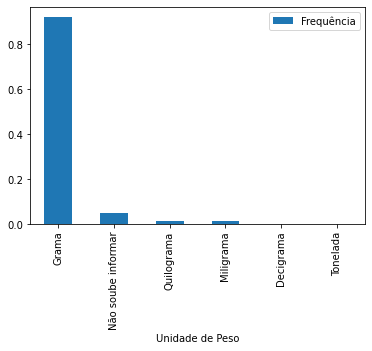

In [6]:
plota_frequencia(drogas_entrada, 'Unidade de Peso')

## COR PREDOMINANTE

Cor Predominante     Verde    Branco   Amarelo    Marrom      Bege  Incolor  \
Quantidade           53192     31096     17331      6545      2210      565   
Frequência        0.469765  0.274624  0.153059  0.057802  0.019518  0.00499   

Cor Predominante     Cinza     Preto      Azul  Prateado   Laranja  Vermelho  \
Quantidade             543       415       260       224       186       174   
Frequência        0.004796  0.003665  0.002296  0.001978  0.001643  0.001537   

Cor Predominante  Cobreado      Rosa   Dourado  Salmon      Roxo    Lilás  
Quantidade             161       150       109      34        27        9  
Frequência        0.001422  0.001325  0.000963  0.0003  0.000238  7.9e-05

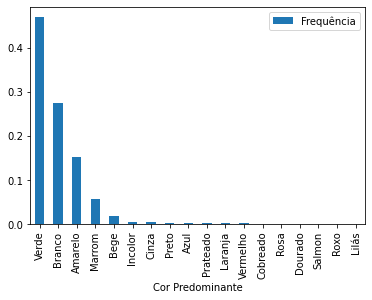

In [7]:
plota_frequencia(drogas_entrada, 'Cor Predominante')

## TIPO DE EMBALAGEM

Tipo de Embalagem Porção(es) Cigarro(s) Tijolo(s) Unidade(s)   Saco(s)  \
Quantidade             80822       9302      7676       7478      2185   
Frequência           0.71378   0.082151  0.067791   0.066042  0.019297   

Tipo de Embalagem Pacote(s) Não soube informar Frasco(s) Comprimido(s)  \
Quantidade             1682               1557      1163           488   
Frequência         0.014855           0.013751  0.010271       0.00431   

Tipo de Embalagem  Caixa(s)  Ponto(s)   Maço(s)   Lata(s) Fardo(s)   Lote(s)  \
Quantidade              359       172       165        66       34        30   
Frequência         0.003171  0.001519  0.001457  0.000583   0.0003  0.000265   

Tipo de Embalagem Garrafa(s) Galão(es)   Kit(s) Jogo(s)  
Quantidade                25        15       11       1  
Frequência          0.000221  0.000132  9.7e-05   9e-06

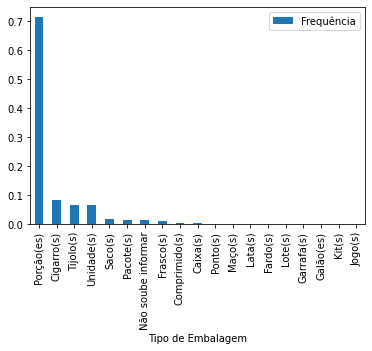

In [8]:
plota_frequencia(drogas_entrada, 'Tipo de Embalagem')

## Iniciando tratamento de PESOS

In [9]:
# fazer uma função que transforma vírgula em ponto

def padronizada(txt):
    if pd.isna(txt):
        return pd.NA
    return unidecode.unidecode(str(txt)).replace(",",".")
   
drogas_entrada['Peso Unitário'] = drogas_entrada['Peso Unitário'].apply(padronizada)

In [10]:
drogas_entrada.loc[drogas_entrada['Peso Unitário'] == ".-1"]
#drogas_entrada['Peso Unitário'].dtype

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
21925367          2020       270                 1025          Drogas   

             Cor Predominante  \
CHAVE_OBJETO                    
21925367               Branco   

                                                      Descrição Peso Total  \
CHAVE_OBJETO                                                                 
21925367      menos que uma grama de subst. semelhante a coc...        ,-1   

             Peso Unitário Quantidade de Unidade(s) Tipo de Embalagem  \
CHAVE_OBJETO                                                            
21925367               .-1                        2        Porção(es)   

                 Unidade de Peso  \
CHAVE_OBJETO                       
21925367      Não soube informar   

                                                    DESC_PADRAO  \
CHAVE_OBJETO                                                      
21925367      menos que uma grama de subst semelhante a coca...   

             RECLASSIFICAÇÃO  
CHAVE_OBJETO                  
21925367             Cocaína

In [11]:
def corrige_hifen(x):
    if '-' in str(x): 
        return x.replace('-','0')
    elif pd.isna(x) or x == '-' or x == '.' or x == '':
        return 0
    return x
drogas_entrada['QTDE_POR_UNIDADE'] = drogas_entrada['Quantidade de Unidade(s)'].apply(corrige_hifen).astype(float) 
drogas_entrada['VAL_PESO_UNITARIO'] = drogas_entrada['Peso Unitário'].apply(corrige_hifen).astype(float) 
drogas_entrada[drogas_entrada['Quantidade de Unidade(s)'] != drogas_entrada['QTDE_POR_UNIDADE']]

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
11228824          2009      3209                 1025          Drogas   
19443979          2018      1191                 1025          Drogas   
19443985          2018      1191                 1025          Drogas   
19444713          2018      1191                 1025          Drogas   
19444722          2018      1191                 1025          Drogas   
...                ...       ...                  ...             ...   
22332658          2020       574                    5         Maconha   
22332659          2020       574                  757           Crack   
22332660          2020       574                  756         Cocaína   
22332662          2020      1486                    5         Maconha   
22332831          2020      2167                    5         Maconha   

             Cor Predominante  \
CHAVE_OBJETO                    
11228824              Amarelo   
19443979                Verde   
19443985              Amarelo   
19444713                Verde   
19444722               Branco   
...                       ...   
22332658                Verde   
22332659              Amarelo   
22332660               Branco   
22332662                Verde   
22332831                Verde   

                                                     Descrição Peso Total  \
CHAVE_OBJETO                                                                
11228824                                                   NaN       0,42   
19443979                                                   NaN      14,34   
19443985                                                   NaN       2,74   
19444713                                                   NaN       5,00   
19444722                                                   NaN       1,50   
...                                                        ...        ...   
22332658              4,1g de substância semelhante a maconha.       4,10   
22332659               0,8g de substância semelhante ao crack.       0,80   
22332660             3,20g de substância semelhante a cocaína.       3,20   
22332662      1 PORÇÃO DE ERVA ESVERDEADA SEMELHANTE A MACONHA       2,00   
22332831                                  6 PORÇÕES DE MACONHA        NaN   

             Peso Unitário Quantidade de Unidade(s)   Tipo de Embalagem  \
CHAVE_OBJETO                                                              
11228824              <NA>                        4  Não soube informar   
19443979              <NA>                        2          Porção(es)   
19443985              <NA>                       26          Unidade(s)   
19444713              <NA>                        2          Porção(es)   
19444722              <NA>                        3          Cigarro(s)   
...                    ...                      ...                 ...   
22332658              <NA>                        4          Porção(es)   
22332659              <NA>                        2          Porção(es)   
22332660              <NA>                        4          Porção(es)   
22332662              <NA>                        1          Porção(es)   
22332831              <NA>                        6          Porção(es)   

             Unidade de Peso  \
CHAVE_OBJETO                   
11228824                 NaN   
19443979               Grama   
19443985               Grama   
19444713               Grama   
19444722               Grama   
...                      ...   
22332658               Grama   
22332659               Grama   
22332660               Grama   
22332662               Grama   
22332831                 NaN   

                                                   DESC_PADRAO  \
CHAVE_OBJETO                                                     
11228824                                                   NaN   
19443979                                 

In [12]:
#drogas_entrada.loc[drogas_entrada['CHAVE_OBJETO'] == '21925367']
drogas_entrada.loc[21925367]

ANO_OCOR                                                                 2020
NRO_OCOR                                                                  270
NRO_INT_TIPO_OBJETO                                                      1025
TXT_TIPO_OBJETO                                                        Drogas
Cor Predominante                                                       Branco
Descrição                   menos que uma grama de subst. semelhante a coc...
Peso Total                                                                ,-1
Peso Unitário                                                             .-1
Quantidade de Unidade(s)                                                    2
Tipo de Embalagem                                                  Porção(es)
Unidade de Peso                                            Não soube informar
DESC_PADRAO                 menos que uma grama de subst semelhante a coca...
RECLASSIFICAÇÃO                                                 

In [13]:
drogas_entrada['Peso Unitário'].value_counts()

1.00       1914
0.00       1593
0.50       1081
2.00        826
0.10        657
           ... 
3.28          1
1195.00       1
391.00        1
66.04         1
616.00        1
Name: Peso Unitário, Length: 4286, dtype: int64

In [14]:
drogas_entrada['VAL_PESO_UNITARIO'].value_counts()

0.00      75771
1.00       2202
0.50       1250
2.00        941
0.10        719
          ...  
495.50        1
19.95         1
906.00        1
5.28          1
616.00        1
Name: VAL_PESO_UNITARIO, Length: 4095, dtype: int64

In [15]:
drogas_entrada.loc[drogas_entrada['QTDE_POR_UNIDADE'] != 0]
#drogas_entrada['Peso Unitário'].dtype

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
11228824          2009      3209                 1025          Drogas   
19443979          2018      1191                 1025          Drogas   
19443985          2018      1191                 1025          Drogas   
19444713          2018      1191                 1025          Drogas   
19444722          2018      1191                 1025          Drogas   
...                ...       ...                  ...             ...   
24126969          2021      2148                    5         Maconha   
24126972          2021      2148                    5         Maconha   
24126984          2021      8335                  756         Cocaína   
24127010          2021     14951                    5         Maconha   
24127011          2021     14951                    5         Maconha   

             Cor Predominante  \
CHAVE_OBJETO                    
11228824              Amarelo   
19443979                Verde   
19443985              Amarelo   
19444713                Verde   
19444722               Branco   
...                       ...   
24126969                Verde   
24126972                Verde   
24126984               Branco   
24127010                Verde   
24127011                Verde   

                                                      Descrição Peso Total  \
CHAVE_OBJETO                                                                 
11228824                                                    NaN       0,42   
19443979                                                    NaN      14,34   
19443985                                                    NaN       2,74   
19444713                                                    NaN       5,00   
19444722                                                    NaN       1,50   
...                                                         ...        ...   
24126969                                                    NaN     415,00   
24126972                                                    NaN       5,00   
24126984          aproximadamente 23 gramas de pinos de cocaína        NaN   
24127010      Um tijolo de erva verde semelhante a maconha p...     642,00   
24127011      Um tijolo de erva verde semelhante a maconha p...    1058,00   

             Peso Unitário Quantidade de Unidade(s)   Tipo de Embalagem  \
CHAVE_OBJETO                                                              
11228824              <NA>                        4  Não soube informar   
19443979              <NA>                        2          Porção(es)   
19443985              <NA>                       26          Unidade(s)   
19444713              <NA>                        2          Porção(es)   
19444722              <NA>                        3          Cigarro(s)   
...                    ...                      ...                 ...   
24126969              <NA>                      1.0          Porção(es)   
24126972              <NA>                      1.0          Porção(es)   
24126984              <NA>                     36.0          Unidade(s)   
24127010              <NA>                      1.0           Tijolo(s)   
24127011              <NA>                      1.0           Tijolo(s)   

             Unidade de Peso  \
CHAVE_OBJETO                   
11228824                 NaN   
19443979               Grama   
19443985               Grama   
19444713               Grama   
19444722               Grama   
...                      ...   
24126969               Grama   
24126972               Grama   
24126984               Grama   
24127010               Grama   
24127011               Grama   

                                                    DESC_PADRAO  \
CHAVE_OBJETO                                                      
11228824                                                    NaN   
19443979                 

In [16]:
#Mudando o float do padrão brasileiro para o americano
#Criando novas colunas de Peso para analise e diferenciação de valores entre nova e antiga
drogas_entrada['Novo Peso Unitário'] = pd.to_numeric(drogas_entrada['Peso Unitário'].str.replace(',','.'), errors='coerce',downcast="float")
drogas_entrada['Novo Peso Total'] = pd.to_numeric(drogas_entrada['Peso Total'].str.replace(',','.'), errors='coerce',downcast="float")

#Trocando dados NaN por 0
drogas_entrada['Novo Peso Unitário'] = drogas_entrada['Novo Peso Unitário'].fillna(0).astype(float)
drogas_entrada['Novo Peso Total'] = drogas_entrada['Novo Peso Total'].fillna(0).astype(float)
#Mostrar mudança nas colunas peso
drogas_entrada.head(10)

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
11228824          2009      3209                 1025          Drogas   
19443979          2018      1191                 1025          Drogas   
19443985          2018      1191                 1025          Drogas   
19444713          2018      1191                 1025          Drogas   
19444722          2018      1191                 1025          Drogas   
19449101          2018      3449                 1025          Drogas   
19478366          2018      4293                 1025          Drogas   
19481385          2018      4027                 1025          Drogas   
19510027          2018       388                 1025          Drogas   
19525405          2018       388                 1025          Drogas   

             Cor Predominante Descrição Peso Total Peso Unitário  \
CHAVE_OBJETO                                                       
11228824              Amarelo       NaN       0,42          <NA>   
19443979                Verde       NaN      14,34          <NA>   
19443985              Amarelo       NaN       2,74          <NA>   
19444713                Verde       NaN       5,00          <NA>   
19444722               Branco       NaN       1,50          <NA>   
19449101                Verde       NaN     112,05            34   
19478366                Verde       NaN       2,80          <NA>   
19481385                Verde       NaN        NaN            15   
19510027                Verde       NaN      22,19          <NA>   
19525405              Amarelo       NaN      21,00          <NA>   

             Quantidade de Unidade(s)   Tipo de Embalagem Unidade de Peso  \
CHAVE_OBJETO                                                                
11228824                            4  Não soube informar             NaN   
19443979                            2          Porção(es)           Grama   
19443985                           26          Unidade(s)           Grama   
19444713                            2          Porção(es)           Grama   
19444722                            3          Cigarro(s)           Grama   
19449101                            3          Porção(es)           Grama   
19478366                            1          Porção(es)           Grama   
19481385                            1           Pacote(s)           Grama   
19510027                            1          Porção(es)           Grama   
19525405                            1          Porção(es)           Grama   

             DESC_PADRAO RECLASSIFICAÇÃO  QTDE_POR_UNIDADE  VAL_PESO_UNITARIO  \
CHAVE_OBJETO                                                                    
11228824             NaN          Drogas               4.0                0.0   
19443979             NaN          Drogas               2.0                0.0   
19443985             NaN          Drogas              26.0                0.0   
19444713             NaN          Drogas               2.0                0.0   
19444722             NaN          Drogas               3.0                0.0   
19449101             NaN          Drogas               3.0               34.0   
19478366             NaN          Drogas               1.0                0.0   
19481385             NaN          Drogas               1.0               15.0   
19510027             NaN          Drogas               1.0                0.0   
19525405             NaN          Drogas               1.0                0.0   

              Novo Peso Unitário  Novo Peso Total  
CHAVE_OBJETO                                       
11228824                     0.0         0.420000  
19443979                     0.0        14.340000  
19443985                     0.0         2.740000  
19444713                     0.0         5.000000  
19444722                     0.0         1.500000  
19449101                    34.0       112.050003  
194783

In [17]:
#converte peso unitário
def refactor(x,y):
    if 'Miligrama' in str(x):
        return y / 1000
    elif 'Quilograma' in str(x):
        return y * 100
    elif 'Decigrama' in str(x):
        return y / 10
    #if 'Tonelada' in x:
    #    return y * 1000000
    else:
        return y
        
drogas_entrada['PESO_UNITARIO_NOVO'] = drogas_entrada.apply(lambda x: refactor(x['Unidade de Peso'], x['Novo Peso Unitário']), axis=1)
drogas_entrada.head(10)

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
11228824          2009      3209                 1025          Drogas   
19443979          2018      1191                 1025          Drogas   
19443985          2018      1191                 1025          Drogas   
19444713          2018      1191                 1025          Drogas   
19444722          2018      1191                 1025          Drogas   
19449101          2018      3449                 1025          Drogas   
19478366          2018      4293                 1025          Drogas   
19481385          2018      4027                 1025          Drogas   
19510027          2018       388                 1025          Drogas   
19525405          2018       388                 1025          Drogas   

             Cor Predominante Descrição Peso Total Peso Unitário  \
CHAVE_OBJETO                                                       
11228824              Amarelo       NaN       0,42          <NA>   
19443979                Verde       NaN      14,34          <NA>   
19443985              Amarelo       NaN       2,74          <NA>   
19444713                Verde       NaN       5,00          <NA>   
19444722               Branco       NaN       1,50          <NA>   
19449101                Verde       NaN     112,05            34   
19478366                Verde       NaN       2,80          <NA>   
19481385                Verde       NaN        NaN            15   
19510027                Verde       NaN      22,19          <NA>   
19525405              Amarelo       NaN      21,00          <NA>   

             Quantidade de Unidade(s)   Tipo de Embalagem Unidade de Peso  \
CHAVE_OBJETO                                                                
11228824                            4  Não soube informar             NaN   
19443979                            2          Porção(es)           Grama   
19443985                           26          Unidade(s)           Grama   
19444713                            2          Porção(es)           Grama   
19444722                            3          Cigarro(s)           Grama   
19449101                            3          Porção(es)           Grama   
19478366                            1          Porção(es)           Grama   
19481385                            1           Pacote(s)           Grama   
19510027                            1          Porção(es)           Grama   
19525405                            1          Porção(es)           Grama   

             DESC_PADRAO RECLASSIFICAÇÃO  QTDE_POR_UNIDADE  VAL_PESO_UNITARIO  \
CHAVE_OBJETO                                                                    
11228824             NaN          Drogas               4.0                0.0   
19443979             NaN          Drogas               2.0                0.0   
19443985             NaN          Drogas              26.0                0.0   
19444713             NaN          Drogas               2.0                0.0   
19444722             NaN          Drogas               3.0                0.0   
19449101             NaN          Drogas               3.0               34.0   
19478366             NaN          Drogas               1.0                0.0   
19481385             NaN          Drogas               1.0               15.0   
19510027             NaN          Drogas               1.0                0.0   
19525405             NaN          Drogas               1.0                0.0   

              Novo Peso Unitário  Novo Peso Total  PESO_UNITARIO_NOVO  
CHAVE_OBJETO                                                           
11228824                     0.0         0.420000                 0.0  
19443979                     0.0        14.340000                 0.0  
19443985                     0.0         2.740000                 0.0  
19444713                     0.0         5.000000             

In [18]:
# Converte peso unitário
def refactor_peso(x,y):
        return x*y
        
drogas_entrada['PESO_TOTAL_NOVO'] = drogas_entrada.apply(lambda x: refactor_peso(x['PESO_UNITARIO_NOVO'], x['QTDE_POR_UNIDADE']), axis=1)
drogas_entrada.head(10)

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
11228824          2009      3209                 1025          Drogas   
19443979          2018      1191                 1025          Drogas   
19443985          2018      1191                 1025          Drogas   
19444713          2018      1191                 1025          Drogas   
19444722          2018      1191                 1025          Drogas   
19449101          2018      3449                 1025          Drogas   
19478366          2018      4293                 1025          Drogas   
19481385          2018      4027                 1025          Drogas   
19510027          2018       388                 1025          Drogas   
19525405          2018       388                 1025          Drogas   

             Cor Predominante Descrição Peso Total Peso Unitário  \
CHAVE_OBJETO                                                       
11228824              Amarelo       NaN       0,42          <NA>   
19443979                Verde       NaN      14,34          <NA>   
19443985              Amarelo       NaN       2,74          <NA>   
19444713                Verde       NaN       5,00          <NA>   
19444722               Branco       NaN       1,50          <NA>   
19449101                Verde       NaN     112,05            34   
19478366                Verde       NaN       2,80          <NA>   
19481385                Verde       NaN        NaN            15   
19510027                Verde       NaN      22,19          <NA>   
19525405              Amarelo       NaN      21,00          <NA>   

             Quantidade de Unidade(s)   Tipo de Embalagem Unidade de Peso  \
CHAVE_OBJETO                                                                
11228824                            4  Não soube informar             NaN   
19443979                            2          Porção(es)           Grama   
19443985                           26          Unidade(s)           Grama   
19444713                            2          Porção(es)           Grama   
19444722                            3          Cigarro(s)           Grama   
19449101                            3          Porção(es)           Grama   
19478366                            1          Porção(es)           Grama   
19481385                            1           Pacote(s)           Grama   
19510027                            1          Porção(es)           Grama   
19525405                            1          Porção(es)           Grama   

             DESC_PADRAO RECLASSIFICAÇÃO  QTDE_POR_UNIDADE  VAL_PESO_UNITARIO  \
CHAVE_OBJETO                                                                    
11228824             NaN          Drogas               4.0                0.0   
19443979             NaN          Drogas               2.0                0.0   
19443985             NaN          Drogas              26.0                0.0   
19444713             NaN          Drogas               2.0                0.0   
19444722             NaN          Drogas               3.0                0.0   
19449101             NaN          Drogas               3.0               34.0   
19478366             NaN          Drogas               1.0                0.0   
19481385             NaN          Drogas               1.0               15.0   
19510027             NaN          Drogas               1.0                0.0   
19525405             NaN          Drogas               1.0                0.0   

              Novo Peso Unitário  Novo Peso Total  PESO_UNITARIO_NOVO  \
CHAVE_OBJETO                                                            
11228824                     0.0         0.420000                 0.0   
19443979                     0.0        14.340000                 0.0   
19443985                     0.0         2.740000                 0.0   
19444713                     0.0         5.000000        

# Tirando registros duplicados do dataframe

In [19]:
# Total de registros: 113231
len(drogas_entrada)

113231

In [20]:
# Pegando registros que não são NaN na coluna Descrição.
df_not_nan = drogas_entrada[drogas_entrada['Descrição'].notna()]
df_not_nan.sample(4)

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
23880795          2021      1789                 1025          Drogas   
20733576          2019       635                    5         Maconha   
22561674          2020      1539                 1025          Drogas   
23491488          2021      2092                  756         Cocaína   

             Cor Predominante  \
CHAVE_OBJETO                    
23880795               Branco   
20733576                Verde   
22561674                Verde   
23491488               Branco   

                                                      Descrição Peso Total  \
CHAVE_OBJETO                                                                 
23880795      Um invólucro de substância semelhante à cocain...       0,52   
20733576                                        NOVENTA  GRAMAS      90,00   
22561674      01 PORÇÃO DE SUBSTANCIA COM CARACTERISTICA DE ...        NaN   
23491488                        embaladas em invólucro plástico       3,14   

             Peso Unitário Quantidade de Unidade(s) Tipo de Embalagem  \
CHAVE_OBJETO                                                            
23880795              0.52                        1        Porção(es)   
20733576             90.00                        1         Tijolo(s)   
22561674              <NA>                        1        Porção(es)   
23491488              <NA>                     10.0        Porção(es)   

             Unidade de Peso  \
CHAVE_OBJETO                   
23880795               Grama   
20733576               Grama   
22561674               Grama   
23491488               Grama   

                                                    DESC_PADRAO  \
CHAVE_OBJETO                                                      
23880795      um involucro de substancia semelhante a cocain...   
20733576                                        noventa  gramas   
22561674      01 porcao de substancia com caracteristica de ...   
23491488                        embaladas em involucro plastico   

             RECLASSIFICAÇÃO  QTDE_POR_UNIDADE  VAL_PESO_UNITARIO  \
CHAVE_OBJETO                                                        
23880795             Cocaína               1.0               0.52   
20733576             Maconha               1.0              90.00   
22561674             Maconha               1.0               0.00   
23491488             Cocaína              10.0               0.00   

              Novo Peso Unitário  Novo Peso Total  PESO_UNITARIO_NOVO  \
CHAVE_OBJETO                                                            
23880795                    0.52             0.52                0.52   
20733576                   90.00            90.00               90.00   
22561674                    0.00             0.00                0.00   
23491488                    0.00             3.14                0.00   

              PESO_TOTAL_NOVO  
CHAVE_OBJETO                   
23880795                 0.52  
20733576                90.00  
22561674                 0.00  
23491488                 0.00

In [21]:
# Total de registros no dataframe em que a coluna Descrição está válida.
len(df_not_nan)

98681

In [22]:
# Pegando registros que são NaN na coluna Descrição.
df_is_nan = drogas_entrada[drogas_entrada['Descrição'].isna()]
df_is_nan.sample(4)

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
20830097          2019       890                 1025          Drogas   
21856765          2020         4                 1025          Drogas   
23457283          2021       458                  757           Crack   
20727848          2019      6280                 1025          Drogas   

             Cor Predominante Descrição Peso Total Peso Unitário  \
CHAVE_OBJETO                                                       
20830097                Verde       NaN      56,00          <NA>   
21856765               Marrom       NaN        NaN          <NA>   
23457283              Amarelo       NaN      70,60          <NA>   
20727848               Marrom       NaN        NaN          <NA>   

             Quantidade de Unidade(s) Tipo de Embalagem Unidade de Peso  \
CHAVE_OBJETO                                                              
20830097                            1           Saco(s)           Grama   
21856765                            1        Cigarro(s)       Miligrama   
23457283                          1.0        Porção(es)           Grama   
20727848                            2        Porção(es)           Grama   

             DESC_PADRAO RECLASSIFICAÇÃO  QTDE_POR_UNIDADE  VAL_PESO_UNITARIO  \
CHAVE_OBJETO                                                                    
20830097             NaN          Drogas               1.0                0.0   
21856765             NaN          Drogas               1.0                0.0   
23457283             NaN           Crack               1.0                0.0   
20727848             NaN          Drogas               2.0                0.0   

              Novo Peso Unitário  Novo Peso Total  PESO_UNITARIO_NOVO  \
CHAVE_OBJETO                                                            
20830097                     0.0        56.000000                 0.0   
21856765                     0.0         0.000000                 0.0   
23457283                     0.0        70.599998                 0.0   
20727848                     0.0         0.000000                 0.0   

              PESO_TOTAL_NOVO  
CHAVE_OBJETO                   
20830097                  0.0  
21856765                  0.0  
23457283                  0.0  
20727848                  0.0

In [23]:
# Total de registros no dataframe em que a coluna Descrição está NaN.
len(df_is_nan)

14550

In [24]:
# Criando o dataframe 'sem_nan' que contém as colunas com descrição válida.
sem_nan = drogas_entrada.loc[drogas_entrada['Descrição'].notna()]
len(sem_nan)

98681

In [25]:
# Colocando no dataframe 3 colunas relevantes para o modelo de ML.
sem_nan = sem_nan[['Cor Predominante', 'Descrição', 'Tipo de Embalagem']]

In [26]:
# Excluindo do dataframe todas as linhas que são duplicadas/repetidas.
sem_nan = sem_nan.drop_duplicates()

In [27]:
# Conferindo se as linhas duplicadas foram retiradas.
sem_nan.duplicated().sum()

0

# Iniciando teste para sugestão de pesos

In [28]:
# Mostrando o dataframe com as linhas completas para ler a descrição completa na tela
pd.set_option("display.max_colwidth", None)
sem_nan.sample(100)

Cor Predominante  \
CHAVE_OBJETO                    
20971781                Verde   
20959993               Branco   
21727372               Branco   
21811476               Marrom   
22902002                Verde   
21946277               Branco   
22849265               Branco   
22983819               Branco   
23379211              Amarelo   
23069074              Amarelo   
23957853               Branco   
23261828                Verde   
23212668               Branco   
22070712                Verde   
23537158               Branco   
22505053               Branco   
24047090                Verde   
21480510               Branco   
23011123               Branco   
21475342               Branco   
22710572                Verde   
23734017                Verde   
20693710               Branco   
22292440                Verde   
23698311               Branco   
22068991               Branco   
20242691               Branco   
23673665                Verde   
23087731               Branco   
22265242                Verde   
23248996               Branco   
23615025                Verde   
23323975               Branco   
21974721                Verde   
21504780              Amarelo   
22860550               Branco   
22461624              Amarelo   
23178983              Amarelo   
23200772                Verde   
24000130                Verde   
22186568                Verde   
22352893                Verde   
22337320                Verde   
20826932               Marrom   
22835401                Verde   
22824998               Branco   
23099840                Verde   
23037835              Amarelo   
23495680               Branco   
23738200                Verde   
22267495                Verde   
22640289               Branco   
23528973              Amarelo   
22246437                Verde   
23171927                Verde   
23789712                Verde   
23698326               Branco   
22909041                Verde   
20917778                Verde   
22435758              Amarelo   
24039300                 Bege   
22050850                Verde   
23665197               Branco   
21964076               Branco   
23417499               Branco   
22433475               Marrom   
20711797                Verde   
22853359                Verde   
21795851                Verde   
22983880                Verde   
22934187               Branco   
22274635                Verde   
22724700              Amarelo   
23786842                Verde   
21924891               Branco   
21106286              Amarelo   
20769815               Marrom   
23333869               Branco   
22866265                Verde   
21487324                Verde   
21661912              Amarelo   
22516996              Amarelo   
23285132                Verde   
23532438               Branco   
22668324               Branco   
23844622                Verde   
20958870                Verde   
20170656                Verde   
22409494                Verde   
22680478              Amarelo   
22337203               Branco   
22931793               Branco   
21589644               Branco   
23106564                Verde   
23076312                Verde   
21966594               Marrom   
23270673              Amarelo   
22336286                Verde   
20592638                Verde   
21274797               Branco   

                                                                                                                                                    Descrição  \
CHAVE_OBJETO                                                                                                                                                    
20971781                                                                                        um cigarro feito de substância com características de maconha   
20959993                                                                                                                  01 PORÇÃO DE COCAÍNA, COM INVÓLUCRO   
21

In [29]:
dicionario_numero = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

In [30]:
dicionario_medida = ['miligrama', 'grama', 'gramas', 'quilograma', 'quilogramas', 'tonelada', 'toneladas']

In [31]:
drogas_entrada.loc[[21615964]]

ANO_OCOR  NRO_OCOR  NRO_INT_TIPO_OBJETO TXT_TIPO_OBJETO  \
CHAVE_OBJETO                                                            
21615964          2019      9208                    5         Maconha   

             Cor Predominante  \
CHAVE_OBJETO                    
21615964               Marrom   

                                                                                                             Descrição  \
CHAVE_OBJETO                                                                                                             
21615964      Trinta e seis tijolos de Maconha pesando total de 20.297(vinte quilos, duzentos e noventa e sete gramas)   

             Peso Total Peso Unitário Quantidade de Unidade(s)  \
CHAVE_OBJETO                                                     
21615964       20297,00          <NA>                       36   

             Tipo de Embalagem Unidade de Peso  \
CHAVE_OBJETO                                     
21615964             Tijolo(s)      Quilograma   

                                                                                                         DESC_PADRAO  \
CHAVE_OBJETO                                                                                                           
21615964      trinta e seis tijolos de maconha pesando total de 20297(vinte quilos duzentos e noventa e sete gramas)   

             RECLASSIFICAÇÃO  QTDE_POR_UNIDADE  VAL_PESO_UNITARIO  \
CHAVE_OBJETO                                                        
21615964             Maconha              36.0                0.0   

              Novo Peso Unitário  Novo Peso Total  PESO_UNITARIO_NOVO  \
CHAVE_OBJETO                                                            
21615964                     0.0          20297.0                 0.0   

              PESO_TOTAL_NOVO  
CHAVE_OBJETO                   
21615964                  0.0

### Estudos com spaCy

In [32]:
# Criando o objeto nlp do tipo spacy na lingua portuguesa 
from spacy.lang.pt import Portuguese
 # Analisa os textos
nlp = Portuguese()

In [33]:
#Criando a variavel doc, que recebe a analise do nlp a partir da frase passada
doc = nlp("Olá Mundo!")
for token in doc:
    print(token.text)

Olá
Mundo
!


In [34]:
#span é a variavel doc fateada   
span = doc[1:3]
print(span.text)

Mundo!


### 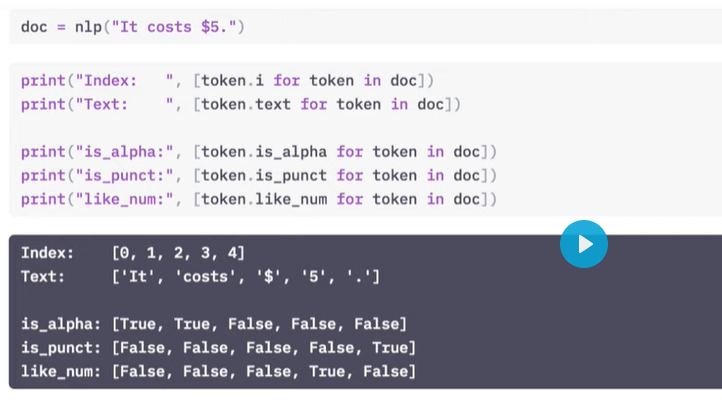

In [35]:
# Procurando por um número e o caractere '%'
doc_porcent = nlp("Mais de 40% dos empregados estão de férias "
                 "9,5% dos alunos preferem café.")
for token in doc_porcent:
   if token.like_num:
     proximo_token = doc_porcent[token.i + 1]
     if proximo_token.text == "%":
         print("Porcentagem encontrada: ", token.text)

Porcentagem encontrada:  40
Porcentagem encontrada:  9,5


In [36]:
# Prevendo atributos linguísticos em contexto
import spacy
nlp = spacy.load("pt_core_news_lg")
doc_portuguese = nlp("PROCERGS está planejando 10 novos estágios.")
print(doc_portuguese)
print()
for token in doc_portuguese:
    print(token.text, token.pos_, token.dep_, token.head.text)
spacy.explain("amod") #Explicando a label

PROCERGS está planejando 10 novos estágios.

PROCERGS NOUN nsubj planejando
está AUX aux planejando
planejando VERB ROOT planejando
10 NUM nummod estágios
novos ADJ amod estágios
estágios NOUN obj planejando
. PUNCT punct planejando


'adjectival modifier'

### 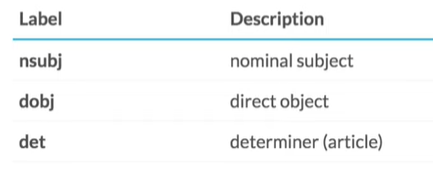

In [37]:
# Reconhecendo entidades nomeadas
doc_entidades = nlp("PROCERGS está a procura de startup brasileira por R$1 milhão de reais.")
#doc_entidades = nlp("Apple está a procura de startup brasileira por R$1 milhão de reais.")
for ent in doc_entidades.ents:
    print(ent.text, ent.label_)
# Pegando definições das labels:
spacy.explain("LOC")

PROCERGS LOC


'Non-GPE locations, mountain ranges, bodies of water'

In [38]:
# Achando combinações (Matching)
#Criando o objeto Match para achar combinações
from spacy.matcher import Matcher
nlp = spacy.load("pt_core_news_lg")
matcher = Matcher(nlp.vocab)

In [39]:
padrao = [{"TEXT": "café"}, {"TEXT": "preto"}]
matcher.add("CAFE_PADRAO", [padrao])
doc = nlp("Gisele comprou um café preto para mim")
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

café preto


###Operadores 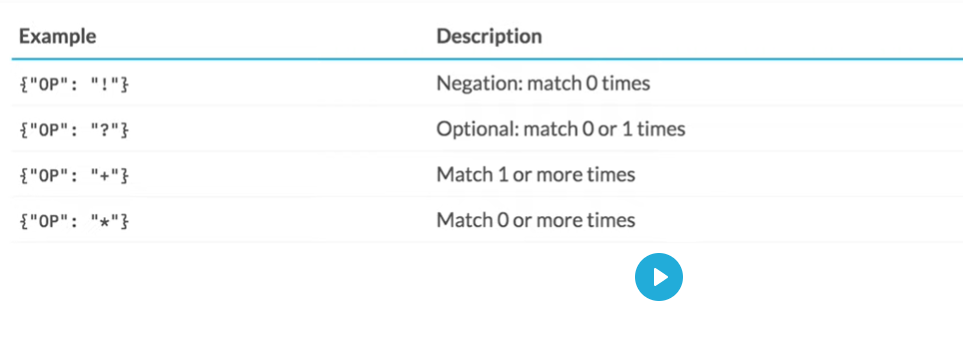

In [92]:
df_desc = sem_nan[['Descrição']]
df_desc.head(10)
#doc_df_desc = nlp(desc_em_string)

Descrição
CHAVE_OBJETO                                                                               
19903932                  uma pequena porção de erva de cor esverdeada semelhante a Maconha
19904961                                                      substancia semelhanta a crack
19904971                                                    substancia semelhante a cocaina
19906420                                                        aproximadamente sete gramas
19906441                                                        aproximadamente sete gramas
19906452                                            aprox. nove gramas na embalagem (pinos)
19923337                                                                            COCAINA
19923705                       UM POTE CONTENDO PEQUENA QUANTIDADE DE SUBSTANCIA ESVERDEADA
19947512                                                             05 cigarros de maconha
19947657      porções fragmentadas de substância semelhante a maconha(pesada com invólucro)

In [41]:
from spacy.lang.pt import Portuguese
nlp = Portuguese()
def teste(txt):
    if pd.isna(txt):
        return pd.NA
    doc = nlp(txt)
    return [token.text for token in doc if token.like_num]
sem_nan['NUMEROS_ENCONTRADOS'] = sem_nan['Descrição'].apply(teste)

In [100]:
sem_nan.head(100)

Cor Predominante  \
CHAVE_OBJETO                    
19903932                Verde   
19904961               Branco   
19904971               Branco   
19906420                Verde   
19906441              Amarelo   
19906452               Branco   
19923337               Branco   
19923705                Preto   
19947512                Verde   
19947657                Verde   
19955315                Preto   
19963555                Verde   
19963564                Verde   
19963580                Verde   
19963592                Verde   
19967024               Branco   
19977890                 Bege   
19981683               Branco   
19981686               Branco   
19982558              Amarelo   
19982746               Branco   
19982748               Branco   
19994765               Branco   
19994774              Amarelo   
19994979                Verde   
19994991                Verde   
19995007               Branco   
19995046                Verde   
19995048              Amarelo   
19999074               Marrom   
20006272               Branco   
20007177              Amarelo   
20007178              Amarelo   
20018420                Verde   
20018819                Verde   
20019853                Verde   
20019858                Verde   
20019862              Amarelo   
20019864              Amarelo   
20019866               Branco   
20019879               Branco   
20019880                Verde   
20019891               Branco   
20019929                Verde   
20019932                Verde   
20019935                Verde   
20019942               Branco   
20019943               Branco   
20019947               Branco   
20019949             Prateado   
20021500               Branco   
20021502              Amarelo   
20021514                Cinza   
20022951                Verde   
20022963              Amarelo   
20023133               Branco   
20027556               Marrom   
20039150              Amarelo   
20049967                Verde   
20051911               Branco   
20053229                Verde   
20053497                Verde   
20053918               Branco   
20053926                Verde   
20053942              Amarelo   
20054067                Verde   
20054102              Amarelo   
20054315               Branco   
20054343                Verde   
20054373              Amarelo   
20054607                Verde   
20054826              Amarelo   
20054836                Verde   
20054840                Cinza   
20056486                Verde   
20057870                Verde   
20057879                Verde   
20060679               Branco   
20060699               Branco   
20064007               Branco   
20064028               Branco   
20075094               Branco   
20077381             Prateado   
20077383             Prateado   
20077729               Branco   
20077733                Verde   
20077867                Verde   
20080378                Verde   
20081814                Verde   
20082953              Amarelo   
20085144                Verde   
20085152                Verde   
20087440                Verde   
20088238               Branco   
20088239               Marrom   
20088240               Marrom   
20090178              Amarelo   
20092728              Amarelo   
20092929               Branco   
20092930               Branco   

                                                                                                              Descrição  \
CHAVE_OBJETO                                                                                                              
19903932                                              uma pequena porção de erva de cor esverdeada semelhante a Maconha   
19904961                                                                                  substancia semelhanta a crack   
19904971                                                                                substancia semelhante a cocaina   
19906420                       

In [101]:
df_desc = sem_nan['Descrição'].unique().tolist()
print(len(df_desc))

82949


In [44]:
for desc in df_desc:
    doc = nlp((str(desc)))
    for token in doc:
       if token.like_num:
         print(token.text, token.is_digit)

sete False
nove False
UM False
05 True
3 True
08 True
SEIS False
VINTE False
QUATRO False
Nove False
12 True
25 True
01 True
370 True
20 True
vinte False
28 True
vinte False
oito False
seis False
doze False
um False
dois False
oito False
UM False
490 True
51 True
29 True
66 True
30 True
51 True
32.2 False
4,09 False
150 True
51.07 False
322 True
68,08 False
88 True
50 True
115 True
75 True
9 True
nove False
25 True
01 True
598 True
29 True
17 True
21 True
05 True
10 True
5 True
3 True
7 True
7 True
03 True
18 True
83 True
4 True
95 True
vinte False
cinco False
3 True
11 True
18 True
87 True
60 True
8 True
4 True
2 True
2 True
um False
09 True
10 True
um False
três False
18 True
4 True
0.37 False
oito False
170 True
219 True
6 True
566 True
45 True
8 True
um False
13 True
46 True
6 True
13 True
7,80 False
2 True
23 True
13 True
3 True
23 True
9,6 False
20,5 False
6,5 False
um False
um False
3 True
16 True
253,00 False
15 True
01 True
108 True
255 True
86 True
60 True
77 True
15 True
06 

TRINTA False
3,80 False
SEIS False
35,00 False
91,00 False
386 True
72,00 False
12 True
11 True
114 True
12 True
23 True
46 True
QUATRO False
110 True
11 True
01 True
três False
sete False
02 True
02 True
um False
32 True
3,9 False
4 True
300 True
220 True
197 True
UM False
378 True
38 True
6 True
99 True
1 True
13 True
01 True
7,81 False
51 True
8 True
3,83 False
1 True
7 True
um False
4,3 False
02 True
vinte False
15 True
03 True
5 True
42 True
9 True
04 True
4,00 False
quatro False
01 True
30 True
01 True
53 True
três False
um False
um False
DEZ False
490 True
DOZE False
375 True
UM False
0,4 False
três False
5 True
2 True
UM False
02 True
5 True
dez False
7.7 False
9,0 False
01 True
onze False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
um False
1 True
20 True
04 True
01 True
2 True
1 True
1 True
01 True
01 True
Um False
0,3 False
0,1 Fals

UM False
147 True
zero False
três False
DOIS False
0,5 False
TRÊS False
3 True
12 True
1,5 False
1 True
1 True
1 True
2,35 False
71 True
SETENTA False
14 True
CINCO False
SETE False
1 True
TRINTA False
TRES False
tres False
DEZ False
03 True
25 True
5 True
0,4 False
5 True
um False
1 True
32 True
4 True
QUATRO False
0,5 False
2 True
um False
1,35 False
8 True
47 True
6 True
1,0 False
01 True
UM False
0,8 False
190 True
QUATRO False
UM False
UM False
06 True
3,0 False
UM False
24 True
UM False
NOVE False
UM False
280 True
UM False
215 True
01 True
0,7 False
02 True
29 True
28 True
08 True
3 True
04 True
1 True
21 True
5,71 False
um False
UM False
0,69 False
43 True
Três False
Um False
450 True
um False
1,9 False
01 True
3,4 False
10 True
185 True
6 True
1 True
4 True
01 True
01 True
4 True
01 True
01 True
Dez False
03 True
2 True
UM False
DOIS False
UM False
CINQUENTA False
SETE False
50 True
01 True
UM False
UM False
QUATRO False
1,2 False
TREZENTOS False
DEZOITO False
875 True
09 True

2 True
02 True
3 True
3 True
DOIS False
4 True
UM False
UM False
05 True
CINCO False
01 True
01 True
02 True
DOIS False
0,5 False
1,20 False
07 True
14,67 False
um False
4 True
Um False
0,48 False
Cinco False
01 True
UM False
0,5 False
3,5 False
01 True
09 True
2,0 False
02 True
DOIS False
0,8 False
01 True
UM False
0,8 False
03 True
TRÊS False
0,9 False
0,4 False
01 True
UM False
1,0 False
02 True
DOIS False
2,0 False
0,5 False
01 True
0,40 False
NOVE False
CENTO False
NOVE False
UM False
24,900 False
1 True
1 True
2 True
11,4 False
Dois False
Dois False
16 True
1,5 False
Um False
quarenta False
um False
30 True
39,00 False
dois False
0,21 False
12,98 False
2,47 False
UM False
5,49 False
1,1 False
UM False
0,2 False
UM False
0,2 False
UM False
1,12 False
09 True
60 True
04 True
3,7 False
0,21 False
Um False
0,64 False
6 True
5 True
1 True
1 True
UM False
7 True
5,7 False
UM False
0,5 False
3,8 False
0,5 False
0,9 False
2,6 False
01 True
41,60 False
14 True
6 True
08 True
35 True
9,08 

14,80 False
513 True
Cinco False
1 True
um False
40 True
62 True
UM False
04 True
38 True
24 True
24 True
vinte False
quatro False
40 True
quarenta False
3,8 False
50 True
72 True
SETENTA False
131,00 False
CENTO False
TRINTA False
27 True
VINTE False
SETE False
4 True
QUATRO False
35 True
TRINTA False
CINCO False
20 True
VINTE False
46 True
4,2 False
01 True
01 True
UM False
UM False
3 True
sete False
Um False
0,3 False
Quatro False
4 True
8 True
6,55 False
9 True
01 True
03 True
02 True
22,21 False
21,59 False
01 True
17,38 False
10 True
55 True
03 True
UM False
521 True
UM False
717 True
01 True
15 True
01 True
05 True
01 True
20 True
01 True
255 True
02 True
45 True
0,3 False
75 True
2,55 False
3,11 False
Um False
9,50 False
14 True
VINTE False
2,8 False
24,5 False
UM False
5 True
UM False
0,4 False
UM False
0,05 False
0,4 False
Um False
01 True
0,6 False
6 True
01 True
02 True
1 True
1 True
1 True
um False
0,3 False
05 True
25 True
3,20 False
80 True
0,30 False
18,30 False
55 True

11,50 False
1 True
2,55 False
06 True
15,3 False
01 True
02 True
01 True
UM False
Quatro False
Um False
um False
um False
09 True
19 True
950,00 False
450 True
52 True
46 True
10 True
96 True
um False
69,700 False
1.349 False
55 True
3 True
DOZE False
um False
1,90 False
22 True
16 True
20,00 False
06 True
10,00 False
UM False
UM False
104,0 False
8,50 False
UM False
0,56 False
10 True
20 True
UM False
DOIS False
7 True
DOIS False
2 True
Um False
2 True
01 True
1.285 False
4 True
12 True
6 True
VINTE False
um False
QUATRO False
UM False
01 True
DOIS False
UM False
UM False
UM False
OITO False
Um False
2 True
1,7 False
UM False
12 True
25 True
0.9 False
52 True
tres False
tres False
UM False
1 True
3 True
2 True
DOIS False
1 True
UM False
1 True
8 True
01 True
CINCO False
05 True
02 True
UM False
um False
Dois False
1172 True
02 True
10,75 False
dois False
0,80 False
5 True
01 True
15 True
26 True
UM False
1 True
um False
UM False
0,5 False
Um False
TRÊS False
01 True
cinco False
onze F

05 True
01 True
01 True
01 True
01 True
UM False
3 True
TRES False
0,7 False
9,80 False
UM False
UM False
UM False
26 True
UM False
DOIS False
0,7 False
UM False
QUATRO False
3 True
2.70 False
1.10 False
um False
46 True
18,25 False
DEZOITO False
VINTE False
CINCO False
250 True
35 True
90 True
TREZE False
ONZE False
3 True
1 True
0,2 False
1 True
1,85 False
1 True
0,50 False
7,02 False
7 True
SETE False
TRÊS False
UM False
1.988,00 False
UM False
NOVECENTOS False
OITENTA False
OITO False
TRES False
1,00 False
SETE False
TRÊS False
QUATRO False
6 True
SEIS False
66 True
8 True
Três False
01 True
0.02 False
3 True
1 True
79 True
01 True
4,0 False
02 True
26 True
7,3 False
01 True
25,2 False
01 True
17,5 False
14 True
Cinquenta False
nove False
0,06 False
um False
45 True
UM False
dois False
2,8 False
17 True
16 True
4 True
3,7 False
0,6 False
1.10 False
01 True
TRES False
52 True
5 True
oito False
119 True
124 True
03 True
2 True
3 True
24.972 False
01 True
um False
1 True
03 True
um Fa

1 True
1 True
1 True
1 True
73 True
6 True
26 True
20 True
01 True
674 True
50 True
1.104 False
22 True
491 True
4 True
2 True
0,2 False
um False
01 True
ONZE False
TRÊS False
UM False
0,9 False
2 True
1,2 False
19 True
2,9 False
02 True
68 True
10,50 False
116 True
2 True
74 True
94 True
155 True
14 True
NOVE False
1,10 False
1 True
49 True
37 True
um False
6 True
3,11 False
8 True
0,99 False
14 True
8,23 False
13 True
6,49 False
08 True
OITO False
1,00 False
1 True
01 True
3 True
três False
Dois False
100 True
tres False
300 True
1 True
UM False
TRÊS False
CINCO False
CINQUENTA False
NOVE False
111 True
DOIS False
UM False
VINTE False
SEIS False
17 True
OITO False
UM False
3 True
01 True
um False
um False
um False
1 True
0,5 False
100 True
1 True
1 True
1 True
0,4 False
1 True
0,5 False
1 True
3 True
10 True
01 True
01 True
3 True
UM False
UM False
10 True
1 True
UM False
20 True
20 True
02 True
106 True
45 True
Seis False
01 True
0,22 False
07 True
SETE False
2,3 False
8,1 False
04 

UM False
1,52 False
UM False
0,95 False
0,4 False
05 True
1,30 False
37 True
UM False
1,00 False
01 True
1,5 False
CINCO False
0,52 False
OITO False
2,27 False
04 True
01 True
151 True
10 True
4,35 False
02 True
01 True
33 True
OITO False
DOIS False
Quatro False
16,66 False
OITENTA False
SEIS False
103 True
NOVENTA False
SEIS False
65 True
TRINTA False
CINCO False
UM False
tres False
170 True
04 True
um False
104 True
UM False
02 True
01 True
9 True
01 True
UM False
DOIS False
UM False
01 True
02 True
DOIS False
QUATRO False
01 True
4,52 False
um False
36 True
214,3 False
39,3 False
Trinta False
27 True
40 True
84 True
seis False
9 True
178 True
um False
sete False
4 True
nove False
3 True
11 True
3 True
100 True
29 True
51 True
16 True
170 True
72 True
87 True
30 True
4 True
2 True
2 True
43 True
02 True
6 True
37 True
14,54 False
55 True
uM False
01 True
156 True
01 True
158 True
UM False
1,00 False
UM False
5,80 False
19 True
7 True
20 True
6 True
9 True
01 True
Três False
2,9 False

Um False
0,23 False
Dois False
163 True
SEIS False
1,0 False
TRES False
5,3 False
TRES False
1,9 False
Três False
1,3 False
0,1 False
0,80 False
DOIS False
74 True
quarenta False
6 True
UM False
24 True
Um False
1060,00 False
Um False
235 True
Um False
38 True
trinta False
oito False
39.740 False
trinta False
nove False
setecentos False
quarenta False
2 True
2.160 False
dois False
cento False
sessenta False
12,5 False
UM False
DOIS False
01 True
16 True
UM False
12,76 False
QUATRO False
UM False
Um False
21 True
40598 True
2019 True
42679 True
2019 True
25 True
40023 True
2019 True
62 True
058 True
2018 True
150903 True
8 True
44568 True
2019 True
1 True
790 True
1 True
60 True
170 True
5435 True
2019 True
10 True
1 True
7 True
27 True
4.5 False
dois False
60 True
41 True
54 True
1 True
3,5 False
um False
0,03 False
395 True
60 True
SEIS False
109 True
CENTO False
NOVE False
02 True
06 True
1.057 False
01 True
58 True
UM False
13 True
10 True
01 True
51 True
238 True
45 True
133 True
3

53 True
7 True
16 True
UM False
9 True
6 True
3700 True
934 True
196,00 False
14 True
26,16 False
vinte False
seis False
UM False
0,7 False
9 True
03 True
UM False
06 True
0,84 False
3 True
4,8 False
21 True
2,9 False
15 True
28 True
DOIS False
13 True
QUARTO False
0,50 False
UM False
207 True
639 True
104 True
3 True
21 True
148 True
17 True
49 True
31 True
120 True
04 True
03 True
três False
2,480 False
dois False
quatrocentos False
oitenta False
01 True
858 True
12 True
90 True
119 True
UM False
NOVE False
23 True
35 True
4,2 False
13 True
2,8 False
1 True
NOVENTA False
TRES False
QUINHENTOS False
VINTE False
QUATRO False
UM False
Um False
2 True
36 True
26 True
45 True
1 True
10 True
DUZENTOS False
SESSENTA False
SETE False
10 True
26 True
40 True
331 True
109 True
119 True
18 True
1,5 False
4 True
4 True
14 True
sessenta False
41 True
quarenta False
um False
4 True
68 True
sessenta False
oito False
7,97 False
sete False
noventa False
sete False
17 True
0,46 False
4 True
7 True
10 

17,00 False
11 True
27,00 False
0,05 False
01 True
0,5 False
02 True
1,5 False
22 True
4,0 False
5,0 False
um False
NOVE False
4,20 False
0,30 False
0,5 False
12 True
7,0 False
dois False
um False
01 True
03 True
01 True
5 True
Um False
1 True
26 True
CINQUENTA False
CINCO False
QUARENTA False
SEIS False
UM False
CINCO False
17 True
32 True
UM False
18 True
3 True
Um False
SEIS False
60 True
02 True
11 True
onze False
7 True
sete False
Um False
100 True
06 True
6,61 False
11,69 False
UM False
100 True
10 True
três False
3 True
0,34 False
2 True
2 True
1 True
um False
10,7 False
um False
4,7 False
01 True
01 True
01 True
01 True
01 True
01 True
01 True
01 True
01 True
02 True
01 True
UM False
28 True
11 True
onze False
2 True
2 True
4,0 False
03 True
Um False
Um False
100 True
Um False
Dois False
Um False
Um False
1 True
3 True
1/2 False
197 True
04 True
0,0 False
132 True
4,5 False
48,0 False
03 True
8,3 False
20 True
8,0 False
nove False
Sete False
19 True
01 True
1 True
4,4 False
60 

0,2 False
quinze False
trezentos False
sessenta False
seis False
2 True
1 True
26 True
18 True
1 True
5 True
4 True
3997 True
5 True
279 True
27 True
8241 True
tres False
dois False
UM False
1 True
2 True
1 True
1 True
UM False
0,6 False
57 True
5 True
0,6 False
03 True
1,03 False
01 True
0,5 False
04 True
4,8 False
2 True
1 True
18,3 False
41,01 False
0,8 False
SETE False
1,3 False
3 True
148 True
4 True
280 True
1 True
4,5 False
TRES False
1,6 False
TREZE False
14,50 False
18 True
23 True
01 True
20,3 False
Noventa False
01 True
01 True
03 True
dois False
423,95 False
dois False
151 True
10 True
7 True
17 True
63 True
4 True
17 True
5 True
9 True
2,5 False
DOIS False
TRÊS False
7,5 False
UM False
0,5 False
UM False
UM False
0,84 False
01 True
06 True
01 True
0,25 False
01 True
UM False
01 True
05 True
4 True
SEIS False
DOIS False
1,9 False
03 True
04 True
5 True
SETE False
DOIS False
0,9 False
0,6 False
UM False
60 True
01 True
122 True
14 True
CINCO False
2 True
2 True
UM False
39 T

13 True
8 True
34 True
26 True
10 True
17,30 False
QUATRO False
UM False
146 True
33 True
133 True
76 True
68 True
108 True
1 True
02 True
um False
140 True
09 True
04 True
1,06 False
quatro False
4 True
1 True
730 True
246 True
1 True
31 True
01 True
01 True
UM False
01 True
11 True
UM False
57,2 False
01 True
Quatro False
51,1 False
2 True
5 True
3 True
um False
Três False
um False
um False
3 True
TRÊS False
Um False
Um False
44 True
8,3 False
8 True
4 True
06 True
quatro False
05 True
Quatro False
30 True
14 True
4 True
3 True
Quatro False
38 True
20 True
09 True
06 True
03 True
Um False
870 True
120 True
16 True
0,41 False
940 True
11 True
02 True
1,60 False
16,5 False
230 True
2 True
27 True
1,9 False
10 True
UM False
UM False
01 True
30,9 False
52 True
01 True
01 True
01 True
01 True
TREZE False
50 True
59.43 False
0,12 False
67 True
6,7 False
1 True
2 True
6 True
1 True
4 True
quatro False
30 True
Três False
quatro False
cinco False
2 True
sessenta False
nove False
0,3 False
1 T

Dois False
200 True
Três False
1 True
1 True
0,2 False
Um False
5000 True
Um False
Um False
Dois False
Dois False
Dois False
Um False
50 True
11 True
10 True
Um False
Um False
Um False
1 True
50 True
25 True
Um False
20 True
Um False
20 True
Um False
300 True
Dois False
Um False
Um False
300 True
01 True
0,04 False
1 True
Um False
05 True
3,05 False
Um False
OITO False
1 True
5,4 False
7 True
2,0 False
30 True
18 True
5 True
01 True
1,6 False
16 True
3 True
1 True
1 True
0,5 False
ZERO False
CINCO False
102 True
235 True
168 True
128 True
305 True
62 True
vinte False
cinco False
vinte False
nove False
quatrocentos False
cinquenta False
dois False
76 True
71,520 False
1 True
37 True
02 True
969 True
2 True
7 True
UM False
18 True
18 True
26 True
467 True
8 True
51 True
412 True
um False
45 True
2,1 False
1 True
1 True
1 True
3,7 False
02 True
01 True
CEM False
TRINTA False
Um False
um False
vinte False
quatro False
trinta False
44 True
05 True
2 True
1 True
38 True
7 True
10 True
5 True

02 True
2 True
0,5 False
1 True
35 True
01 True
04 True
02 True
758 True
5 True
125 True
23 True
3 True
13 True
65 True
14 True
696 True
65 True
60 True
04 True
QUATRO False
39,50 False
TRINTA False
NOVE False
10 True
01 True
1,1 False
01 True
1,2 False
1,2 False
1,8 False
UM False
0,6 False
48 True
03 True
45 True
01 True
0,78 False
01 True
vinte False
quatro False
Oito False
4 True
3,5 False
um False
UM False
um False
VINTE False
QUATRO False
VINTE False
UM False
UM False
8,5 False
1,3 False
02 True
02 True
01 True
02 True
10,887 False
4 True
25 True
1 True
três False
3.556 False
três False
quinhentos False
cinquenta False
seis False
04 True
3,36 False
01 True
7,64 False
um False
1354,00 False
seis False
21 True
06 True
um False
20 True
04 True
11 True
2,90 False
01 True
25,37 False
28 True
32,52 False
02 True
98,07 False
03 True
1 True
03 True
5 True
01 True
1.041,19 False
1/2 False
550,07 False
01 True
102,07 False
Três False
280 True
02 True
01 True
48 True
DOZE False
7 True
um Fa

27 True
06 True
9 True
0,5 False
04 True
16 True
22 True
39 True
3 True
0,268 False
1 True
15 True
03 True
104 True
32 True
5 True
1 True
CENTO False
DOZE False
12,5 False
Cinco False
69 True
15,98 False
7,30 False
18 True
UM False
663 True
UM False
17 True
10 True
7 True
8 True
3,6 False
9 True
NOVE False
dois False
01 True
01 True
474 True
02 True
1 True
01 True
902 True
1 True
5 True
setecentos False
oitenta False
Seis False
1 True
Quinhentos False
06 True
03 True
01 True
UM False
01 True
01 True
01 True
1,7 False
2 True
95 True
09 True
seis False
2,8 False
1/2 False
305,99 False
02 True
2,42 False
24 True
trinta False
cinco False
um False
DOIS False
TRES False
tres False
398 True
350 True
UM False
235 True
UM False
210 True
70 True
10 True
2,22 False
um False
Setenta False
cinco False
835 True
100 True
10 True
11 True
12 True
05 True
68 True
280 True
OITENTA False
SETE False
168 True
23 True
46 True
180 True
718 True
76 True
01 True
41 True
quarenta False
08 True
oito False
5 True


Cinco False
11 True
01 True
158,34 False
01 True
103,97 False
UM False
QUARENTA False
QUATRO False
UM False
SEIS False
130 True
02 True
26 True
Cento False
cinco False
7,30 False
63 True
37 True
0,5 False
NOVE False
4 True
QUATRO False
4,8 False
105 True
CENTO False
CINCO False
113 True
3 True
TRÊS False
271 True
1 True
UM False
0,6 False
108 True
CENTO False
OITO False
65 True
10 True
DEZ False
UM False
225 True
VINTE False
CINCO False
18 True
01 True
1,05 False
ONZE False
SEIS False
69 True
18 True
UM False
UM False
9,3 False
0,3 False
19 True
25 True
16 True
3 True
CENTO False
TRINTA False
UM False
6 True
UM False
17,8 False
7 True
dois False
um False
Seis False
602,33 False
8 True
218,17 False
207,20 False
1,61 False
50 True
quatro False
70 True
5 True
11 True
15 True
3 True
93 True
1 True
43 True
1 True
Um False
449 True
02 True
98,7 False
15 True
11,1 False
TRÊS False
NOVE False
8 True
1 True
267 True
51 True
4 True
5 True
01 True
um False
04 True
1 True
64 True
14 True
01 True
0

48 True
39 True
21 True
37 True
25 True
27 True
2 True
45 True
10 True
1 True
300 True
1 True
240 True
0,7 False
UM False
Dois False
Trinta False
NOVE False
CINCO False
TRÊS False
06 True
seis False
3.150 False
tres False
cento False
cinquenta False
04 True
quatro False
3.050 False
tres False
cinquenta False
sete False
7 True
quatro False
5,00 False
Um False
890 True
1,00 False
Um False
312 True
20 True
vinte False
10 True
dez False
QUARENTA False
8.22 False
21,30 False
0,4 False
39 True
03 True
UM False
26 True
52 True
01 True
CINCO False
55 True
UM False
785 True
QUATRO False
48 True
5,3 False
cento False
sessenta False
tres False
tres False
03 True
0,60 False
4 True
18 True
02 True
0,30 False
01 True
0,13 False
01 True
0,05 False
01 True
0,2 False
Um False
515 True
17 True
0,8 False
490 True
490 True
10 True
92 True
01 True
1007,00 False
01 True
1010,00 False
01 True
18,00 False
01 True
09,60 False
02 True
02,18 False
51 True
12 True
Um False
CINQUENTA False
QUATRO False
Três False


três False
2,40 False
315 True
45 True
01 True
0,1 False
TRÊS False
0,6 False
CINCO False
QUATRO False
0,5 False
4 True
19 True
21 True
Um False
1 True
1 True
0,9 False
7 True
14 True
6 True
5 True
200 True
28 True
2 True
3 True
2 True
209 True
8 True
11 True
2 True
TRES False
DOIS False
um False
1,3 False
Um False
55 True
162,40 False
Quatro False
8,4 False
3 True
01 True
1,5 False
19 True
17,20 False
6 True
0,90 False
22 True
02 True
01 True
01 True
SETE False
7,85 False
01 True
35 True
39,63 False
58 True
66,18 False
UM False
15,03 False
TRES False
35 True
10 True
TRÊS False
DEZOITO False
01 True
quatro False
oito False
01 True
101 True
0,4 False
4 True
15 True
39 True
oito False
um False
06 True
0,7 False
28 True
UM False
UM False
02 True
DOIS False
UM False
01 True
0.1 False
01 True
um False
0,7 False
01 True
0,1 False
01 True
0,9 False
07 True
362 True
7 True
363 True
01 True
TRÊS False
01 True
um False
UM False
0,03 False
UM False
Noventa False
90 True
TRÊS False
1.60 False
02 T

0,6 False
0,7 False
02 True
8,50 False
130 True
46 True
03 True
11 True
UM False
41 True
03 True
36 True
UM False
237 True
01 True
7,80 False
1,6 False
20 True
23 True
01 True
7 True
03 True
0,9 False
Quinze False
10 True
94,90 False
20,30 False
10,15 False
vinte False
1,75 False
quarenta False
oito False
7,25 False
6 True
48,75 False
200 True
07 True
sete False
03 True
três False
Um False
20 True
42 True
8 True
6 True
0,68 False
47 True
TRES False
UM False
UM False
12 True
21,9 False
6 True
seis False
13 True
18 True
4 True
2,0 False
27 True
0,90 False
6 True
15 True
12 True
01 True
01 True
QUATRO False
1,9 False
1,5 False
12,4 False
CINQUENTA False
UM False
01 True
Um False
Um False
Três False
Um False
3,6 False
02 True
DOIS False
UM False
UM False
1011 True
UM False
284 True
UM False
176 True
30 True
1.993 False
UM False
275 True
136 True
5 True
4 True
18 True
25 True
13 True
46 True
0,47 False
978 True
TRÊS False
UM False
09 True
12 True
03 True
8,0 False
01 True
UM False
0,01 Fals

5 True
12,3 False
01 True
UM False
116 True
17 True
977 True
80 True
21 True
10 True
5836 True
16 True
35 True
1 True
255 True
1 True
18 True
35 True
10 True
0,7 False
18 True
17,0 False
05 True
1,0 False
DOIS False
UM False
UM False
CENTO False
SETENTA False
NOVE False
24 True
12,13 False
13 True
um False
1,5 False
TRÊS False
20 True
um False
seis False
sessenta False
tres False
10 True
01 True
01 True
02 True
01 True
01 True
275 True
35,50 False
UM False
1,70 False
UM False
44 True
340 True
quatro False
quatro False
94 True
308 True
8 True
825 True
1 True
316 True
1 True
1,10 False
550 True
1,8 False
3 True
1,5 False
2 True
2,10 False
01 True
5 True
UM False
1 True
2 True
4 True
7,2 False
9 True
6 True
5 True
335 True
UM False
11,9 False
288 True
20 True
131 True
3,3 False
6 True
SEIS False
2.5 False
6,6 False
16,5 False
5,00 False
1 True
1 True
12,00 False
3 True
TRÊS False
4 True
QUATRO False
UM False
220 True
01 True
1,6 False
dois False
400,20 False
12 True
3 True
4 True
20 True


25 True
48 True
20 True
10 True
sete False
320 True
285 True
161 True
38 True
4 True
04 True
4 True
46 True
10 True
Um False
23 True
vinte False
seis False
46 True
10 True
um False
02 True
4,37 False
186 True
54 True
01 True
157 True
01 True
360 True
8 True
06 True
3 True
02 True
1,5 False
90 True
20 True
14,80 False
20 True
15 True
63 True
10,89 False
10 True
60 True
um False
1009,69 False
quatro False
dois False
um False
70 True
um False
1002,80 False
SETE False
UM False
3,36 False
3,16 False
3 True
0.6 False
ONZE False
UM False
2,3 False
2,30 False
0,20 False
Trinta False
Doze False
NOVE False
6,70 False
TRÊS False
6,32 False
01 True
02 True
2,5 False
8 True
50 True
5 True
50 True
01 True
32,00 False
01 True
5,00 False
01 True
14,61 False
14 True
6 True
39 True
um False
91 True
1,0 False
8 True
12,00 False
TRÊS False
um False
6 True
UM False
116 True
1.3 False
0,4 False
SETE False
SEIS False
UM False
9 True
9 True
1 True
2 True
01 True
01 True
81 True
52 True
17 True
22 True
01 True

62 True
0,85 False
um False
1,8 False
3,72 False
03 True
2,76 False
01 True
01 True
10,70 False
37,80 False
10,8 False
20 True
15 True
DOZE False
UM False
TRINTA False
OITO False
538 True
39 True
sete False
Dois False
um False
4.25 False
TRÊS False
1,8 False
27,06 False
4,90 False
6,9 False
UM False
QUARENTA False
6 True
0,60 False
tres False
3,14 False
42 True
um False
23 True
108 True
76 True
26 True
44 True
seis False
0,2 False
um False
um False
190 True
OITO False
19 True
12 True
33 True
54 True
3 True
9 True
0,3 False
01 True
46,00 False
01 True
248,00 False
36 True
53 True
2 True
1 True
um False
7,8 False
QUATRO False
101,6 False
0,40 False
21 True
2,9 False
1,4 False
tres False
três False
2 True
UM False
DEZ False
12 True
1,5 False
4 True
0,61 False
TRES False
1,14 False
2,67 False
56 True
10 True
1,3 False
1 True
TRÊS False
UM False
3 True
30 True
01 True
12 True
0,5 False
um False
02 True
03 True
três False
50 True
8,3 False
37 True
61 True
01 True
11,3 False
17 True
UM False


um False
1240 True
um False
910 True
3 True
zero False
dois False
6 True
três False
sete False
23 True
13 True
123 True
63 True
VINTE False
QUATRO False
UM False
20 True
TRÊS False
UM False
04 True
114 True
142 True
197 True
5 True
540 True
35.7 False
45 True
41,3 False
200 True
63,20 False
0,7 False
3 True
40 True
3 True
0 True
5 True
Um False
1 True
1 True
1,0 False
01 True
0,01 False
29 True
50 True
3,5 False
vinte False
quatro False
1,59 False
47 True
422 True
07 True
8 True
CENTO False
VINTE False
164,47 False
VINTE False
CINCO False
5,12 False
47 True
30 True
UM False
0,21 False
01 True
01 True
DOIS False
896 True
UM False
1.019 False
CINQUENTA False
SEIS False
431 True
4 True
DEZOITO False
CINCO False
450,94 False
187 True
181 True
1 True
365 True
1 True
110 True
41 True
59 True
5 True
1 True
63 True
um False
199,79 False
2,84 False
3,1 False
141 True
01 True
UM False
um False
0,80 False
dois False
17,73 False
2,03 False
um False
4,7 False
06 True
55 True
CINQUENTA False
CINCO F

OITENTA False
17 True
01 True
1,75 False
05 True
0,76 False
04 True
2,85 False
6,20 False
1,4 False
Três False
16.15 False
53 True
7,90 False
1 True
49,80 False
1 True
288,50 False
01 True
16,71 False
07 True
09 True
11 True
25 True
19 True
11 True
4 True
4,9 False
4,80 False
105 True
25 True
14 True
1,78 False
26 True
24,77 False
50,2 False
QUATRO False
88 True
04 True
QUATRO False
96 True
01 True
32 True
CINCO False
150 True
7 True
2 True
40 True
60 True
15,00 False
128 True
32,00 False
01 True
1,17 False
Um False
0,5 False
Um False
0,4 False
Um False
1,1 False
230 True
235 True
4 True
772 True
800 True
UM False
1 True
23 True
3,8 False
0,7 False
10 True
DEZ False
7,5 False
13 True
TREZE False
7,5 False
05 True
CINCO False
15,6 False
07 True
SETE False
30 True
3 True
6 True
01 True
DOIS False
22 True
42 True
1,0 False
TRÊS False
UM False
07 True
2,2 False
1 True
1 True
1 True
0,1 False
Sete False
204 True
14 True
14,5 False
1,9 False
30,50 False
25 True
0,50 False
73 True
0,60 False


66 True
três False
32 True
0009283 True
69 True
11 True
Dois False
cinco False
UM False
1,3 False
3 True
55 True
13,5 False
1,2 False
UM False
2 True
Um False
1,0 False
Um False
0,7 False
3.2 False
TRES False
01 True
316 True
02 True
211 True
02 True
186 True
43 True
26.136 False
10,20 False
3,60 False
2,90 False
2 True
0,3 False
1 True
2,6 False
01 True
400 True
01 True
218 True
01 True
85 True
01 True
102 True
1,9 False
10 True
230 True
18 True
214 True
14 True
207 True
06 True
14,00 False
17 True
230 True
07 True
16,00 False
15 True
250 True
01 True
110 True
01 True
4,3 False
10 True
2 True
1 True
13 True
22 True
24 True
1,80 False
84 True
0,9 False
1,4 False
183 True
1,3 False
TRÊS False
990 True
2 True
150 True
3 True
4 True
1,2 False
Dois False
02 True
Um False
um False
3,7 False
dois False
dois False
1,4 False
2 True
0,3 False
1 True
2,9 False
Um False
01 True
UM False
22,43 False
2 True
1,43 False
01 True
0,52 False
90 True
6,80 False
QUATRO False
2,15 False
2,6 False
5,8 False

OITO False
OITENTA False
OITO False
TREZE False
01 True
775,47 False
01 True
570,84 False
01 True
645,80 False
3 True
TRÊS False
5 True
3 True
TRÊS False
4 True
2 True
1 True
158 True
CENTO False
CINQUENTA False
OITO False
24 True
TRÊS False
30 True
01 True
915 True
42 True
105 True
TRINTA False
QUATRO False
450 True
53 True
27 True
quatro False
0,4 False
01 True
UM False
TRÊS False
117,0 False
6,2 False
02 True
1,6 False
4 True
3,1 False
Trinta False
quatro False
2 True
100 True
4 True
10 True
8 True
20 True
5 True
Quatro False
5 True
01 True
200 True
01 True
13 True
01 True
12 True
42 True
15 True
17 True
4 True
10 True
1 True
18 True
7 True
5 True
1 True
1 True
45 True
126 True
17 True
24 True
123 True
3 True
SEIS False
0.97 False
02 True
1 True
02 True
DOIS False
6 True
um False
58 True
150 True
um False
16 True
Um False
0,6 False
75 True
60 True
10 True
41 True
6 True
317 True
UM False
TRÊS False
400,60 False
CINQUENTA False
CINCO False
85 True
TRÊS False
4,60 False
UM False
0,70 

1,65 False
24 True
Dois False
um False
DOIS False
230 True
250 True
20 True
5,4 False
761,4 False
Três False
05 True
01 True
03 True
Um False
0,5 False
2,0 False
44 True
4,30 False
13 True
8 True
6 True
3 True
02 True
UM False
26 True
4,6 False
103 True
1 True
12 True
3 True
11 True
20 True
01 True
15 True
01 True
UM False
01 True
02 True
QUATRO False
três False
19,5 False
5,0 False
7 True
18 True
390 True
51 True
11,60 False
30 True
4,8 False
18 True
30 True
01 True
67 True
vinte False
18 True
trinta False
cinco False
30 True
01 True
UM False
01 True
UM False
02 True
DOIS False
01 True
UM False
01 True
UM False
0,5 False
0,5 False
01 True
1,06 False
01 True
408 True
6 True
7 True
1,2 False
11 True
um False
2,5 False
01 True
24,5 False
02 True
3,45 False
42 True
41 True
4 True
18.7 False
1,7 False
33 True
Um False
240 True
3 True
149 True
20 True
1 True
1 True
705 True
1 True
CINCO False
VINTE False
QUATRO False
CINQUENTA False
SESSENTA False
193 True
11 True
112 True
158 True
6,8 Fals

10 True
0,01 False
0,01 False
TRÊS False
0,3 False
um False
0,5 False
76 True
3,4 False
três False
0,9 False
7,7 False
UM False
2,4 False
SESSENTA False
CENTO False
TRINTA False
CINCO False
QUARENTA False
QUATRO False
SETENTA False
OITO False
SESSENTA False
CINCO False
TRINTA False
NOVE False
OITENTA False
CINCO False
02 True
1,32 False
01 True
14.60 False
152 True
01 True
01 True
105 True
21 True
3,5 False
UM False
1030 True
UM False
907 True
UM False
12 True
UM False
10 True
SESSENTA False
14 True
02 True
01 True
02 True
Dois False
0,8 False
Nove False
dois False
cinco False
1 True
4 True
1 True
1 True
1 True
3,7 False
09 True
UM False
7 True
01 True
01 True
4 True
2 True
40 True
5 True
05 True
1 True
0,1 False
01 True
40 True
06 True
3 True
02 True
01 True
SETENTA False
QUATRO False
VINTE False
SEIS False
CENTO False
QUARENTA False
4,8 False
UM False
86 True
UM False
UM False
18 True
UM False
2 True
118 True
UM False
89 True
02 True
UM False
1 True
30 True
8 True
04 True
1 True
07 T

26 True
07 True
50 True
Um False
0,3 False
03 True
Um False
01 True
01 True
3 True
25,40 False
3 True
0,10 False
UM False
284,81 False
UM False
99,75 False
UM False
87,04 False
UM False
117,48 False
113,81 False
1,36 False
05 True
Um False
24 True
TRÊS False
8,29 False
UM False
0,46 False
UM False
1,29 False
1,4 False
4 True
4,30 False
12 True
4 True
8 True
5 True
15 True
23 True
03 True
01 True
0,68 False
0,67 False
um False
0,93 False
34 True
28 True
TRÊS False
0,60 False
TRÊS False
UM False
QUATRO False
QUATRO False
UM False
SETE False
DOIS False
1,50 False
TREZE False
1 True
6 True
0,8 False
21 True
0,3 False
Cento False
noventa False
100 True
quatro False
0,5 False
20 True
12 True
06 True
14 True
04 True
8 True
01 True
03 True
01 True
01 True
VINTE False
CINCO False
6,3 False
0,001 False
quinze False
doze False
um False
dois False
32 True
13 True
27 True
16 True
4 True
1.910 False
10 True
2 True
54,00 False
01 True
420 True
248 True
219 True
04 True
220 True
0,05 False
UM False
TR

1 True
256 True
1 True
134 True
1 True
229 True
1 True
224 True
1 True
63 True
1 True
5 True
1,8 False
Três False
01 True
12 True
3.20 False
UM False
28,9 False
TRES False
1.90 False
7 True
9 True
1 True
63 True
22 True
TRÊS False
20,1 False
02 True
136,00 False
02 True
11 True
UM False
05 True
0,72 False
1 True
12,3 False
UM False
1 True
CINCO False
14 True
45 True
9 True
250 True
1 True
25 True
24 True
01 True
44 True
23 True
6 True
10 True
2 True
10 True
0,50 False
237 True
235 True
10 True
18 True
UM False
1.70 False
DOIS False
ZERO False
TRÊS False
22 True
38 True
5,90 False
4 True
42 True
23 True
SETE False
0,94 False
QUARENTA False
SETE False
4,65 False
SETE False
1,25 False
CENTO False
CINQUENTA False
TRÊS False
16,30 False
3 True
04 True
01 True
02 True
01 True
01 True
UM False
TRINTA False
TRÊS False
20,10 False
VINTE False
SETE False
6,40 False
QUATRO False
79 True
51 True
01 True
oito False
1,1 False
1,4 False
0,60 False
12 True
7,5 False
4 True
seis False
4 True
3,50 False

22,50 False
um False
34,30 False
15 True
1 True
9 True
1 True
SEIS False
UM False
14 True
UM False
74 True
80 True
um False
345 True
02 True
01 True
59 True
4 True
26,70 False
03 True
um False
443 True
590 True
três False
quatro False
5 True
4 True
13,98 False
dez False
UM False
01 True
0,20 False
06 True
126 True
101,590 False
4 True
10,12,14 False
15 True
87 True
DOIS False
1,4 False
um False
Três False
2.60 False
UM False
41 True
Tres False
85 True
9 True
QUARENTA False
TRES False
1 True
1 True
12 True
37 True
175 True
UM False
UM False
OITOCENTOS False
NOVENTA False
SEIS False
UM False
UM False
NOVENTA False
CINCO False
UM False
0,5 False
24 True
4 True
5 True
um False
365 True
um False
929 True
Um False
463 True
Um False
444 True
um False
710 True
Um False
100 True
Um False
540 True
Um False
193 True
um False
850 True
um False
775 True
130 True
0,45 False
Três False
19,0 False
tres False
0,13 False
quatro False
25 True
Um False
4,9 False
Um False
45 True
7,0 False
16 True
6 True
Q

38 True
01 True
um False
quatro False
2,6 False
35 True
CENTO False
VINTE False
TRÊS False
Um False
400 True
09 True
nove False
5 True
Seis False
3 True
96 True
cinco False
um False
OITO False
2,62 False
3 True
CATORZE False
CENTO False
NOVENTA False
QUATRO False
20 True
0.5 False
21 True
três False
300 True
15 True
64 True
55 True
9,59 False
4,08 False
0,53 False
UM False
8,2 False
16 True
5 True
8,9 False
4,4 False
97 True
91,00 False
30 True
13,7 False
12 True
TRÊS False
DEZ False
25 True
15,2 False
1 True
0,05 False
15 True
1,6 False
01 True
UM False
02 True
UM False
45 True
391 True
43 True
63 True
04 True
DEZ False
1,6 False
57 True
7,5 False
DEZ False
01 True
01 True
129 True
26 True
24 True
13 True
22 True
71 True
03 True
03 True
02 True
104 True
06 True
4,9 False
10,5 False
10,2 False
22,2 False
18,2 False
55,0 False
121,0 False
25 True
8.1 False
05 True
21 True
86 True
quinze False
15.7 False
01 True
0,95 False
01 True
02 True
13,25 False
24 True
SEIS False
35 True
4,9 False


02 True
34 True
11 True
10 True
2 True
14 True
1,2 False
1 True
UM False
DOIS False
DEZ False
25 True
UM False
63 True
9 True
3 True
2,5 False
01 True
1 True
390 True
570 True
CENTO False
14,08 False
quatrocentos False
noventa False
dois False
setecentos False
setenta False
01 True
1,3 False
01 True
1,8 False
CINCO False
05 True
0,8 False
quatro False
três False
01 True
3,9 False
01 True
0,1 False
8 True
UM False
03 True
TRES False
1,05 False
TRES False
0,80 False
1,50 False
UM False
0,30 False
11 True
1,70 False
3 True
05 True
44,10 False
01 True
1,24 False
17 True
5,20 False
10 True
4,48 False
02 True
1,55 False
66 True
dois False
DOIS False
01 True
05 True
170 True
01 True
85 True
03 True
595 True
01 True
660 True
01 True
755 True
01 True
790 True
01 True
0,5 False
120 True
750 True
230 True
906 True
220 True
526 True
475 True
280 True
200 True
3 True
5 True
18 True
3,8 False
1,00 False
QUATRO False
113 True
VINTE False
19 True
6 True
17 True
4 True
21 True
19 True
UM False
12 True


66 True
40 True
430 True
590 True
7310 True
DOIS False
7530 True
oito False
6,31 False
Três False
8,90 False
04 True
um False
2.5 False
34 True
1 True
01 True
5 True
15 True
33 True
CENTO False
UM False
5,90 False
UM False
01 True
1,7 False
10 True
dez False
22 True
02 True
0,55 False
1 True
1 True
3 True
8 True
1,5 False
Um False
Seis False
70 True
QUINZE False
QUATRO False
7 True
5 True
6 True
18 True
19 True
1 True
SEIS False
9,2 False
Um False
8 True
2 True
8 True
3 True
29 True
86 True
20 True
2 True
2 True
2 True
8 True
DOIS False
CINCO False
10 True
15 True
CENTO False
10 True
UM False
UM False
UM False
dez False
1,90 False
Três False
Um False
UM False
08 True
um False
dois False
dois False
um False
um False
um False
44 True
um False
10 True
CINCO False
1 True
10 True
4 True
3 True
um False
01 True
2 True
1 True
78 True
108 True
01 True
190 True
0,5 False
9,48 False
três False
um False
dois False
1,3 False
1,3 False
2 True
1 True
500 True
Um False
17 True
2,2 False
OITO False
SE

quarenta False
quatro False
2 True
03 True
53 True
01 True
QUATRO False
7 True
7,5 False
SEIS False
14 True
41 True
7 True
UM False
Um False
UM False
6 True
23 True
Um False
1,5 False
0,3 False
23 True
UM False
43 True
16 True
4 True
06 True
5,5 False
40 True
4 True
33 True
209 True
245 True
37 True
8 True
56 True
28 True
13 True
04 True
57 True
22 True
15,86 False
um False
4 True
01 True
02 True
3,8 False
250 True
2,5 False
4,4 False
75 True
60 True
SETE False
01 True
02 True
UM False
UM False
6 True
5 True
13 True
9,2 False
1 True
2,7 False
DOIS False
SETE False
5,1 False
CINCO False
UM False
4,1 False
QUATRO False
UM False
01 True
02 True
5 True
1,1 False
3 True
04 True
5,0 False
23 True
10 True
02,6 False
oito False
4 True
6 True
14,03 False
3 True
1 True
dez False
29 True
cinco False
dois False
Seis False
três False
4 True
UM False
01 True
6 True
1,1 False
1,5 False
01 True
Um False
Um False
Três False
Um False
um False
21 True
Um False
13,5 False
1,20 False
13 True
5,8 False
19,4

04 True
UM False
DEZ False
30 True
UM False
DOIS False
2 True
1,4 False
1 True
15 True
1,70 False
03 True
0,4 False
UM False
1.5 False
02 True
1.4 False
um False
TRÊS False
UM False
2,99 False
TREZE False
2.34 False
03 True
UM False
03,29 False
50 True
cinco False
um False
um False
três False
um False
SETE False
UM False
Vinte False
quatro False
6 True
Seis False
6 True
um False
UM False
5,50 False
um False
503,00 False
UM False
22 True
203 True
01 True
1.8 False
6 True
3 True
10 True
3,5 False
1 True
um False
24 True
25 True
53 True
50 True
8 True
5 True
1 True
02 True
2,8 False
63 True
nove False
3,15 False
04 True
01 True
01 True
3,4 False
01 True
1,6 False
0,2 False
30 True
seis False
95 True
11 True
0,4 False
5 True
3,320 False
QUATRO False
7,4 False
um False
3096 True
UM False
03 True
UM False
0,1 False
2,4 False
14,2 False
1,3 False
DOIS False
cinco False
9,70 False
01 True
6 True
3 True
1 True
TRES False
7 True
1,2 False
13,95 False
06 True
TRES False
12 True
4,30 False
DOIS Fa

85 True
72 True
01 True
DEZ False
0,62 False
5,2 False
Um False
94 True
02 True
um False
um False
8 True
12 True
2,30 False
um False
1.50 False
42 True
3 True
48 True
05 True
05 True
NOVENTA False
02 True
2,98 False
04 True
26 True
3 True
6 True
2 True
0,65 False
um False
0,32 False
4 True
30 True
23 True
25 True
16 True
5 True
um False
16 True
0,40 False
0,15 False
DOIS False
1 True
2 True
6,10 False
2 True
0,94 False
15 True
11,00 False
10 True
um False
40 True
7,5 False
30 True
530 True
2.490,00 False
DOIS False
QUATROCENTOS False
NOVENTA False
280 True
170 True
01 True
1,80 False
QUATRO False
DOIS False
UM False
TRÊS False
2,2 False
TRÊS False
8,5 False
07 True
4,2 False
04 True
40 True
06 True
13,1 False
UM False
41 True
96 True
um False
um False
208 True
30 True
Um False
01 True
0,2 False
0,8 False
01 True
0,1 False
2 True
um False
4 True
6 True
17,7 False
UM False
setenta False
três False
4,1 False
2,9 False
um False
13 True
Oitenta False
seis False
6,8 False
Cinquenta False
sei

5 True
18 True
5 True
1 True
38 True
4 True
55 True
370 True
dezoito False
13 True
158 True
48 True
56 True
17 True
32 True
TRES False
4,6 False
0,8 False
0,1 False
2,6 False
um False
1,5 False
01 True
100 True
12 True
01 True
0,8 False
01 True
14 True
09 True
1,15 False
01 True
9 True
53 True
02 True
13,8 False
01 True
três False
01 True
oito False
4 True
13,50 False
OITO False
1 True
2 True
1,85 False
0,9 False
1.3 False
três False
8 True
11 True
2 True
nove False
QUATRO False
ZERO False
QUATRO False
Um False
0,19 False
SEIS False
34 True
60 True
8 True
4,5 False
4,9 False
0,30 False
3,10 False
45 True
um False
92 True
36 True
Quatro False
1,2 False
5 True
um False
5,13 False
6 True
18 True
23 True
01 True
0,6 False
01 True
109 True
6,8 False
7 True
4 True
um False
2 True
5 True
33 True
25 True
75 True
11 True
46 True
21 True
um False
4,0 False
um False
33,6 False
0,4 False
VINTE False
QUATRO False
8 True
DOIS False
24,4 False
01 True
UM False
21 True
1,65 False
06 True
14 True
30 Tr

200 True
125 True
30 True
03 True
1,5 False
DOIS False
UM False
UM False
50 True
02 True
21 True
1,70 False
quatro False
21,00 False
3,35 False
6 True
10 True
um False
quarto False
um False
28 True
60 True
03 True
TRÊS False
1,86 False
7,4 False
71,00 False
26,2 False
0,7 False
02 True
31 True
2 True
28,80 False
um False
12 True
5 True
13 True
176 True
UM False
74,23 False
1,65 False
24 True
2,70 False
7 True
6,2 False
um False
9 True
seis False
01 True
02 True
01 True
Um False
0,6 False
01 True
3,30 False
3 True
UM False
UM False
UM False
UM False
1 True
2,6 False
1 True
4,4 False
1 True
1 True
01 True
vinte False
01 True
0,8 False
1.29 False
19 True
28 True
6 True
5 True
22 True
4 True
seis False
4 True
quatro False
quatro False
4 True
900 True
45 True
30 True
84 True
387 True
21 True
21 True
55 True
100 True
25 True
treze False
7,85 False
19 True
7,6 False
02 True
3 True
28,7 False
20 True
9 True
um False
9 True
03 True
8,5 False
0,24 False
três False
0,60 False
três False
92 True
2

16 True
12 True
4,50 False
um False
18 True
15,70 False
1,4 False
21 True
4 True
3,2 False
41 True
14 True
1 True
24 True
42 True
19 True
11 True
8 True
09 True
QUATRO False
15 True
15.061,00 False
1610 True
482,00 False
0,8 False
11,3 False
UM False
3,5 False
UM False
0,8 False
11 True
UM False
0,3 False
01 True
um False
1,2 False
quarenta False
seis False
um False
44 True
nove False
1,4 False
UM False
4,6 False
49 True
152 True
0,3 False
232 True
415 True
364 True
62 True
272 True
193 True
dez False
vinte False
seis False
seis False
2,5 False
1 True
5 True
13 True
1,6 False
TRES False
3,7 False
0.7 False
SETENTA False
19,1 False
UM False
6,6 False
TRES False
01 True
04 True
TRÊS False
800 True
34 True
90 True
103 True
45 True
20 True
9,8 False
21 True
3,4 False
59 True
7,40 False
150 True
12 True
um False
5 True
2,60 False
CENTO False
TRINTA False
OITO False
6 True
UM False
28 True
122 True
SEIS False
VINTE False
SEIS False
QUARENTA False
UM False
6 True
7 True
23 True
SEIS False
18 

0,90 False
3 True
0,4 False
300 True
100 True
700 True
1 True
660 True
01 True
300 True
13 True
21 True
15 True
15 True
31 True
8 True
01 True
0,5 False
01 True
1,3 False
16 True
TRINTA False
TRÊS False
SEIS False
6 True
80 True
45,00 False
9,70 False
SETENTA False
SETE False
TRES False
24 True
2 True
setenta False
cinco False
cinquenta False
trezentos False
noventa False
0,3 False
1 True
15 True
um False
02 True
Sete False
14 True
Nove False
01 True
Um False
29 True
11 True
3 True
95 True
12 True
55 True
33 True
41 True
41 True
UM False
VINTE False
UM False
QUARENTA False
7 True
1 True
um False
2,85 False
1 True
25 True
10 True
0,7 False
5 True
3 True
24,5 False
1 True
61 True
28 True
30 True
1 True
Um False
33 True
Um False
1,2 False
Um False
0,6 False
Um False
44 True
Um False
7 True
1.257 False
um False
mil False
duzentos False
cinquenta False
sete False
114 True
14,71 False
24 True
3,13 False
2 True
0,22 False
2 True
0,25 False
48,60 False
4 True
02 True
dois False
um False
01 Tru

32 True
2,3 False
18 True
um False
2 True
UM False
um False
50 True
8 True
372 True
73 True
um False
oitocentos False
91 True
02 True
2 True
12 True
10 True
4 True
3 True
7 True
2 True
6 True
1 True
26 True
0,3 False
oito False
2825 True
um False
45 True
3,90 False
830 True
155 True
195 True
4,52 False
4,11 False
02 True
165 True
um False
18 True
dezoito False
24,7 False
22 True
vinte False
dois False
6,3 False
Um False
0,7 False
Três False
0,5 False
1 True
13 True
10,2 False
88,7 False
32,1 False
36,7 False
49 True
20 True
21 True
01 True
01 True
25 True
4 True
15 True
13 True
03 True
01 True
01 True
01 True
3 True
15 True
TRÊS False
141 True
94,00 False
Um False
300 True
104 True
Um False
UM False
354 True
QUATRO False
11,5 False
UM False
51,8 False
UM False
46,3 False
UM False
13,80 False
52,6 False
0,5 False
UM False
95,5 False
DOIS False
26,4 False
24 True
30,2 False
104,2 False
52,2 False
50 True
03 True
TRÊS False
06 True
SEIS False
655 True
93 True
8 True
1 True
Um False
252,46

SESSENTA False
NOVE False
38,60 False
4 True
27 True
35 True
trinta False
cinco False
83,40 False
dois False
4,90 False
2,90 False
3 True
3 True
02 True
um False
1 True
1.6 False
6 True
8,8 False
Nove False
um False
um False
Cinco False
04 True
26 True
2 True
Um False
128 True
114 True
4 True
1,5 False
Quatro False
um False
Um False
DOIS False
0,06 False
49 True
70 True
03 True
05 True
TRÊS False
26 True
13 True
49 True
TRES False
54 True
Um False
24 True
Dois False
2 True
12 True
26 True
3 True
21,5 False
um False
66 True
52 True
2 True
2,80 False
UM False
um False
5 True
8 True
8017,00 False
UM False
4 True
3 True
165 True
23 True
10 True
7 True
2 True
NOVE False
QUATRO False
57 True
um False
121 True
2 True
12 True
9 True
11 True
1 True
UM False
280 True
02 True
178,00 False
1 True
0,1 False
10 True
26,1 False
UM False
0,02 False
01 True
02 True
0,2 False
1,4 False
UM False
3 True
221541 True
00. False
3 True
3 True
251086 True
2,75 False
UM False
01 True
DOIS False
QUATRO False
QUA

CINCO False
UM False
6 True
6 True
124 True
20 True
6 True
1 True
125 True
200 True
44 True
40 True
5 True
99 True
2 True
1 True
1 True
091 True
5,30 False
01 True
01 True
23,90 False
1.7 False
20 True
16,70 False
1,02 False
dois False
528 True
cinco False
50 True
três False
15,20 False
quatro False
24,30 False
10,091 False
DEZ False
NOVENTA False
três False
três False
21,00 False
8 True
4,8 False
3 True
32 True
22 True
50 True
4,5 False
43 True
19,3 False
14 True
1,5 False
653 True
doze False
10 True
Um False
01 True
Três False
um False
dois False
5 True
17 True
2,3 False
23 True
01 True
01 True
1 True
14 True
6 True
18 True
UM False
45 True
7 True
9 True
5,5 False
2 True
DOIS False
02 True
1,680 False
17 True
Um False
2 True
07 True
SETE False
4.700 False
01 True
11 True
1,20 False
7 True
0,65 False
165 True
4 True
1,25 False
56 True
35,25 False
4 True
3,00 False
7 True
11,80 False
3 True
4,60 False
tres False
780 True
186 True
30 True
19 True
39 True
64 True
10 True
1,5 False
31 Tru

05 True
3,10 False
38,50 False
vinte False
cinco False
12,50 False
onze False
9 True
setenta False
quatro False
7,30 False
um False
1,25 False
63 True
43 True
79 True
2,40 False
quatro False
186 True
8 True
4 True
93 True
17 True
66 True
91,50 False
4 True
5 True
16,50 False
26 True
2,80 False
227 True
89 True
03 True
32 True
418 True
48 True
8 True
1 True
1 True
21 True
9 True
Um False
57 True
Um False
11,5 False
um False
02 True
506 True
0,60 False
DOIS False
26 True
3,1 False
01 True
32 True
01 True
OITO False
SESSENTA False
NOVE False
01 True
CINCO False
DEZOITO False
39 True
10 True
20 True
5 True
NOVE False
TRÊS False
11 True
UM False
104 True
494 True
54,7 False
08 True
01 True
2 True
2 True
Tres False
2 True
5 True
nove False
8,0 False
trinta False
um False
tres False
quatro False
três False
um False
TRINTA False
SETE False
29 True
13,00 False
22 True
4,5 False
Dois False
um False
2,5 False
59 True
128 True
3 True
1 True
50 True
8 True
QUARENTA False
OITO False
QUARENTA False
8

3 True
10 True
17 True
11 True
50 True
36 True
23 True
02 True
0,50 False
200 True
2 True
74,45 False
1 True
4 True
15 True
620 True
um False
CINCO False
6 True
12,8 False
13 True
21 True
22 True
7 True
66 True
37 True
6 True
1,20 False
7 True
1,00 False
129 True
80 True
1 True
0,60 False
1 True
24,60 False
25 True
7 True
26 True
462 True
18 True
25 True
04 True
05 True
1 True
2 True
129 True
70 True
02 True
01 True
76 True
10 True
06 True
01 True
77 True
195 True
48 True
46 True
77 True
13 True
13 True
1 True
12 True
1 True
2 True
5 True
1 True
11 True
1,21 False
14 True
22,00 False
13 True
8,00 False
14 True
7,00 False
62 True
SESSENTA False
50 True
CINQUENTA False
01 True
um False
01 True
2,0 False
DOIS False
3 True
QUATRO False
5 True
SEIS False
1,0 False
3 True
1 True
Um False
18 True
24,2 False
5,1 False
3,9 False
7,00 False
68,00 False
23 True
UM False
715 True
184 True
184 True
23 True
5,0 False
7 True
4,5 False
5 True
2 True
3 True
30 True
88 True
16 True
50 True
UM False
78 T

01 True
seis False
31 True
38 True
46 True
1 True
1 True
09 True
282 True
01 True
290 True
02 True
um False
0,5 False
DOZE False
51 True
2 True
1.548,00 False
1 True
569,44 False
UM False
5 True
5.020,00 False
64 True
64.669,00 False
DOZE False
51 True
57,60 False
41 True
três False
Cinco False
um False
1,240 False
625 True
um False
1,35 False
3,10 False
um False
1,90 False
cinco False
dois False
995 True
1 True
10 True
UM False
UM False
7 True
20,00 False
QUATRO False
492 True
Um False
1019,00 False
63,00 False
4,00 False
106,00 False
3,00 False
quinhentos False
quarenta False
seis False
três False
quinhentos False
dezoito False
três False
Seis False
um False
6 True
Um False
Um False
120 True
119 True
3 True
54 True
72 True
7 True
49 True
66 True
44 True
117 True
2 True
5,808 False
98 True
745,7 False
4 True
4,8 False
08 True
7,50 False
sete False
1,70 False
117 True
29,6 False
57 True
Doze False
1 True
quarenta False
quarenta False
seis False
quinze False
UM False
1 True
dois False
q

311 True
24 True
um False
um False
duzentos False
trinta False
oito False
12 True
26 True
um False
455 True
UM False
23 True
TRÊS False
6 True
20 True
635 True
30 True
26 True
8 True
39 True
16 True
4 True
1 True
1,62 False
11 True
28 True
2 True
3 True
02 True
07 True
18 True
9 True
0,5 False
3 True
Cento False
trinta False
quatro False
20,05 False
3,8 False
Trinta False
3,07 False
um False
UM False
22 True
12 True
15 True
14 True
UM False
366 True
140 True
336 True
48 True
46.420,00 False
1 True
5 True
9 True
7,52 False
1 True
0,83 False
22 True
3,50 False
05 True
01 True
1 True
0,52 False
1 True
0,34 False
CINCO False
6 True
Sete False
quatro False
três False
um False
vinte False
nove False
2 True
1950,00 False
1 True
5 True
1,7 False
7 True
1 True
76 True
11,5 False
um False
4 True
um False
6 True
02 True
1.900 False
01 True
04 True
02 True
2.000 False
01 True
05 True
5.200 False
01 True
01 True
4 True
1.460 False
vinte False
seis False
1.840 False
10 True
100 True
101 True
193 Tru

8 True
150 True
CINCO False
1,7 False
3 True
1 True
02 True
0,70 False
03 True
4,70 False
21 True
109 True
03 True
1 True
0,50 False
6 True
62 True
9,5 False
31 True
49 True
112 True
três False
TRES False
16 True
2,3 False
9 True
8 True
0,5 False
01 True
SEIS False
0,3 False
UM False
1,3 False
251086 True
251086 True
2 True
UM False
0.43 False
251086 True
5 True
50 True
um False
SEIS False
quatrocentos False
noventa False
mil False
quinhentos False
dez False
02 True
1 True
109 True
três False
vinte False
sete False
3 True
639 True
9 True
0,70 False
9 True
0,70 False
50 True
51,10 False
nove False
27 True
18,00 False
2 True
17 True
795,00 False
4,00 False
215 True
149,00 False
2 True
1,3 False
4 True
2 True
1 True
NOVECENTOS False
SESSENTA False
DOIS False
DOZE False
168 True
150,15 False
4 True
9 True
42 True
64 True
27 True
4,6 False
21 True
6 True
3 True
619 True
um False
um False
3,0 False
90 True
8 True
5 True
4 True
1 True
0,1 False
Oito False
5 True
02 True
2.1 False
3 True
2.6 F

565 True
50 True
200 True
Um False
437 True
Um False
360 True
Três False
02 True
55 True
480 True
900 True
880 True
950 True
900 True
1 True
896 True
970 True
940 True
979 True
20 True
25 True
25 True
quatro False
0,5 False
1,4 False
103 True
14 True
1,4 False
quatro False
0,5 False
QUARENTA False
SETE False
3,9 False
DEZ False
43 True
49 True
1 True
110 True
06 True
01 True
100 True
67 True
58 True
6,5 False
UM False
10 True
um False
1.6 False
0,6 False
Um False
5 True
5,7 False
3 True
1 True
18 True
1,9 False
1 True
21 True
28 True
9 True
47 True
4 True
1 True
20 True
3 True
178 True
38 True
36 True
1 True
23 True
65 True
55 True
07 True
05 True
01 True
997 True
06 True
01 True
13 True
2,50 False
04 True
01 True
12 True
23 True
dois False
5 True
4 True
117 True
um False
124,5 False
trinta False
sete False
1,86 False
01 True
Zero False
cinco False
01 True
1,8 False
UM False
UM False
CINCO False
UM False
02 True
04 True
44 True
QUARENTA False
QUATRO False
8,5 False
Dois False
79 True
0

8 True
09 True
13 True
17 True
12.4 False
7 True
3 True
528 True
01 True
8 True
um False
995 True
um False
791 True
um False
448,00 False
15 True
Trinta False
oito False
zero False
0,3 False
01 True
152 True
01 True
13 True
4 True
TRÊS False
465 True
200 True
645 True
90 True
01 True
3 True
03 True
UM False
1 True
51 True
133 True
Três False
157,00 False
UM False
29 True
30 True
trinta False
9 True
07 True
sete False
14,7 False
17 True
4,7 False
52 True
59 True
03 True
tres False
25 True
QUATRO False
6,9 False
4 True
3.994,56 False
1 True
513,48 False
3 True
4,6 False
01 True
08 True
15 True
dois False
um False
trinta False
cinco False
22 True
2,15 False
16 True
2 True
33 True
trinta False
três False
54 True
um False
Oito False
100 True
09 True
50 True
um False
40 True
quatro False
8 True
48 True
SEIS False
26 True
16 True
1,5 False
Vinte False
oito False
58 True
04 True
02 True
1,62 False
67 True
34 True
02 True
25 True
01 True
5 True
Cinco False
100 True
TRÊS False
30 True
UM False
2

5 True
2 True
152 True
Quatro False
11 True
10 True
2 True
setenta False
cinco False
12 True
20 True
01 True
48,6 False
01 True
48,4 False
01 True
01 True
817,0 False
01 True
751,0 False
01 True
610,0 False
01 True
409,0 False
01 True
254,0 False
28 True
22 True
06 True
seis False
4,8 False
16 True
60,2 False
06 True
seis False
14,5 False
5 True
15 True
3,6 False
seis False
duzentos False
trinta False
cinco False
01 True
53 True
01 True
214 True
8 True
1 True
04 True
81 True
54 True
7 True
01 True
49 True
01 True
639 True
17 True
17 True
40 True
14 True
14 True
272 True
NOVE False
1,5 False
31 True
um False
5 True
um False
13,7 False
13 True
TRES False
9 True
QUATRO False
2 True
2.000 False
01 True
05 True
153 True
101 True
04 True
100 True
01 True
04 True
15 True
15,820 False
04 True
04 True
02 True
1,5 False
65 True
09 True
12 True
01 True
7 True
1 True
3,5 False
1,5 False
31 True
33,70 False
4 True
2 True
DOIS False
2,46 False
duzentos False
NOVE False
QUINHENTOS False
8 True
1 True

100 True
300 True
200 True
1 True
1022 True
2 True
117 True
2 True
978 True
11 True
43 True
1,5 False
15 True
425 True
1 True
5 True
02 True
295 True
DEZ False
cinco False
um False
trinta False
03 True
dois False
Onze False
209 True
três False
148 True
um False
3 True
TRÊS False
Doze False
130 True
114 True
102 True
14 True
905 True
4,3 False
22 True
2,7 False
13 True
TREZE False
6,8 False
CINCO False
3,5 False
5 True
SEIS False
6 True
9,7 False
12 True
2,5 False
85 True
UM False
50 True
02 True
107 True
02 True
1 True
55 True
77 True
17 True
17 True
117 True
10 True
17 True
10 True
9,50 False
59 True
QUATRO False
UM False
SEIS False
71 True
28 True
tres False
0,9 False
0,8 False
4 True
0,17 False
251086 True
251086 True
20 True
DOIS False
01 True
5 True
5 True
11,2 False
27 True
1,5 False
TRES False
4,8 False
6 True
909,36 False
1 True
42,28 False
seis False
novecentos False
trinta False
seis False
trinta False
cinco False
dois False
3 True
650 True
8 True
165 True
10 True
10 True
69 

520 True
131 True
14 True
1 True
41 True
19 True
5 True
120 True
1 True
1 True
21 True
5 True
5 True
1 True
287 True
Um False
1,80 False
1,5 False
UM False
um False
um False
3 True
10,38 False
2 True
25,15 False
10 True
10.214 False
04 True
156,5 False
36 True
15 True
CINCO False
SEIS False
UM False
02 True
DOIS False
NOVECENTOS False
OITENTA False
14 True
01 True
300 True
UM False
213 True
10 True
6 True
16 True
1 True
TRÊS False
02 True
DOIS False
0,9 False
01 True
UM False
0,2 False
dois False
66 True
10 True
10 True
03 True
01 True
DOIS False
7,2 False
29,9 False
98,7 False
04 True
66 True
0,07 False
DEZ False
78 True
02 True
25,1 False
CINCO False
82 True
UM False
210 True
um False
250 True
750 True
DOIS False
1 True
830 True
1 True
50 True
22 True
30 True
220 True
30 True
11 True
14 True
9,68 False
62 True
04 True
01 True
01 True
24 True
3 True
10 True
5 True
01 True
0,32 False
TRÊS False
13,0 False
NOVENTA False
DOIS False
45 True
QUATRO False
2 True
5 True
treze False
6,55 Fals

98,100,101,101,101,30,20,20,10,2 False
583 True
13 True
7 True
6 True
Trinta False
sete False
4 True
24 True
28 True
85 True
50 True
25,50 False
2 True
16 True
1 True
27 True
09 True
nove False
1,75 False
1 True
31 True
1 True
96 True
1 True
1 True
1 True
24 True
1 True
97 True
18,6 False
Nove False
8,2 False
240 True
122 True
quatro False
10 True
103 True
226 True
131 True
20 True
34 True
50 True
37 True
5 True
8 True
6 True
2 True
2 True
2 True
um False
um False
13,05 False
25 True
16,67 False
76,84 False
quatro False
3 True
2 True
2.70 False
6 True
50 True
1 True
562 True
4 True
3392 True
3 True
6 True
18 True
1,37 False
57 True
15,04 False
QUATRO False
7 True
2,0 False
3 True
9,0 False
772 True
6 True
5 True
24 True
16 True
1 True
1 True
um False
0,60 False
3,30 False
1 True
5 True
18 True
2,4 False
18,70 False
8,40 False
63 True
TRÊS False
QUATRO False
7 True
10 True
25 True
CINCO False
CINCO False
1 True
3 True
29 True
30 True
vinte False
21 True
33 True
26 True
72 True
04 True
U

855 True
770 True
três False
25 True
SESSENTA False
NOVE False
69 True
CINQUENTA False
CINCO False
55 True
2 True
1,0 False
Um False
1 True
7 True
2 True
7 True
2 True
1 True
1 True
03 True
5 True
952 True
1.836 False
49 True
34 True
2 True
1 True
7 True
1,5 False
5 True
1 True
02 True
600 True
10 True
185 True
DOIS False
240 True
01 True
217 True
105 True
QUATRO False
2,4 False
37 True
2 True
Um False
5 True
4 True
2 True
985 True
01 True
cinco False
1,50 False
um False
26,20 False
1 True
1 True
tres False
19,3 False
4,8 False
1,6 False
6 True
0,4 False
1,9 False
1 True
1 True
1 True
116 True
8,6 False
100 True
12 True
0,5 False
UM False
UM False
0,7 False
DOIS False
6,0 False
24 True
7 True
um False
43 True
81 True
83 True
37 True
UM False
115 True
02 True
151 True
01 True
0,9 False
01 True
0,4 False
35 True
-TRINTA False
102 True
DOIS False
TRÊS False
QUATRO False
4,65 False
27 True
67 True
9 True
1,2 False
7,25 False
07 True
5 True
seis False
cinquenta False
um False
01 True
260 Tr

25,25 False
01 True
7,70 False
01 True
3,30 False
DOIS False
235 True
35 True
09 True
01 True
01 True
24,05 False
41 True
12 True
4 True
1 True
4 True
1 True
96 True
60 True
02 True
01 True
1 True
0,50 False
02 True
SETE False
11 True
30 True
2 True
1 True
25 True
63 True
41 True
94 True
119 True
528 True
Dois False
1900 True
193,40 False
Nove False
160 True
SEIS False
10 True
35 True
quatro False
36 True
32 True
um False
24 True
12 True
1 True
2 True
um False
13,43 False
0,44 False
2 True
19 True
13 True
73 True
1 True
2,3 False
10 True
4,2 False
6 True
1,0 False
54 True
cinquenta False
quatro False
6,5 False
03 True
três False
5,5 False
13 True
26 True
10 True
8 True
8 True
1,8 False
20 True
10 True
um False
85 True
3 True
10 True
2 True
5 True
6 True
592 True
593 True
930 True
685 True
776 True
679 True
53 True
10,62 False
14 True
110,00 False
01 True
220,00 False
240 True
4 True
200 True
UM False
UM False
133 True
946 True
3.78 False
3 True
6,5 False
23 True
7,4 False
11 True
quatr

4,0 False
11 True
onze False
13 True
1 True
11 True
50 True
7 True
12 True
295 True
0,9 False
1,4 False
10 True
dez False
OITO False
80,0 False
SETE False
70,0 False
CINCO False
100,0 False
TRÊS False
150,0 False
3 True
19 True
23 True
05 True
2,4 False
13 True
2,6 False
8 True
2 True
1,5 False
6 True
seis False
0,4 False
7 True
0,6 False
2 True
17 True
UM False
04 True
5 True
CINCO False
12 True
DOZE False
29 True
44 True
QUARENTA False
QUATRO False
80 True
2 True
1 True
um False
7 True
1 True
16 True
140 True
15 True
QUINZE False
1 True
4 True
38 True
um False
180 True
um False
50 True
um False
Três False
3 True
393 True
4698.00 False
cinco False
10228.00 False
dez False
03 True
09 True
02 True
114,50 False
12 True
92 True
5 True
oito False
128 True
um False
47 True
107,87 False
um False
19 True
3 True
57 True
1 True
09 True
88 True
30 True
18 True
30 True
9 True
201 True
20 True
Dois False
2067 True
2,69 False
25,36 False
01 True
6,79 False
três False
3,35 False
TRES False
12 True
2

14 True
15 True
Dois False
um False
1 True
54 True
1 True
51 True
Um False
1 True
6 True
77 True
5 True
48 True
18 True
um False
0,8 False
quinze False
10 True
4 True
10 True
2 True
7658 True
1 True
4 True
137 True
86 True
26 True
60 True
TRÊS False
0,7 False
TRÊS False
1,0 False
17 True
2 True
1 True
25 True
UM False
3 True
0,50 False
27 True
3 True
9 True
1 True
30 True
50 True
5 True
5 True
7 True
Um False
1045 True
23 True
5 True
um False
2.20 False
dez False
1,03 False
9 True
2,0 False
47 True
1,8 False
10 True
2 True
Um False
50 True
0,044 False
15 True
40 True
01 True
1 True
87,5 False
5 True
4,00 False
7 True
2,2 False
04 True
212,00 False
Um False
3,10 False
9 True
1 True
3 True
4 True
12,76 False
7 True
169 True
4.087 False
158.51 False
51,91 False
52.57 False
21 True
5 True
5 True
1 True
166 True
8 True
1 True
102 True
1 True
5 True
1 True
33 True
10,3 False
6 True
0,4 False
0,04 False
1 True
874 True
três False
307 True
21 True
62 True
16 True
40 True
36,8 False
UM False
57

26 True
28 True
311 True
75 True
dez False
24,72 False
três False
12,34 False
SEIS False
31 True
SEIS False
619 True
40 True
4,89 False
3,74 False
trezentos False
quarenta False
quatro False
vinte False
cinco False
03 True
16 True
100 True
9 True
um False
QUATRO False
UM False
Três False
74 True
50 True
5,80 False
175 True
vinte False
seis False
56,6 False
01 True
1 True
2 True
03 True
5 True
19 True
18 True
57 True
7,8 False
9 True
1,9 False
1 True
0,2 False
13 True
TRES False
04 True
dois False
Um False
18 True
20 True
TRÊS False
655 True
198 True
125 True
63 True
10 True
2 True
85 True
3,7 False
103 True
cento False
três False
102 True
03 True
três False
134 True
23 True
vinte False
três False
5,8 False
01 True
25 True
01 True
1 True
18 True
VINTE False
SETE False
01 True
4,6 False
Setenta False
três False
40 True
3 True
5 True
49 True
2 True
6 True
96 True
UM False
113 True
50 True
50 True
Um False
0,5 False
14 True
Um False
37 True
CATORZE False
1.144 False
Dez False
5,7 False
1,2

10 True
2 True
1 True
5 True
5 True
18 True
8 True
1 True
08 True
19,35 False
42 True
3,63 False
01 True
UM False
1,2 False
01 True
UM False
0,4 False
02 True
DOIS False
UM False
1,2 False
UM False
01 True
0,6 False
01 True
0,2 False
dois False
65 True
27 True
12 True
2 True
1 True
Um False
18,50 False
3 True
157 True
277 True
330 True
UM False
NOVE False
06 True
11,7 False
TRÊS False
0,9 False
Um False
480 True
111 True
10 True
3 True
5 True
0,20 False
Três False
36,1 False
Quatro False
um False
4,4 False
1 True
26 True
22 True
06 True
05 True
14,8 False
72 True
50 True
01 True
01 True
10,8 False
87 True
10 True
10 True
01 True
6,6 False
15 True
11,3 False
UM False
24 True
37 True
53 True
NOVE False
UM False
03 True
0,7 False
890 True
13 True
75 True
04 True
01 True
33 True
66 True
0.33 False
2 True
5 True
15 True
39,6 False
5,6 False
4,3 False
cinco False
mil False
quatrocentos False
oitenta False
sete False
quinhentos False
vinte False
nove False
173 True
117 True
96 True
17,5 False

três False
103 True
2 True
14 True
29 True
86 True
20,00 False
8 True
5 True
3 True
200 True
Quatro False
9 True
184 True
2 True
52 True
2 True
39 True
191 True
19 True
10 True
28 True
01 True
7 True
410 True
50 True
CENTO False
SETENTA False
QUATRO False
2 True
2 True
TREZE False
quatro False
04 True
2,78 False
2 True
DOIS False
1.000 False
1 True
4 True
0,4 False
01 True
0,6 False
04 True
200 True
2 True
UM False
um False
24 True
dois False
18,00 False
Três False
1,90 False
1 True
1 True
176,0 False
60,0 False
60,00 False
Vinte False
três False
23,80 False
2,70 False
3 True
10,50 False
44 True
quarenta False
quatro False
38 True
três False
2,5 False
195 True
79 True
05 True
05 True
02 True
04 True
178 True
08 True
250 True
05 True
194 True
Cinco False
300 True
10 True
01 True
02 True
1 True
um False
01 True
15 True
95 True
01 True
73,00 False
22 True
2,8 False
02 True
DOIS False
3,9 False
251086 True
0,20 False
49 True
134 True
34 True
67 True
3 True
10,85 False
Onze False
oito False

6 True
UM False
8 True
10 True
12 True
17 True
5 True
5 True
28 True
5 True
7 True
1 True
34 True
24 True
UM False
DOIS False
110 True
2 True
1 True
12 True
9 True
1 True
7 True
27 True
17,10 False
quatro False
0,40 False
3 True
137,00 False
21 True
QUATRO False
5 True
Um False
2,5 False
34 True
29.538 False
2 True
1 True
365 True
85 True
39 True
10 True
1 True
140 True
5 True
1 True
190 True
5 True
5 True
168 True
111 True
64 True
47 True
trezentos False
vinte False
um False
vinte False
vinte False
cinco False
três False
1 True
0,6 False
4 True
quatro False
Três False
03 True
2,69 False
sessenta False
nove False
3 True
85 True
oitenta False
cinco False
um False
6600,00 False
6600,0 False
350 True
350,0 False
Um False
1100,00 False
1100 True
01 True
2 True
2 True
dois False
95 True
3 True
CINCO False
7,00 False
01 True
0,36 False
25 True
5,32 False
quatro False
1,34 False
TRÊS False
seis False
34 True
TRINTA False
QUATRO False
6,7 False
10 True
DEZ False
5,9 False
04 True
5.5 False
21 

01 True
QUATRO False
428 True
77 True
260 True
385 True
179 True
115 True
28 True
13 True
8 True
3.600,00 False
11 True
15 True
696 True
480 True
41 True
OITOCENTOS False
OITENTA False
2 True
QUATROCENTOS False
3 True
58 True
01 True
UM False
Dois False
711.81 False
07 True
263 True
01 True
270 True
cento False
cinquenta False
oito False
01 True
107,4 False
26 True
01 True
47,8 False
01 True
154,5 False
01 True
79,3 False
01 True
165,7 False
01 True
95,2 False
4 True
um False
15 True
2 True
2 True
3 True
78,9 False
2,6 False
CINCO False
0,20 False
5 True
Quarenta False
sete False
setenta False
sete False
1 True
102 True
1 True
56 True
43 True
1 True
46 True
1 True
43 True
1.25 False
0.15 False
1 True
800 True
148 True
6 True
10 True
1 True
0,5 False
500 True
01 True
05 True
um False
05 True
9 True
140 True
0,15 False
QUARENTA False
SEIS False
3,30 False
4 True
14 True
1 True
146 True
5 True
3.278 False
5 True
3.193 False
5 True
3252 True
5 True
3264 True
5 True
3384 True
5 True
3315 Tr

25 True
6,5 False
três False
305,1 False
51,2 False
18,0 False
04 True
02 True
01 True
49,70 False
42,60 False
sete False
UM False
Doze False
167 True
13,90 False
0,44 False
Seis False
UM False
11 True
95 True
12 True
05 True
cinco False
6,99 False
01 True
10 True
512 True
970 True
1200 True
758 True
três False
4 True
250 True
tres False
20,9 False
um False
280,00 False
15,2 False
4,6 False
02 True
18 True
Um False
QUINZE False
3,5 False
11 True
14050 True
15 True
SEIS False
12 True
7 True
74 True
10 True
906 True
tres False
7,2 False
UM False
CINQUENTA False
Trinta False
sete False
01 True
0,65 False
7,48 False
6,15 False
8,50 False
2,09 False
5,23 False
5,69 False
113 True
UM False
117 True
08 True
58 True
12,00 False
um False
0,36 False
01 True
26,12 False
01 True
25,60 False
01 True
25,02 False
01 True
10 True
7,10 False
01 True
10 True
6,62 False
01 True
10 True
6,54 False
01 True
08 True
5,50 False
seis False
5,50 False
três False
16,6 False
23,9 False
24,5 False
trinta False
oit

2,036 False
TRINTA False
TRÊS False
UM False
4 True
QUARENTA False
SETE False
UM False
TREZE False
35,4 False
UM False
119 True
UM False
322 True
UM False
340 True
UM False
288 True
44 True
7 True
2,5 False
160 True
01 True
oito False
DOIS False
993 True
27 True
0,7 False
570 True
11 True
quatro False
80 True
1,20 False
23 True
96 True
um False
215 True
02 True
24 True
trinta False
cinco False
5,90 False
três False
1,35 False
UM False
490 True
TRÊS False
2440 True
1,95 False
7,01 False
9 True
9 True
42 True
30 True
CINCO False
CINCO False
TRES False
80 True
107 True
25 True
16 True
58 True
um False
22 True
04 True
01 True
seis False
19 True
três False
35,5 False
142 True
42 True
cinco False
48 True
4,33 False
817 True
DOIS False
14 True
24 True
52 True
38 True
23 True
46 True
UM False
SEIS False
0,9 False
32 True
10,70 False
VINTE False
SEIS False
2,4 False
UM False
273 True
Trezentos False
vinte False
42,5 False
Seis False
Onze False
1,43 False
90 True
um False
20 True
26 True
sete Fa

ONZE False
QUATRO False
um False
um False
13 True
UM False
UM False
15 True
9 True
02 True
1 True
13 True
1 True
10 True
1 True
2 True
0,2 False
222 True
10 True
7 True
um False
44 True
5 True
1 True
1 True
1 True
01 True
49,5 False
37 True
três False
um False
1,45 False
04 True
10,2 False
1 True
2 True
1 True
12 True
Doze False
47,4 False
05 True
Cinco False
1,1 False
50 True
SETE False
MIL False
CEM False
01 True
100 True
5 True
753 True
15 True
6 True
1 True
1 True
119 True
87 True
504 True
50 True
1 True
107 True
TRINTA False
01 True
26 True
UM False
1 True
19 True
08 True
02 True
TRÊS False
142 True
4 True
40 True
3 True
153 True
259 True
60 True
4 True
110 True
4 True
0,5 False
quatro False
02 True
25 True
01 True
330 True
01 True
1 True
trinta False
sete False
oitocentos False
setenta False
22 True
13 True
25 True
33 True
07 True
15 True
01 True
0,20 False
251086 True
Quatro False
02 True
01 True
05 True
um False
9,5 False
0,4 False
TRES False
QUATRO False
03 True
118,13 False
Q

03 True
três False
01 True
20 True
vinte False
01 True
62 True
um False
três False
um False
vinte False
cinco False
TRINTA False
UM False
85 True
14 True
UM False
15 True
22 True
46 True
60 True
04 True
05 True
01 True
3 True
04 True
1 True
244 True
22,40 False
150 True
cento False
cinquenta False
57 True
4 True
1 True
31 True
4 True
8,60 False
14 True
20 True
25 True
10 True
253 True
2 True
82 True
12 True
1,70 False
01 True
1,00 False
1,5 False
03 True
47 True
7 True
12 True
3 True
6 True
1 True
vinte False
três False
DEZ False
13 True
30 True
3 True
2,70 False
sete False
01 True
300 True
10 True
85 True
01 True
4 True
1 True
10 True
OITO False
15 True
QUATRO False
QUATRO False
UM False
91 True
667 True
3 True
28 True
1,9 False
615,00 False
UM False
DOIS False
4 True
35 True
1 True
Um False
01 True
45 True
01 True
3,4 False
139 True
um False
6,4 False
33 True
18 True
5 True
3 True
1 True
1 True
1 True
1 True
34 True
22 True
9 True
1 True
110 True
cento False
dez False
20 True
34 True

21,40 False
UM False
5 True
66 True
um False
CENTO False
UM False
DEZOITO False
UM False
CINCO False
QUARENTA False
SETE False
CINCO False
17,14 False
Cinco False
5,01 False
Dez False
7,60 False
um False
1 True
17 True
um False
três False
Um False
500 True
01 True
251086 True
03 True
251086 True
um False
SETENTA False
NOVE False
UM False
TREZENTOS False
CINQUENTA False
CINCO False
TRÊS False
DEZ False
6,73 False
DEZ False
4,19 False
1 True
3 True
17,70 False
TRÊS False
4,60 False
268 True
474 True
30 True
130 True
159 True
169 True
185 True
37 True
5 True
125 True
11,40 False
Três False
0,35 False
4 True
2 True
35 True
VINTE False
NOVE False
TREZENTOS False
NOVENTA False
OITOCENTOS False
NOVENTA False
15 True
QUINZE False
18 True
13,3 False
75 True
25 True
2,4 False
UM False
01 True
10,44 False
Três False
02 True
1 True
14 True
03 True
277 True
4 True
5 True
81 True
365 True
Um False
Um False
104 True
67 True
2 True
64,08 False
21 True
3,7 False
2 True
4 True
1 True
8 True
5 True
15 Tr

1 True
5 True
02 True
2 True
02 True
2 True
um False
um False
três False
14 True
1 True
18 True
dezoito False
201 True
409 True
01 True
19 True
SEIS False
3 True
0,39 False
Um False
24 True
1045 True
VINTE False
SEIS False
VINTE False
SETE False
205 True
5 True
5 True
4 True
2 True
9 True
2 True
25 True
3 True
CINCO False
11 True
158 True
4 True
4 True
25 True
vinte False
cinco False
35,00 False
149 True
cento False
quarenta False
nove False
17,00 False
20 True
1 True
UM False
0,94 False
33 True
12 True
7,08 False
01 True
0,70 False
25 True
2,80 False
2 True
12 True
14 True
7 True
5 True
21 True
20 True
trinta False
5 True
UM False
2 True
300 True
41 True
28 True
381 True
215 True
62 True
17 True
6 True
15,08 False
6,0 False
47 True
VINTE False
TRÊS False
TRÊS False
CENTO False
QUARENTA False
SETE False
DOIS False
CENTO False
NOVENTA False
OITO False
15 True
3 True
8 True
1 True
14 True
8 True
17 True
23 True
9 True
10 True
5 True
0,7 False
2,07 False
02 True
02 True
01 True
01 True
UM

499 True
4 True
2285 True
7 True
759 True
24 True
68 True
24 True
1,9 False
9 True
5 True
7,3 False
01 True
2 True
81,6 False
01 True
18 True
93 True
5 True
210 True
10 True
400 True
SEIS False
330 True
19 True
42 True
108 True
28 True
1,5 False
vinte False
noventa False
36,14 False
três False
741,93 False
2 True
1.270 False
72 True
30 True
02 True
01 True
UM False
80 True
15 True
Um False
2,40 False
4 True
2,3 False
126 True
20 True
UM False
0,70 False
8 True
SETE False
cinco False
1,95 False
469 True
1,217 False
1,113 False
1,112 False
seis False
6.20 False
15 True
9,5 False
45 True
26 True
73 True
9,5 False
UM False
104 True
quatrocentos False
06 True
147 True
21,4 False
1 True
tres False
onze False
01 True
um False
418 True
01 True
275 True
UM False
10 True
12 True
8 True
18,90 False
40 True
11 True
2,5 False
1 True
2 True
1 True
Três False
1 True
UM False
SETE False
09 True
04 True
DEZ False
NOVENTA False
DOIS False
SESSENTA False
DEZOITO False
CINQUENTA False
06 True
2 True
1 Tru

27 True
01 True
2 True
01 True
0,3 False
02 True
01 True
900 True
04 True
01 True
420 True
519 True
499 True
870 True
03 True
124 True
33 True
1 True
2 True
90,8 False
10 True
10 True
32,80 False
57,40 False
47,60 False
40,70 False
12,20 False
7.50 False
5 True
DOIS False
40 True
11,5 False
4 True
11 True
Quatro False
203 True
01 True
2 True
três False
69 True
2,1 False
01 True
Um False
02 True
Dois False
371 True
1,5 False
2 True
TREZE False
01 True
3,4 False
quatro False
01 True
SEIS False
189 True
1 True
04 True
4,10 False
01 True
5,14 False
04 True
4,98 False
02 True
02 True
2 True
1 True
60 True
Quatro False
40,5 False
5 True
UM False
280 True
60 True
130 True
Vinte False
seis False
6,0 False
03 True
20 True
190 True
Dez False
46,6 False
3 True
1,5 False
Nove False
9,3 False
01 True
2,20 False
01 True
4,8 False
01 True
2,45 False
01 True
0,90 False
01 True
01 True
01 True
6,00 False
3 True
8 True
1 True
02 True
144,10 False
47 True
6 True
18 True
46 True
60 True
38 True
NOVENTA Fa

26 True
30 True
um False
7 True
2 True
2 True
um False
um False
1.000,00 False
6 True
2 True
40 True
1 True
15 True
6 True
5 True
um False
2040 True
20 True
425 True
22 True
27,8 False
13 True
15,70 False
440 True
850 True
Um False
04 True
um False
9 True
7 True
um False
30 True
2,4 False
CINCO False
3 True
2 True
7 True
4 True
trezentos False
quatro False
dois False
um False
1,40 False
Vinte False
26 True
25,5 False
um False
747 True
um False
930 True
um False
1,036 False
cinquenta False
seis False
63,50 False
570 True
04 True
05 True
320 True
02 True
01 True
190 True
42 True
22 True
2 True
150 True
10 True
4 True
7 True
6 True
67.60 False
um False
01 True
183 True
01 True
90 True
185 True
59,3 False
21 True
823 True
160 True
16 True
49 True
31,5 False
01 True
4,60 False
01 True
UM False
01 True
1.1 False
31,12 False
137,34 False
01 True
0,6 False
420 True
1 True
1 True
44 True
1 True
7 True
quatro False
cinco False
11 True
29,70 False
8,60 False
3,5 False
5,10 False
5,60 False
01 Tru

quatro False
19,60 False
16 True
01 True
4,6 False
QUATRO False
1,0 False
20 True
1350 True
01 True
05 True
CINCO False
01 True
04 True
OITO False
103,13 False
0,6 False
SETE False
ZERO False
NOVE False
03 True
02 True
90 True
08 True
17 True
03 True
5 True
623 True
400 True
544 True
14 True
DEZ False
UM False
61 True
24 True
01 True
0,5 False
três False
05 True
5.178 False
38 True
6 True
2 True
6 True
3 True
3 True
2 True
19 True
12 True
1,4 False
3 True
1,9 False
30 True
55 True
5 True
5 True
9 True
5 True
2 True
1 True
28 True
3 True
12 True
1 True
Onze False
oito False
02 True
01 True
18 True
TRÊS False
3,47 False
SESSENTA False
SETE False
8,47 False
55 True
01 True
21 True
01 True
0,10 False
9 True
469 True
6 True
01 True
232 True
1 True
22 True
1 True
38 True
16 True
43 True
02 True
5 True
2 True
22 True
29 True
5 True
35 True
22 True
20 True
20 True
2 True
53 True
33 True
5 True
3 True
1 True
42 True
1 True
994 True
5 True
um False
14 True
três False
5 True
3 True
02 True
2,6 Fa

1 True
1 True
0,7 False
01 True
90 True
Sete False
01 True
0,5 False
01 True
33,9 False
30 True
4 True
19 True
48 True
Oito False
45 True
6 True
5 True
11 True
35 True
4 True
1 True
1 True
1 True
2 True
5 True
1,4 False
8,4 False
27 True
18,50 False
01 True
2,30 False
UM False
175 True
dois False
dez False
dois False
dez False
9,5 False
1 True
UM False
0,4 False
02 True
Quatro False
04 True
01 True
03 True
UM False
0,8 False
2,5 False
02 True
0,5 False
180 True
75 True
38 True
444 True
115 True
8 True
10 True
69 True
445 True
297 True
1 True
410 True
1 True
60 True
3 True
Três False
24 True
495 True
22 True
6 True
4 True
1 True
01 True
13 True
18 True
5 True
0,95 False
20 True
5.96 False
1958 True
UM False
NOVECENTOS False
CINQUENTA False
OITO False
01 True
01 True
12 True
35 True
6.45 False
Dez False
9,9 False
145 True
146 True
15 True
19.15 False
68 True
740 True
29 True
3,2 False
2,7 False
14 True
01 True
43 True
TRÊS False
3,3 False
2,9 False
1,1 False
UM False
0,9 False
01 True
Tr

Um False
160 True
0,5 False
38 True
9 True
10 True
5 True
TRINTA False
1,100 False
1 True
324 True
1 True
5 True
5 True
cinco False
68 True
sessenta False
oito False
6 True
5 True
430 True
20 True
1,5 False
317 True
SETENTA False
SEIS False
8 True
5 True
75 True
10 True
Um False
61,00 False
Um False
18,00 False
4 True
1,00 False
1 True
76,50 False
15,70 False
4,081 False
05 True
cinco False
cinquenta False
oito False
3 True
25 True
40 True
08 True
12 True
3 True
8 True
11 True
13 True
8 True
22,3 False
11,6 False
8,1 False
67 True
8,4 False
4 True
5 True
1 True
556 True
51 True
SETE False
23,85 False
3 True
3 True
89,5 False
7,8 False
10 True
18 True
20,5 False
37,5 False
1 True
0,40 False
1 True
0,60 False
2 True
46 True
UM False
35 True
3 True
1.714 False
6 True
1.483 False
1 True
3,45 False
2 True
5,10 False
200 True
TRES False
75 True
01 True
180 True
01 True
59 True
01 True
88 True
200 True
19 True
17 True
254 True
16 True
6 True
50 True
21 True
30 True
20 True
UM False
460 True
2

vinte False
um False
um False
vinte False
quatro False
quarenta False
dois False
um False
trinta False
quatro False
cinquenta False
um False
treze False
UM False
UM False
4 True
SETE False
1,50 False
cinquenta False
quatro False
seis False
seis False
oito False
10 True
8 True
28 True
23 True
04 True
26,1 False
46 True
52 True
4 True
5 True
37 True
29 True
2 True
1 True
218 True
35 True
12 True
1 True
44 True
63 True
10 True
1,12 False
1 True
25 True
24 True
8 True
um False
três False
33 True
três False
01 True
1 True
1 True
um False
03 True
26 True
16,60 False
1,6 False
0,5 False
Um False
CINCO False
7,50 False
01 True
0,1 False
1,1 False
2 True
04 True
quatro False
302,40 False
Cinquenta False
seis False
10,5 False
01 True
215 True
126 True
100 True
275 True
50 True
277 True
400 True
01 True
QUARENTA False
TRÊS False
6 True
600 True
26 True
20 True
Um False
8 True
9 True
12 True
TRÊS False
TRES False
50 True
33 True
3 True
QUATRO False
20 True
02 True
01 True
VINTE False
OITO False
0,

Um False
cinquenta False
quatro False
Um False
cinquenta False
três False
Um False
cinquenta False
dois False
Um False
cinquenta False
um False
52 True
cinquenta False
60 True
850 True
dois False
um False
três False
um False
22 True
15 True
50 True
12,5 False
5 True
3,2 False
três False
01 True
04 True
QUATRO False
21 True
1,5 False
13 True
7,5 False
4 True
0,35 False
01 True
01 True
06 True
01 True
05 True
01 True
8 True
13 True
32 True
VINTE False
TRÊS False
SETENTA False
74 True
261,54 False
21 True
103,56 False
20 True
106,95 False
3 True
13 True
120 True
cento False
vinte False
72 True
Cinco False
Três False
seis False
41,6 False
62 True
42 True
01 True
9,5 False
14 True
11 True
Quatro False
30,3 False
11 True
26 True
295 True
0,5 False
TREZENTOS False
4 True
6 True
UM False
13 True
9 True
CINQUENTA False
CENTO False
TRINTA False
SETE False
4 True
5 True
CINQUENTA False
CINCO False
13 True
1 True
QUARENTA False
40 True
DOIS False
UM False
150 True
153 True
DOIS False
UM False
335 

18 True
DEZ False
53 True
51 True
0,35 False
1,70 False
0.01 False
04 True
UM False
DOIS False
CENTO False
QUARENTA False
CINCO False
0,2 False
34 True
3,65 False
22 True
20,80 False
QUATRO False
SETENTA False
NOVE False
OITO False
1 True
360 True
345 True
588 True
231 True
45 True
215 True
139 True
03 True
TRÊS False
8 True
02 True
11 True
06 True
SEIS False
UM False
21 True
trinta False
quatro False
8,5 False
1 True
14 True
UM False
0,8 False
0,3 False
três False
UM False
0,5 False
um False
3,50 False
1 True
1,4 False
1 True
2,1 False
30 True
SETE False
9 True
0,2 False
TRÊS False
6 True
263 True
55 True
07 True
quatro False
02 True
02 True
0,40 False
19,63 False
um False
689,25 False
41 True
59,08 False
três False
152,25 False
dois False
63,43 False
um False
14,5 False
42 True
14 True
37 True
286 True
35,87 False
52,23 False
388 True
550 True
DEZ False
23,8 False
3 True
22 True
12 True
01 True
2 True
Dezoito False
91 True
12 True
02 True
1.600,00 False
31 True
25.795,7 False
1.612,7

1,8 False
sete False
216 True
4,50 False
5,50 False
5 True
299 True
5,70 False
4,40 False
02 True
22 True
quarto False
19 True
52,7 False
um False
5 True
cinco False
26 True
Quarenta False
cinquenta False
quatro False
2 True
7 True
01 True
01 True
14 True
32 True
3 True
8 True
CINQUENTA False
SEIS False
NOVENTA False
OITO False
02 True
0,5 False
07 True
UM False
246,00 False
50 True
00 True
5,20 False
SEIS False
50,40 False
33 True
17 True
10,30 False
1 True
7 True
0,9 False
dez False
Um False
1 True
76 True
sete False
3 True
DOIS False
um False
SEIS False
2 True
Um False
270 True
120 True
01 True
1,0 False
18 True
4 True
3 True
Um False
0,9 False
5 True
1,0 False
110,00 False
um False
60 True
28 True
38 True
45 True
24 True
100 True
58 True
50 True
4 True
33 True
CINCO False
TRÊS False
25 True
10,860 False
2 True
56 True
19 True
2,7 False
28 True
1,5 False
1 True
5,2 False
1 True
8 True
82 True
5 True
23 True
30 True
115 True
104 True
um False
22 True
1 True
15 True
1 True
um False
1,

01 True
quatro False
4,19 False
32 True
60 True
50 True
2 True
30 True
SETE False
01 True
175 True
35 True
175 True
18 True
DEZ False
um False
cinquenta False
seis False
três False
vinte False
22 True
SEIS False
1,3 False
1 True
0,35 False
um False
8 True
3 True
quatro False
20 True
três False
50 True
4,3 False
25 True
08 True
12.811 False
02 True
3 True
14 True
2 True
2 True
268 True
13 True
63 True
27 True
VINTE False
sete False
6 True
seis False
Um False
Dois False
oitocentos False
oitenta False
cinco False
95 True
01 True
0,5 False
TRÊS False
TRÊS False
927 True
UM False
377 True
156 True
SEIS False
983 True
UM False
959 True
55 True
5 True
39 True
5 True
6 True
um False
12 True
7 True
2 True
1 True
DOIS False
850 True
10 True
3 True
3520 True
4 True
20,80 False
30 True
144 True
7 True
um False
149,14 False
68 True
15 True
7 True
2 True
1 True
19 True
13 True
2 True
1 True
06 True
SEIS False
6 True
2 True
2 True
9,5 False
2,5 False
03 True
01 True
01 True
55 True
07 True
1 True
01 

67 True
sessenta False
14 True
01 True
8 True
Um False
um False
01 True
2 True
1,8 False
11 True
9 True
3 True
7 True
um False
71,09 False
10 True
10,7 False
01 True
01 True
50 True
01 True
01 True
5 True
três False
73 True
TRÊS False
3,40 False
3 True
3 True
252 True
0,1 False
20 True
10 True
9 True
1 True
1 True
23 True
0,3 False
2,4 False
UM False
8 True
5.2 False
01 True
01 True
um False
4 True
um False
372 True
0,7 False
1/4 False
2,5 False
Um False
13.100,00 False
108,40 False
8,7 False
5,3 False
4 True
7 True
01 True
390 True
50 True
175,50 False
190,00 False
15 True
1,5 False
SEIS False
60 True
155 True
3 True
196 True
7 True
125 True
1 True
5 True
6 True
10 True
1 True
6 True
1 True
1 True
Um False
Três False
seis False
76 True
10 True
25 True
215 True
48 True
3 True
3 True
0,1 False
69 True
4 True
4 True
11 True
11 True
2 True
59 True
35 True
8 True
1 True
30 True
2 True
50 True
5 True
249 True
1.000 False
7,3 False
UM False
265,00 False
251 True
56 True
184 True
250 True
301

153 True
143 True
72 True
103 True
12 True
9 True
17 True
25 True
1550 True
3 True
28 True
4 True
6 True
240 True
OITO False
29 True
17 True
17 True
18 True
16 True
5 True
10 True
8 True
6 True
10 True
5 True
250 True
40 True
41 True
duzentos False
cinquenta False
30 True
trinta False
dois False
cento False
noventa False
seis False
9 True
8 True
1 True
1 True
10 True
11 True
três False
0,6 False
0,6 False
136 True
20 True
8 True
1 True
CINCO False
NOVE False
TRINTA False
SEIS False
CINCO False
DOIS False
CINCO False
DOIS False
1,1 False
15 True
9,20 False
20 True
1,5 False
trinta False
oito False
trinta False
150 True
50 True
3 True
2 True
Um False
0,45 False
11 True
8 True
260 True
20 True
226,30 False
90,70 False
01 True
8 True
13 True
10 True
167 True
8 True
QUARENTA False
SEIS False
SETE False
CENTO False
QUARENTA False
SETE False
Quatro False
0,09 False
Cento False
oitenta False
oito False
14 True
Três False
11 True
3 True
52 True
um False
UM False
700 True
240 True
TRES False
40 

Um False
0,02 False
CENTO False
QUARENTA False
NOVE False
8,0 False
01 True
1,0 False
03 True
34 True
24 True
416 True
1 True
212,52 False
22 True
30 True
02 True
DOIS False
01 True
4 True
três False
40 True
34,885 False
TREZE False
VINTE False
18,65 False
18,60 False
20 True
22,20 False
535,50 False
201,20 False
Um False
01 True
10 True
95 True
170 True
7 True
0,9 False
58 True
245 True
3 True
0,00 False
0,43 False
15,02 False
5 True
96 True
1 True
0,85 False
Um False
0,7 False
três False
40 True
718,9 False
quatro False
20 True
14,80 False
60 True
37 True
50 True
19 True
32 True
um False
800 True
63 True
04 True
02 True
22,5 False
01 True
1,2 False
CINCO False
0,3 False
81129 True
Um False
cinco False
12 True
tres False
35 True
14 True
02 True
492 True
4 True
4 True
1 True
1 True
7 True
44 True
cinco False
42 True
vinte False
seis False
um False
Cento False
sessenta False
nove False
35 True
Sete False
5 True
23 True
2 True
220 True
um False
cinco False
dez False
nove False
um False
q

20 True
01 True
0,22 False
Dois False
413 True
1.109,9 False
16 True
81 True
139 True
192 True
25 True
5 True
1 True
1 True
1 True
13 True
treze False
134,4 False
3 True
três False
46,8 False
1 True
1,1 False
220 True
9 True
31 True
01 True
10 True
1 True
06 True
17 True
11 True
2 True
307 True
10 True
40 True
4 True
10 True
1 True
Seis False
04 True
QUATRO False
13 True
2,5 False
22 True
58 True
UM False
197 True
13 True
11 True
Vinte False
cinco False
5 True
2 True
5 True
2 True
39 True
21 True
9 True
6 True
SEIS False
17 True
30 True
26 True
UM False
12 True
NOVE False
SEIS False
NOVE False
UM False
DUZENTOS False
QUARENTA False
DOIS False
436,50 False
UM False
1,00 False
522 True
39 True
12 True
1 True
1,90 False
01 True
0,70 False
01 True
0,60 False
01 True
0,55 False
01 True
0,65 False
UM False
2 True
onze False
11 True
1 True
1 True
4 True
2 True
QUATRO False
TRES False
TRES False
Cem False
quatro False
CINCO False
UM False
CINQUENTA False
CINCO False
UM False
QUARENTA False
TRÊ

15 True
um False
22 True
175 True
115 True
40 True
2 True
1 True
70 True
01 True
703 True
08 True
03 True
01 True
15 True
9,5 False
DOIS False
TRES False
UM False
UM False
01 True
01 True
01 True
Um False
11,50 False
43 True
135 True
80 True
Oitenta False
15,00 False
123 True
Cento False
vinte False
três False
160,00 False
8 True
um False
8 True
10 True
DOIS False
UM False
01 True
233 True
23 True
10 True
1 True
2 True
4 True
01 True
5,0 False
69 True
2 True
4,44 False
0,5 False
0,23 False
Quatro False
152 True
96,10 False
229,20 False
47,30 False
14 True
um False
58 True
37 True
60 True
62 True
17 True
15 True
11 True
220 True
2,70 False
4 True
6 True
1 True
13 True
13 True
09 True
14 True
02 True
95 True
VINTE False
QUATRO False
6 True
2,5 False
QUATRO False
51 True
4 True
QUATRO False
16 True
06 True
92,00 False
92 True
12 True
17 True
12 True
6 True
3 True
01 True
68 True
19 True
12 True
91 True
63 True
212 True
265 True
UM False
1070 True
DOIS False
1033 True
UM False
1035 True
UM

48 True
110 True
três False
um False
um False
0,4 False
21 True
264 True
33 True
UM False
UM False
07 True
0,8 False
SETECENTOS False
CINQUENTA False
TRÊS False
OITOCENTOS False
OITO False
1,5 False
Trinta False
quatro False
Quinze False
04 True
92 True
1 True
2 True
4 True
8 True
7 True
5 True
67 True
17 True
33 True
1 True
0,2 False
01 True
5 True
Dois False
21 True
28 True
161 True
51 True
520 True
133 True
25 True
46 True
50 True
6 True
287 True
40 True
7 True
3 True
15 True
10 True
3 True
1 True
63 True
11 True
6 True
1 True
33,00 False
VINTE False
SEIS False
20,87 False
1,70 False
TRES False
QUATRO False
um False
386 True
1 True
50 True
1 True
VINTE False
UM False
QUATRO False
UM False
26 True
43 True
1 True
1 True
75 True
8 True
10 True
1 True
Um False
338 True
255 True
01 True
02 True
875 True
200 True
1 True
70 True
93 True
168 True
01 True
um False
20 True
1 True
1 True
13 True
18 True
1 True
CENTO False
CINCO False
5,0 False
UM False
1 True
1,5 False
4 True
OITENTA False
10 

três False
1,08 False
144 True
190 True
155 True
25 True
135 True
128 True
2 True
20 True
615 True
399 True
02 True
1 True
3 True
Quatro False
4,2 False
51 True
29,00 False
1,1 False
VINTE False
65,70 False
um False
5 True
4 True
1600 True
01 True
44,2 False
cinco False
1,8 False
quinze False
17,40 False
UM False
03 True
03 True
02 True
01 True
14 True
09 True
01 True
0,29 False
02 True
2.060,89 False
cinco False
trinta False
três False
02 True
2,03 False
10 True
7 True
40 True
1 True
0,65 False
1 True
0,02 False
12 True
0,99 False
70 True
129 True
01 True
22 True
01 True
180 True
17 True
105 True
21.05 False
1 True
5 True
21.05 False
24.05 False
1 True
24.05 False
1 True
5 True
25.05 False
1 True
490 True
25.05 False
1 True
1 True
5 True
25.05 False
1 True
70 True
25.05 False
1 True
1 True
25.05 False
2 True
350 True
25.05 False
2 True
1 True
26.05 False
250 True
26.05 False
1 True
5 True
26.05 False
25 True
26.05 False
1 True
1 True
27.05 False
250 True
27.05 False
1 True
28.05 False

130 True
800 True
420 True
0,5 False
315 True
160 True
60 True
04 True
125 True
1,8 False
200 True
35 True
210 True
80 True
20 True
2,4 False
190 True
560 True
21 True
14,3 False
380 True
60 True
615 True
1,7 False
140 True
3,5 False
03 True
01 True
UM False
1,5 False
17 True
01 True
1 True
03 True
1 True
250 True
340 True
190 True
430 True
795 True
15 True
3,1 False
190 True
650 True
305 True
200 True
525 True
35 True
1050 True
8,6 False
45 True
270 True
50 True
130 True
395 True
58 True
1.150 False
620 True
180 True
1 True
7 True
90 True
setenta False
seis False
81,535 False
Onze False
1,97 False
vinte False
quatro False
Quatro False
Dez False
790 True
3 True
1 True
7 True
930 True
SEIS False
60 True
468 True
320 True
2 True
1 True
233 True
277 True
4 True
5 True
5 True
6 True
1 True
1 True
34 True
2 True
2 True
12 True
1.787,89 False
877,29 False
02 True
0,90 False
1 True
Um False
98 True
15 True
Um False
1 True
1,8 False
2 True
11 True
25 True
2 True
12 True
UM False
24 True
23 Tru

210 True
37 True
CINCO False
UM False
3 True
15 True
UM False
32 True
01 True
1 True
1 True
6,58 False
0,25 False
4 True
01 True
240 True
25 True
05 True
CINCO False
134 True
10 True
DEZ False
SETE False
100 True
CEM False
70 True
SETENTA False
03 True
TRÊS False
310 True
01 True
CINCO False
14 True
5 True
12 True
01 True
5 True
01 True
5,7 False
6.493 False
1.215 False
NOVE False
TREZENTOS False
QUARENTA False
OITO False
TRÊS False
TREZE False
VINTE False
OITO False
UM False
DUZENTOS False
CINQUENTA False
TRÊS False
SEIS False
CENTO False
QUARENTA False
NOVE False
4 True
4,20 False
97 True
29,70 False
03 True
5 True
24 True
6 True
01 True
45 True
02 True
120 True
03 True
5 True
134 True
200 True
143 True
30 True
238 True
200 True
145 True
175 True
92 True
40 True
2 True
1 True
26 True
9 True
6 True
1 True
137 True
68 True
378 True
2 True
2 True
1 True
150 True
619 True
3,5 False
4,9 False
9 True
3 True
5 True
2 True
23 True
2 True
9 True
4 True
2 True
3,3 False
07 True
0,00 False
55 T

01 True
198 True
1 True
1,1 False
um False
um False
05 True
18 True
45 True
3 True
5 True
1 True
49 True
171 True
49 True
01 True
02 True
01 True
NOVE False
QUATRO False
QUATRO False
DUZENTOS False
QUARENTA False
TRÊS False
CINCO False
0,22 False
TRES False
VINTE False
200 True
02 True
DOIS False
0,8 False
2 True
2080 True
5 True
4665 True
CENTO False
NOVENTA False
QUINHENTOS False
SESSENTA False
TREZENTOS False
OITENTA False
21 True
280 True
SESSENTA False
50 True
380 True
UM False
QUINZE False
CENTO False
QUARENTA False
TRES False
CINQUENTA False
DEZ False
01 True
87 True
40 True
01 True
23 True
CINQUENTA False
CINQUENTA False
TREZENTOS False
QUARENTA False
CENTO False
NOVENTA False
QUATROCENTOS False
TRINTA False
CEM False
NOVENTA False
CINCO False
05 True
CENTO False
NOVENTA False
10 True
CINQUENTA False
CINCO False
CINQUENTA False
TREZENTOS False
CINCO False
QUINHENTOS False
VINTE False
CINCO False
TRINTA False
CINCO False
UM False
CINQUENTA False
CINQUENTA False
QUINZE False
OITO

4 True
1 True
01 True
95 True
120 True
73 True
100 True
10 True
01 True
60 True
18 True
4,6 False
02 True
1,7 False
8 True
6 True
1 True
5 True
TRES False
5 True
Vinte False
cinco False
Quatro False
57 True
12 True
33 True
OITENTA False
DOIS False
TRINTA False
SEIS False
QUARENTA False
05 True
10,64 False
DEZ False
7,0 False
Doze False
24 True
10 True
TRÊS False
UM False
13 True
26 True
60 True
20 True
47 True
53 True
10 True
4.0 False
09 True
7.0 False
3 True
2,3 False
114 True
203 True
78 True
74 True
4 True
45 True
250 True
um False
40,45 False
um False
19,20 False
3 True
58 True
6,32 False
2,80 False
18 True
5 True
0,7 False
7 True
1 True
2 True
2,7 False
1 True
2,80 False
cento False
vinte False
seis False
sessenta False
oito False
quatro False
2,4 False
14 True
1 True
90 True
SETE False
3,31 False
19,25 False
4,7 False
489 True
01 True
05 True
01 True
95 True
01 True
01 True
1 True
1 True
22 True
0 True
zero False
34 True
4 True
4 True
4 True
1 True
1 True
1 True
1 True
0,7 False

011 True
três False
onze False
340 True
50 True
3 True
156 True
28 True
4 True
1 True
1 True
55 True
25 True
29 True
2,2 False
3,20 False
39 True
10 True
5 True
01 True
313 True
2 True
181 True
9 True
02 True
0,6 False
2 True
2 True
150 True
3 True
249 True
6 True
46 True
Um False
um False
um False
SEIS False
0,4 False
TRES False
14,8 False
156 True
0,22 False
3 True
2 True
07 True
11,34 False
22 True
2,60 False
400 True
49,50 False
Quatro False
50,55 False
227,50 False
10 True
13 True
50 True
10 True
58 True
11 True
um False
50 True
5 True
80 True
1 True
253 True
20 True
1 True
três False
zero False
quinze False
2 True
49 True
1 True
0,5 False
UM False
10 True
ONZE False
6,25 False
9,9 False
39 True
1 True
1 True
12 True
2 True
13 True
Vinte False
UM False
um False
5,10 False
36 True
quatro False
4,70 False
5,50 False
119,48 False
118,55 False
67.22 False
3 True
20 True
6,9 False
16 True
5,5 False
2,8 False
01 True
252 True
01 True
50 True
30 True
59 True
01 True
0,6 False
01 True
2,6

In [45]:
"""# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]"""
# Exemplo de utilização do Span() para uma possível aplicação no modelo de ML 
# usando os labels criados para identificar as drogas. Ex: 'cannabis' --> label="MACONHA"

'# Import the Doc and Span classes\nfrom spacy.tokens import Doc, Span\n\n# The words and spaces to create the doc from\nwords = ["Hello", "world", "!"]\nspaces = [True, False, False]\n\n# Create a doc manually\ndoc = Doc(nlp.vocab, words=words, spaces=spaces)\n\n# Create a span manually\nspan = Span(doc, 0, 2)\n\n# Create a span with a label\nspan_with_label = Span(doc, 0, 2, label="GREETING")\n\n# Add span to the doc.ents\ndoc.ents = [span_with_label]'

## Falha na biblioteca

In [46]:
import spacy

nlp = spacy.load("pt_core_news_lg")
doc = nlp("Brasil é uma linda cidade")

token_texts = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    if pos == "PROPN":
        if pos_tags[index + 1] == "VERB":
            result = token_texts[index]
            print("Found proper noun before a verb:", result)
        else:
            print("Não tem verbo")
    else:
        print("Não tem propn")

Não tem verbo
Não tem propn
Não tem propn
Não tem propn
Não tem propn


In [47]:
nlp = spacy.load("pt_core_news_lg")
doc = nlp("Brasil comprou uma linda cidade")

token_texts = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    if pos == "PROPN":
        if pos_tags[index + 1] == "VERB":
            result = token_texts[index]
            print("Found proper noun before a verb:", result)
        else:
            print("Não tem verbo")
    else:
        print("Não tem propn")

Found proper noun before a verb: Brasil
Não tem propn
Não tem propn
Não tem propn
Não tem propn


## Similaridade

In [48]:
nlp = spacy.load("pt_core_news_lg")

doc1 = nlp("crack")
doc2 = nlp("maconha")

In [49]:
similaridade = doc1.similarity(doc2)
print(similaridade)

0.699224093068262


In [50]:
doc1 = nlp("Que dia quente")
doc2 = nlp("Que dia ensolarado")
similaridade = doc1.similarity(doc2)
print(similaridade)

0.9571213568906412


In [51]:
doc = nlp("Este é um ótimo restaurante. Nós fomos num quiosque ótimo.")
# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[7:10]
# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

0.29410672


### TREINAMENTO COM A SPACY

In [52]:
TEXTS = df_desc
nlp = Portuguese()
matcher = Matcher(nlp.vocab)
# Two tokens whose lowercase forms match "iphone" and "x"
pattern1 = [{"LIKE_NUM": True}, {"TEXT": "gramas"}]#, {"TEXT": "de"}, {"TEXT": "maconha"}]
# Token whose lowercase form matches "iphone" and a digit
pattern2 = [{"LIKE_NUM": True}, {"TEXT": "g"}]
pattern3 = [{"LIKE_NUM": True}, {"TEXT": "gr"}]
pattern4 = [{"LIKE_NUM": True}, {"TEXT": "grama"}]
pattern5 = [{"LIKE_NUM": True}, {"TEXT": "kg"}]
pattern6 = [{"LIKE_NUM": True}, {"TEXT": "kilogramas"}]
pattern7 = [{"LIKE_NUM": True}, {"TEXT": "kilograma"}]
pattern8 = [{"LIKE_NUM": True}, {"TEXT": "quilograma"}]
pattern9 = [{"LIKE_NUM": True}, {"TEXT": "quilogramas"}]
# Add patterns to the matcher and check the result
matcher.add("DROGAS", [pattern1,
                       pattern2,
                       pattern3,
                       pattern4,
                       pattern5,
                       pattern6,
                       pattern7,
                       pattern8,
                       pattern9])
for doc in nlp.pipe(TEXTS):
    print([doc[start:end] for match_id, start, end in matcher(doc)])

[]
[]
[]
[sete gramas]
[nove gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[370 gramas]
[20g, vinte gramas]
[28g, oito gramas]
[seis gramas]
[]
[]
[]
[doze gramas]
[dois gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[50 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[7 gramas]
[]
[]
[4 gramas]
[]
[3 gramas]
[18 gramas]
[60 gramas]
[8 gramas]
[4 gramas]
[]
[]
[]
[]
[2g, um grama]
[]
[]
[]
[]
[]
[]
[]
[0.37 gramas]
[]
[]
[]
[45g]
[]
[]
[]
[6g]
[]
[]
[2 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[9,6g]
[6,5g]
[]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[01 grama]
[]
[28g]
[21g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[37 gramas]
[]
[]
[]
[]
[]
[]
[]
[20,65g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,1 grama]
[2,8 gramas]
[]
[0,6 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5,0 gramas]
[]
[]
[1,5 gramas]
[0,30 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[7,5g]
[]
[]
[94g]
[8g]
[]
[]
[59,15g]
[1g]
[]
[]
[]
[]
[]
[]
[6 gramas]
[]
[]
[]
[]
[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[480 gramas]
[]
[]
[]
[]
[]
[]
[15g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3,00 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,2 gramas]
[0,7 gramas]
[]
[]
[]
[]
[]
[0,8 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[46g]
[45g]
[13g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,40 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[305 gramas]
[115 gramas]
[20 gramas]
[]
[122 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,4 g]
[]
[]
[1,8 gramas]
[0,6 gramas]
[]
[]
[]
[]
[]
[]
[]
[cinco gramas]
[]
[]
[]
[]
[]
[28 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[8,0 gramas]
[8,0g]
[12,0g]
[]
[]
[]
[]
[]
[]
[1g]
[]
[]
[]
[]
[0,3 gramas]
[0,4 gramas]
[]
[]
[]
[]
[]
[]
[]
[1,5 gramas]
[]
[]
[]
[]
[3,1 gramas]
[0,6 gramas]
[]
[770g]
[7g]
[115g]
[]
[]
[]
[29 gramas]
[]
[]
[]
[]
[]
[]
[]
[

[]
[]
[]
[]
[]
[]
[]
[]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[42 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,6 gramas]
[50g]
[2g]
[4g]
[850g]
[]
[]
[]
[]
[]
[]
[]
[0,7g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[13g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1 grama]
[]
[]
[]
[]
[]
[0,6g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[6,91 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,46 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1.230 kg]
[um gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,48 gramas]
[0,30 gramas]
[]
[]
[]
[105g]
[855g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[576g]
[645g]
[685g]
[640g]
[]
[4,8g]
[2,0g]
[]
[]
[1,5g]
[3,00g]
[]
[]
[]
[dois gramas]
[3,00 gramas]
[]
[]
[]
[1,1 gramas]
[]
[]
[2,00 gramas]
[]
[3,4g]
[140g]
[20g]
[0,5g]
[]
[]
[]
[]
[Um grama]
[quarenta gramas]
[]
[]
[quatro gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[7,8 gramas]
[04 gramas]
[50 gramas, 22 gramas, 02 gramas, 124 gramas]
[22 gramas]
[]
[]
[]
[]
[]
[]
[]
[7,00 gramas]
[um grama]
[1,00 grama]
[50,00 gramas]
[um grama]
[9 gramas]
[um grama]
[17 gramas]
[]
[]
[]
[]
[]
[]
[1,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[260 gramas]
[]
[]
[]
[]
[]
[]
[0,80 gramas]
[]
[]
[]
[]
[]
[]
[]
[dois gramas]
[2,8 gramas]
[1,40g]
[]
[6,68 gramas]
[0,5 gramas]
[]
[]
[84,5g]
[]
[6977,00 gramas]
[]
[]
[]
[01 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,80 gramas]
[0,81 gramas]
[2,00 gr]
[]
[]
[19g]
[3,66 gramas]
[4,91 gramas]
[1,6g]
[]
[0,12 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,2 gramas]
[]
[]
[15 g

[]
[]
[]
[]
[]
[0,9 gramas]
[]
[]
[3,56 gramas]
[]
[]
[]
[]
[2,8g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[72,0 gramas]
[2,7 gramas]
[18,4 gramas]
[]
[250 gramas]
[204 gramas]
[202 gramas]
[102 gramas]
[202 gramas]
[152 gramas]
[152 gramas]
[202 gramas]
[102 gramas]
[50 gramas]
[52 gramas]
[102 gramas]
[102 gramas]
[52 gramas]
[]
[]
[2,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[19,7g]
[11,5g]
[2,9g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,0 gramas]
[]
[]
[]
[]
[7 gramas]
[]
[]
[]
[115 gramas]
[]
[]
[]
[500g]
[]
[]
[]
[]
[3.90 gramas]
[28,9g]
[]
[]
[251,6g]
[601,1g]
[9.421,48g]
[207 gramas]
[]
[23 gramas]
[]
[]
[]
[45 gramas]
[]
[10,5 gramas]
[0,47 g]
[791 gramas]
[790 gramas]
[775 gramas]
[840 gramas]
[835 gramas]
[]
[]
[]
[39 gramas]
[2,2 gramas]
[]
[533,50g]
[11,5 gramas]
[19 gramas]
[3,9 gramas]
[1,8 gramas]
[46,1 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[11 gramas]
[1 grama]
[3,6g]
[8 gramas]
[]
[]
[]
[255 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5 gramas]
[5 gramas]
[40 gramas]
[]
[]
[]
[]
[]
[1 grama]
[8 gramas]
[]
[]
[]
[]
[]
[27 g, sete gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,31 gramas]
[1,04 gramas]
[]
[]
[]
[]
[]
[]
[um grama]
[460 gramas]
[]
[]
[]
[]
[]
[22g]
[]
[]
[]
[]
[]
[]
[]
[365 gramas]
[35 gramas]
[]
[443,80g]
[0,6 gramas]
[]
[]
[4.060g, 04kg]
[]
[]
[]
[]
[]
[12 gramas]
[]
[]
[]
[]
[11g]
[1g]
[]
[]
[cinquenta gramas]
[920 gramas]
[265 gramas]
[33 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[1,2 grama]
[1,5 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3 gramas]
[]
[]
[]
[]
[]
[19 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[20,60g, vinte gramas]
[]
[]
[]
[]
[16 gramas]
[]
[]
[]
[]
[]
[1,11 gramas]
[30,80 gramas]
[2,5g]
[7,00g]
[70g]
[]
[]
[]
[]
[5 gramas]
[]
[1,3g]
[0,2g]
[]
[]
[]
[9.70 gramas]
[459 gramas]
[]
[]
[]
[]
[22 gramas]
[0,5 grama]
[1,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[10,7 g]
[4,7 g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[11g, onze gramas]
[]
[]
[4,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[19 gramas]
[]
[]
[]
[]
[]
[]
[2,28g]
[5,24g]
[5,60g, 0,69g, 6,29g]
[6,5g]
[]
[]
[]
[3,5 gramas]
[2,99 gramas]
[10 gramas]
[0,258 gramas]
[0,35 gramas]
[]
[]
[]
[]
[]
[]
[]
[2,5 gramas]
[]
[]
[]
[]
[11,7g]
[]
[]
[]
[11g]
[20g]
[]
[]
[41 gramas]
[302 gramas]
[]
[]
[]
[]
[]
[2,4g]
[]
[]
[]
[]
[]
[26 gramas]
[7 gramas]
[]
[]
[10 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[10 gramas]
[]
[]
[]
[]
[]
[]
[42 gramas]
[4 gramas]
[8 gramas]
[8 gramas]
[seis gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1.10 gr]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[24,5 g]
[47 gramas]
[0.1 grama]
[]
[]
[um grama]
[]
[]
[]
[]
[]
[]
[55 gramas]
[0,3 grama]
[]
[]
[]
[]
[]
[]
[4g]
[2.6 gramas]
[13g]
[100g]
[]
[7g]
[]
[]
[56 gramas]
[]
[115 gramas]
[]
[]
[75 gramas]
[85 gramas]
[2.050 gramas]
[]
[]
[5,35 gra

[]
[]
[]
[]
[]
[]
[]
[30 gramas]
[quatro gramas]
[]
[]
[]
[]
[nove gramas]
[0,3 gramas]
[]
[]
[1,0 grama]
[1,4 grama]
[]
[]
[11 gramas]
[um grama]
[04 gramas]
[um grama]
[24 gramas]
[um grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[480 gramas]
[]
[5 gramas]
[70 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1g]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[dois gramas]
[]
[12 gramas]
[sete gramas]
[]
[]
[]
[]
[]
[]
[]
[3,42 gramas]
[0,37 gramas]
[2 gramas]
[]
[]
[]
[]
[20 gramas]
[395 gramas]
[]
[]
[]
[]
[]
[]
[222 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[60 gramas]
[]
[]
[]
[]
[]
[1135 kg]
[17.05 gramas]
[0,60 gramas]
[]
[]
[]
[2,5 gramas]
[1,3 gramas]
[23,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[25 gramas]
[13 gramas]
[2g]
[]
[]
[1 kg]
[]
[]
[]
[um grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,8 gramas]
[]
[]
[1,3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[92,00 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[]
[270 gramas]
[27 gramas]
[]
[treze gramas]
[]
[31 gramas]
[2 gramas]
[1 grama]
[]
[]
[]
[]
[8g]
[5g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[64 gramas]
[]
[0,2 gramas]
[]
[36,00g]
[]
[]
[]
[]
[]
[]
[]
[2,4 kg]
[]
[]
[577,30g, sete gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[8,47 gramas]
[]
[]
[]
[]
[]
[]
[]
[3,20g]
[]
[01 g]
[28 gramas]
[]
[]
[]
[]
[]
[]
[94.9 g]
[]
[]
[9,00 gramas]
[]
[214 gramas]
[675 gramas]
[8.81kg]
[10,0 gramas]
[4,5 gramas]
[55,0 gramas]
[159,0 gramas]
[440,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[125g]
[3g]
[65g]
[696g]
[60g]
[]
[]
[]
[]
[]
[]
[]
[]
[48g]
[]
[45g]
[0,78 gramas]
[]
[quatro gramas]
[3,5 gramas]
[]
[]
[um grama]
[]
[]
[]
[]
[8,5 gramas]
[1,3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3.556g, seis gramas]
[]
[]
[1354,00 gramas]
[seis gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1g]
[5g]
[]
[]
[]
[]
[280 gramas]
[]
[]
[]
[]
[4,8g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[oito gra

[]
[]
[0,3 gramas]
[]
[]
[]
[]
[]
[]
[16 gramas]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[218,17g]
[207,20g]
[]
[1,61 gramas]
[]
[quatro gramas]
[70 gramas, 5 gramas]
[]
[]
[]
[]
[]
[]
[1g]
[]
[]
[449g]
[]
[]
[]
[]
[]
[]
[98,7 gramas]
[11,1 gramas]
[]
[]
[1g]
[51g]
[5g]
[]
[1g]
[14g]
[]
[]
[0.55 gramas]
[1g]
[12g]
[]
[]
[]
[]
[]
[]
[]
[]
[1,8 gramas]
[]
[]
[955 gramas]
[]
[]
[0,9 gramas]
[]
[]
[]
[]
[]
[]
[]
[1,1 gramas]
[4 gramas]
[7 gramas]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[2 gramas]
[]
[]
[]
[]
[0,60 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[11 gramas]
[80 gramas]
[12 gramas]
[42.22g]
[1,30 gramas]
[0,70 gramas]
[25g]
[1g]
[]
[]
[]
[]
[]
[]
[]
[]
[19,30g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[16.9 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[43,90 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[6,1 gramas]
[3,1 gramas]
[]
[]
[]
[245 gramas]
[]
[]
[]
[7,4 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[14 gramas]
[158 gramas]
[15 gramas]
[115 gramas]
[]
[]
[]
[60 gramas]
[11 gramas]
[]
[]
[]
[0,3 gramas]


[]
[quatro gramas]
[oito gramas]
[cinco gramas]
[nove gramas]
[]
[quatro gramas]
[]
[]
[]
[seis gramas]
[oito gramas]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4,5 gramas]
[quinze gramas]
[15 gramas]
[45 gramas]
[]
[]
[]
[]
[]
[]
[]
[49,5 gramas]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[480 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[17g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[725 gramas]
[9,3g]
[4,4g]
[]
[5,1g]
[4,8g]
[18g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,1 gr]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[63 g, três gramas]
[16 g]
[]
[]
[]
[]
[]
[]
[]
[3 gramas]
[]
[]
[]
[]
[]
[]
[65 gr]
[]
[]
[]
[]
[0,08 gramas]
[50 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[121 gramas]
[]
[1,0 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[onze gramas]
[]
[]
[]
[noventa gramas]
[]
[205 gramas]
[10 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[67 gramas]
[43 gramas]
[43 gramas]
[]
[]
[]
[150 gramas]
[]
[50,85 gramas]
[1 g]
[]
[]
[83g]
[]
[]
[]
[]
[]
[50

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[450 gramas]
[400 gramas]
[30 gramas]
[75 gramas]
[25 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,2g]
[]
[]
[]
[]
[um grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[9,13g]
[]
[0,5g]
[]
[]
[]
[6 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[um grama]
[]
[]
[]
[151 gramas]
[]
[]
[]
[]
[]
[]
[5 gramas]
[13 gramas]
[06 gramas]
[5,5 gramas]
[]
[37,96 gramas]
[7,49 gramas]
[21,56 gramas]
[0,05g]
[2,26g]
[]
[]
[]
[]
[]
[]
[0,1 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[7g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[seis gramas]
[treze gramas]
[oitenta gramas]
[53g]
[1g]
[102g]
[174g]
[40g]
[4g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4 gr]
[]
[]
[1000 gramas]
[51 gramas]
[]
[]
[]
[15 gramas]
[]
[10g]
[]
[]
[0,5 gramas]
[0,5 gramas]
[]
[]
[]
[400 gramas, 420 gramas]
[]
[]
[]
[]
[146g]
[36g]
[]
[12 gramas]
[2,40 gramas]
[]
[]
[]
[]
[]
[]
[um gramas]
[3,8 gramas]
[]
[2,5 gramas]
[25,1 gramas]
[17,7 gramas]
[04,10 gramas]
[1

[17,85 gramas]
[12,07 gramas]
[6,84 gramas]
[2,52 gramas]
[7,14 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[3 gramas]
[23,86 gramas]
[97,10g]
[132g]
[3.790g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[21g]
[36 g]
[35 g]
[]
[]
[]
[]
[5 gramas]
[]
[250 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[22 gr]
[]
[]
[]
[]
[]
[]
[18 gramas]
[]
[]
[]
[]
[]
[]
[50g]
[]
[21 gramas]
[14 gramas]
[0,5 gramas]
[]
[]
[]
[dez gramas]
[um grama]
[100g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[40 gramas]
[um grama]
[]
[14 gramas]
[]
[]
[0,8g]
[0,4g]
[]
[]
[]
[]
[2,5 gramas]
[2,8 gramas]
[]
[]
[]
[22,10 gramas]
[]
[63,90 gramas]
[2,70 gramas]
[2,90 gramas]
[]
[]
[]
[]
[10,7g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5,5g, 10,7g]
[900g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,98 gramas]
[6,98 gramas]
[8 gramas]
[1,6 gramas]
[9 gramas]
[]
[2,50 gramas]
[1,62 gramas]
[01 grama]
[]
[03 gramas]
[]
[]
[]
[]
[]
[]
[2,3 gramas]
[2,6 gramas]

[]
[]
[]
[]
[]
[]
[7,8 gramas]
[]
[]
[]
[]
[]
[]
[28 gramas]
[]
[]
[]
[5,552 gr]
[265 gr]
[56 gr]
[21 gr]
[150 gr]
[]
[]
[]
[]
[2,0 g]
[1,30 gramas]
[seis gramas]
[]
[]
[]
[7,50 gramas]
[]
[]
[17 gramas]
[]
[14 gramas]
[42 gramas]
[185 gramas]
[]
[]
[2g]
[21g]
[]
[]
[]
[]
[]
[]
[10g]
[]
[]
[]
[2,5g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[23g]
[]
[]
[]
[3g]
[]
[1,6 gramas]
[0,3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[943,00g]
[979,00g]
[1.873,00g]
[]
[]
[]
[]
[]
[7 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[71g]
[1g]
[6g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[516g, 858g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[40 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,81 quilogramas]
[8 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[17 gramas]
[45 gramas]
[25g]
[]
[]
[2,2 g]
[]
[92 gramas]
[14 gramas]
[19 gramas]
[]
[2,1 g]
[nove gramas]
[]
[]
[]
[3,35g]
[3,20g]
[7,9 grama]
[9,50g]
[0,15g]
[1g]
[2g]
[1,20 grama]
[]
[4g]
[]
[1,8g]
[4,7g]
[5g]
[28g]
[]
[0.8 gramas]
[]
[]
[]
[0,6g]
[1,1g

[]
[1,10 gramas]
[43 gramas]
[3,30 gramas]
[]
[1,8g]
[0,9g]
[0,9g]
[0,7g]
[21g]
[0,8g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[231g]
[]
[]
[]
[]
[]
[]
[]
[31,00 gramas]
[]
[]
[]
[]
[10g]
[]
[]
[]
[]
[4 gramas]
[]
[]
[20g]
[70,203 kg]
[]
[]
[]
[]
[]
[tres gramas]
[]
[]
[]
[]
[4,7g]
[0,60g]
[]
[]
[]
[]
[]
[2 gr]
[]
[55g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[12 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[7.70 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[0,3 gramas]
[]
[]
[]
[]
[22 gramas]
[]
[1,6 gramas]
[1g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,3 gramas]
[0,80 gramas]
[]
[]
[]
[]
[1,39g]
[]
[]
[]
[oito gramas]
[]
[]
[46 gramas]
[]
[]
[]
[2 gramas]
[82 grama]
[]
[]
[]
[]
[1,8 gramas]
[0,18 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[49 gramas]
[]
[300 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[1 grama]
[]
[]
[200 gramas]
[20 gramas]
[70 gramas]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[10g]
[8 gramas]
[]
[]
[]
[]
[]
[]
[16g]
[]
[]
[]
[36g]
[]
[4 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[3g]
[]
[]
[]
[]
[]
[]
[70,9g]
[]
[]
[]
[0,60 g]
[]
[]
[361,87g]
[]
[]
[]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3,31g]
[22,77g]
[]
[]
[]
[1,5g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[8 gramas]
[2,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[18 gramas]
[1,0 grama]
[24 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[02 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[6,8g]
[11,2g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1.142 gr]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[40 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[trinta gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2.1g]
[]
[]
[]
[]
[]
[]
[vinte gramas]
[]
[13g]
[]
[]
[]
[10 gramas]
[]
[54,39g]
[52,04g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[248g]
[33g]
[66g]
[27g]
[33g]
[56g]
[]
[]
[]
[507g]
[204g]
[]
[]
[

[]
[14,8g]
[2,2 gramas]
[4,4 gramas]
[49 gramas]
[12g]
[8.4g]
[0,9 gramas]
[0,9 grama]
[]
[]
[10,5g]
[38g]
[6,8g]
[]
[]
[3,5 gramas]
[2,8 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,9 gramas]
[1,70 gramas]
[]
[]
[]
[]
[]
[0,2 gramas]
[]
[]
[]
[]
[]
[]
[]
[5 gramas]
[]
[]
[1,1g]
[]
[]
[]
[]
[]
[]
[39 gramas]
[72 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[155 gramas]
[14 gramas]
[0,5g]
[]
[]
[]
[]
[]
[vinte gramas]
[três gramas]
[]
[0,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[210 gramas]
[50 gramas]
[7,48 gramas]
[21 gramas]
[7,30 gramas]
[]
[143g]
[24g]
[]
[]
[]
[0,5 grama]
[13 gramas]
[]
[14 gramas]
[]
[]
[]
[8 gramas]
[]
[trinta gramas]
[43 gramas]
[4 gramas]
[7 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[34 gramas]
[]
[]
[0,15 gr]
[]
[0,5g]
[]
[]
[]
[1,0g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,5 gramas]
[]
[]
[]
[]
[5 

[]
[]
[]
[50,23 gramas]
[]
[6g]
[]
[]
[]
[]
[]
[]
[]
[]
[1,3g]
[2,0 gramas]
[0,2g]
[2,8g]
[]
[3,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,90 gramas]
[2,26 gramas]
[26g]
[165g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1g]
[2 gramas]
[3 gramas]
[11,10 gramas]
[]
[]
[]
[]
[]
[]
[122 gr]
[35 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[398 gramas]
[47 gramas]
[355 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[7g]
[]
[]
[100 gramas]
[11 gramas]
[17 gramas]
[71 gramas]
[3 gramas]
[]
[]
[]
[]
[]
[18 gramas]
[1,6g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[80g]
[146g]
[50g]
[103g]
[21g]
[51g]
[49,5g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[cinco gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[87 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[97g]
[]
[1,60g]
[]
[13 gramas]
[6 grama]
[4 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,6 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,340 gramas]
[0,80 gramas]
[1,98 g]
[3,2 gramas]
[]
[]
[]
[]
[]
[2,90

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.65 gramas]
[]
[23 gramas]
[74,87 gramas]
[95 gramas]
[25 gramas]
[21 gramas]
[50 gramas]
[4,70 gramas]
[28 gramas]
[100 gramas]
[]
[]
[]
[]
[]
[]
[]
[02 gramas]
[]
[]
[]
[]
[2 gramas]
[]
[0,1 grama]
[]
[]
[24,9g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[4,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3 gramas]
[37 gramas]
[]
[]
[]
[]
[]
[]
[]
[0,8 gramas]
[38g]
[12 gramas]
[70 gramas]
[]
[um grama]
[]
[0,5 gramas]
[]
[]
[]
[0,73g]
[]
[]
[02 gramas]
[0,3 gramas]
[]
[]
[]
[]
[0,4 gramas]
[]
[20,5g]
[51,8g]
[213,2 gramas]
[298 gramas]
[26 gramas]
[7,6 gramas]
[14,7 gramas]
[5 gramas]
[0,4 gramas]
[0,8 gramas]
[]
[1,96 gramas]
[]
[]
[]
[]
[]
[três gramas]
[]
[0,05 gramas]
[]
[]
[]
[]
[0,37 gramas]
[]
[12,76 gramas]
[5,06 gramas]
[7,40 gramas]
[10,64 gramas]
[20,73 gramas]
[30,90 gramas]
[]
[]
[]
[3,4 gramas]
[]
[18,5 gramas]
[5 gramas]
[1 g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4,90 gramas]
[]
[2kg, 725g]
[7g]
[

[1,8g]
[0,04 grama]
[]
[]
[]
[]
[0,01 grama]
[0,25 grama]
[]
[]
[]
[]
[17,8 gramas]
[6,38g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,8 gramas]
[]
[]
[]
[1086g]
[41 gramas]
[1000g]
[1671g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[777 gramas]
[]
[]
[]
[]
[]
[cinco gramas]
[]
[]
[5g, cinco gramas]
[]
[]
[12 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1g]
[]
[]
[]
[]
[374 gramas]
[325 gramas]
[135 gramas]
[81 gramas]
[]
[]
[25g]
[245g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1 grama]
[]
[]
[]
[]
[1 gr]
[]
[]
[]
[]
[]
[80g]
[]
[]
[]
[137 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[140 gramas]
[90 gramas]
[]
[]
[]
[]
[9,72 gramas]
[4g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[30g, trinta gramas]
[4g, quatro gramas]
[]
[]
[]
[]
[]
[]
[]
[um grama]
[]
[]
[]
[]
[]
[1,5 gramas]
[]
[1,5g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[235 gramas]
[10,2g, 4g, 6,2g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[29,5kg]
[0,7 gramas]
[]
[]
[]
[]
[10,5 gramas]
[4 gramas]
[4,9 gramas]
[13,8 gramas]
[14,1 grama]
[239 gramas]
[190 gramas]
[cinco gr

[6,8 g]
[32g]
[]
[197g]
[207g]
[]
[]
[0,99 gramas]
[]
[]
[12 gramas]
[]
[]
[28 gramas]
[1 grama]
[]
[15g]
[]
[51g]
[5g]
[1 grama]
[1 grama]
[1 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[Três gramas]
[]
[]
[22,51 gramas]
[7,6 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,46 gramas]
[3g]
[]
[]
[]
[]
[]
[]
[]
[0,06 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[um grama]
[Treze gramas]
[14 gramas]
[]
[04 gramas]
[2,4 gramas]
[]
[61 gramas]
[]
[]
[104g]
[0,40 grama]
[15 gramas]
[24,00 gramas]
[]
[]
[]
[]
[]
[]
[3,17 gramas]
[0,5 gr]
[]
[]
[]
[]
[]
[]
[cinco gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[82 gramas]
[0,4g]
[3 gramas]
[]
[]
[]
[]
[]
[4,5 gramas]
[]
[]
[0,139 kg]
[]
[153,9g]
[199,7g]
[5,2g]
[29,5g]
[29,6g]
[52,24g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[13,68 gramas]
[]
[]
[]
[]
[]
[50,34g]
[2,53 gramas]
[]
[]
[]
[8g]
[16g]
[5g]
[23g]
[85g]
[]
[]
[]
[]
[]
[]
[6,58 gramas]
[41 grama]
[55 gramas]
[11,50 gramas]
[]
[]
[]
[]
[0,8 gramas

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,4 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,8g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1.0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,5 grama]
[]
[]
[]
[]
[]
[]
[18.868,00 gramas]
[1015,00 gramas]
[]
[]
[]
[]
[]
[]
[]
[1,7 gramas]
[]
[]
[cinco gramas]
[]
[]
[]
[]
[11 gramas]
[]
[]
[]
[]
[13 gramas]
[]
[50 gramas]
[]
[]
[]
[]
[]
[3,00 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[um grama]
[]
[]
[16,5 gramas]
[]
[4,9 gramas]
[]
[]
[0,9 gramas]
[2,8 gramas]
[]
[]
[]
[]
[]
[4 gramas]
[143 gramas]
[126 gramas]
[39 gramas]
[18 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5g]
[]
[17 gramas]
[1g]
[0,71g]
[1,81g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[35g]
[0.60 g]
[]
[]
[]
[]
[]
[]
[]
[0,001 grama]
[]
[]
[]
[8 gramas]
[]
[]
[0,7g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[37g]
[]
[]
[]
[1 grama]
[54 gramas]
[]
[9 g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[200 gramas]
[]
[262 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[quinze gramas]
[seis 

[]
[]
[]
[]
[]
[3,1 gramas]
[]
[]
[0,8 gramas]
[]
[]
[]
[]
[]
[]
[]
[2,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,5g]
[]
[]
[]
[]
[0,6 gramas]
[]
[]
[]
[]
[0,05 grama]
[]
[]
[]
[2,1 gramas]
[]
[]
[]
[1g]
[16,2 gramas]
[1,8 gramas]
[]
[]
[]
[mil gramas]
[]
[]
[]
[]
[]
[1,9 gramas]
[5.6 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[9,5 gramas]
[2,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,0g]
[]
[]
[]
[]
[]
[]
[]
[]
[0.2 gramas]
[3,540kg]
[]
[]
[]
[]
[]
[1,50 gramas]
[]
[24g]
[]
[4,5 gramas]
[]
[]
[]
[110g]
[]
[]
[]
[seis gramas]
[23,6 gramas]
[]
[]
[]
[5g]
[]
[]
[]
[]
[]
[]
[30g]
[4 gramas]
[]
[2,49 gramas]
[5,2 gramas]
[4,00 gramas]
[1,00 grama]
[]
[]
[]
[]
[]
[]
[0.9 g]
[]
[]
[]
[1,4 gramas]
[]
[]
[]
[]
[]
[32g]
[]
[]
[0,01 grama]
[0,01 grama]
[]
[18.350kg]
[1,112kg]
[]
[]
[]
[28,3g]
[]
[]
[]
[]
[]
[0,90g]
[]
[2,15 gramas]
[0,14 gramas]
[]
[]
[]
[]
[]
[]
[]
[20 gramas]
[0,03 gramas]
[]
[]
[]
[0,60 gramas]
[]
[]
[]
[8,20 gramas]
[]
[4,70 gramas]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[93g]
[1g]
[252,46 gramas]
[]
[]
[]
[]
[]
[]
[28 gramas]
[sete gramas]
[]
[6,8 gramas]
[]
[]
[]
[]
[]
[]
[]
[sete gramas]
[]
[]
[]
[8,50 gramas]
[1,68 gramas]
[61 gramas]
[3 gramas]
[4 gramas]
[2 gramas]
[]
[]
[6 gramas]
[]
[]
[310 gr]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[4,30 gramas]
[]
[]
[]
[]
[300 gramas]
[130 gramas]
[16 gramas]
[46 gramas]
[6,05 gramas]
[]
[]
[]
[]
[dois gramas]
[43g]
[]
[0,4 gramas]
[0,3 gramas]
[5g]
[2,5g]
[3,0 gramas]
[8,3 gramas]
[6,1 gramas]
[118,9 gramas]
[7,4 gramas]
[490 gramas]
[]
[]
[]
[5g]
[136g]
[35 gramas]
[0,2 gramas]
[20 gramas]
[7 gramas]
[]
[112,5 gramas]
[]
[]
[6g]
[]
[1g]
[1,3g]
[1g]
[4 gramas]
[]
[]
[1.06 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4,5 gramas]
[três gramas]
[]
[]
[]
[4,3g, 0,8g]
[19,1g, 1,1g]
[1 grama]
[7 gramas]
[3,5 gramas]
[78 gramas]
[206 gramas]
[39 gramas]
[]
[]
[]
[8g]
[]
[]
[8,9 gramas]
[]
[]
[]
[13,13 g]
[10,5

[dois gramas]
[92,7 gramas]
[62,6 gramas]
[3,2 gramas]
[]
[Quatro gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[50 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[82 g]
[24 g]
[228 g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[17,3g, 1g]
[49,3g, 3g]
[5,8g, 0,8g]
[nove gramas]
[setenta gramas]
[seis gramas]
[nove gramas]
[quinze gramas]
[23 gramas]
[oito gramas]
[]
[33,3 gramas]
[29 gramas]
[]
[]
[]
[16,3g, 0,7g]
[11,5g, 0,8g]
[4,6g]
[]
[]
[0,5g]
[]
[2,74 gramas]
[]
[]
[]
[]
[207,8g, 1,3g]
[]
[]
[]
[0,3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5 gramas]
[1 grama]
[]
[]
[]
[]
[1g]
[8,00 gramas]
[]
[]
[5,50 gramas]
[4,60 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[212g]
[18g]
[8g]
[2,5 gramas]
[9,5g]
[8,2 g]
[2g]
[3,7 gramas]
[7 gramas]
[0,6 gramas]
[]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,7 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4 gramas]
[80 gramas]
[]
[]
[4,0g]
[]
[]
[]
[]
[]
[3 gramas]
[]
[5 gramas]
[3 gramas]
[38 gramas]
[14 gramas]
[]
[]
[]
[3,4 gramas]
[3,0 gramas]
[]
[]
[]
[]
[]
[]
[]
[23.30 gramas]


[]
[]
[]
[]
[]
[]
[]
[]
[1g]
[12,90g]
[1 g]
[]
[23 gramas]
[2,40 gramas]
[]
[]
[]
[]
[]
[17 gramas]
[93 gramas]
[]
[]
[]
[]
[]
[]
[um grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5,7g]
[]
[]
[430g]
[143g]
[102g]
[52g]
[102g]
[41g]
[59g]
[]
[]
[]
[581g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[10g]
[]
[]
[]
[]
[]
[]
[]
[1,05 gr]
[]
[]
[]
[]
[]
[]
[0,3 gramas]
[3,5 gramas]
[]
[]
[3,25g]
[]
[]
[]
[300 gramas]
[200 gramas]
[]
[110g]
[5,32 gramas]
[]
[]
[]
[]
[]
[1,35 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5605 g]
[5 g]
[]
[]
[]
[]
[]
[]
[378 gramas]
[um grama]
[1005 g]
[5 g]
[]
[]
[]
[]
[]
[]
[1,3 gramas]
[]
[0,4 gramas]
[10,4 gramas]
[]
[]
[]
[]
[]
[]
[]
[103g]
[136g]
[27g]
[6g]
[]
[]
[]
[]
[1,58 gr]
[]
[oito gramas]
[cinco gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[35 gramas]
[5 gramas]
[8 gramas]
[]
[]
[1 gr]
[19 gr]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[220g]
[12 gramas]
[80 gramas]
[196 gramas]
[51 gramas]
[20,00 gramas]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[500,00 gramas]
[]
[]
[]
[]
[]
[]
[]
[51 gramas]
[192 gramas]
[12 gramas]
[]
[1,1 grama]
[]
[7,7 gramas]
[6,6g]
[4,3g]
[20,8 gramas]
[15g]
[]
[]
[]
[16 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[74 gramas]
[38 gramas]
[]
[]
[]
[]
[0,865 kg]
[1,06kg]
[0,045g]
[]
[]
[]
[]
[]
[]
[19 gramas]
[]
[]
[]
[]
[82,39 gramas]
[]
[dez gramas]
[treze gramas]
[]
[]
[2,9 gramas]
[30 gramas]
[]
[]
[]
[]
[]
[]
[]
[3,85g]
[0,74g]
[1,80g]
[1,80g]
[13 gramas]
[26g]
[30g]
[]
[]
[]
[]
[]
[]
[5,90 gramas]
[125,50 gramas]
[14,60 gramas]
[]
[]
[]
[]
[]
[]
[2,2 gramas]
[0,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[75 gramas]
[]
[]
[]
[]
[]
[]
[109,50 gramas]
[7 gramas]
[123,70 gramas]
[101 gramas]
[890 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[07 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,5 gramas]
[]
[250 gramas]
[]
[]
[]
[1,30 gramas]
[30,80 gramas]
[1g]
[9g]
[1g]
[2g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[16 gramas]
[91 gramas]
[13 gramas]
[]
[3,8 gramas]
[]


[64 gramas]
[4,6 gramas]
[6 gramas]
[]
[]
[3,0 gramas]
[]
[90g]
[8 gramas]
[4 g]
[0,1 g]
[5 gramas]
[2.1 gr]
[2.6g]
[]
[3,0g]
[4,8g]
[]
[]
[14,90 g]
[]
[]
[]
[]
[]
[]
[268 gramas]
[37 gramas]
[]
[]
[]
[]
[]
[25 gramas]
[325 gramas]
[]
[]
[]
[]
[45,6g]
[1 grama]
[1,1 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[3,3 gramas]
[]
[3,2 gramas]
[]
[cinco gramas]
[30 gramas]
[]
[]
[]
[]
[]
[]
[]
[0,3 gramas]
[]
[]
[]
[]
[5 gramas]
[]
[40 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[967g]
[]
[29.690 gramas]
[]
[49,6 kg]
[44g]
[]
[]
[]
[]
[]
[]
[]
[]
[15 g]
[]
[33,0 gramas]
[10 gramas]
[2,5 gramas]
[11,00 gramas]
[270g]
[250g]
[]
[10 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[10 gramas]
[]
[]
[]
[]
[]
[30 gramas]
[56,18 gramas]
[2,25 gramas]
[7,68 gramas]
[0,13 gramas]
[]
[]
[]
[]
[]
[]
[]
[12,80 gramas]
[9.54 gramas]
[]
[]
[25 gramas]
[40 gramas]
[80 gramas]
[]
[0,09 gramas]
[]
[201,7 gramas]
[]
[]
[54 gr]
[1 gr]
[164 gr]
[5 gr]
[6 gr]
[1 gr]
[2 gramas]
[]
[]
[]
[]
[]
[]
[]
[1,5 gramas]
[]
[]
[495 gramas]
[]
[]
[

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[28.503,00 gramas]
[setenta gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[42g]
[]
[]
[]
[502,9 gramas]
[]
[16g]
[193 gramas]
[noventa gramas]
[]
[3 gramas]
[1040,40g]
[3,30g]
[1,50g]
[]
[]
[52,45 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,23g]
[340,00 gramas]
[]
[]
[]
[]
[]
[]
[82,8 g]
[11,5g]
[14,9 g]
[417 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[3,0 gramas]
[]
[]
[22 grama]
[0,03 grama]
[30,0 gramas]
[28g]
[13g]
[]
[408 g]
[52 gramas]
[3,47 gramas]
[14,36 gramas]
[45,80g]
[27,50 gramas]
[40,90 gramas]
[960g]
[100 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[8 gramas]
[13g]
[]
[3kg, 528 gramas]
[8g]
[995g]
[791g]
[]
[15g]
[zero gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[90 gramas]
[3 gramas]
[]
[]
[157,00 gramas]
[]
[]
[]
[9g]
[14,7g]
[4,7 gramas]
[59 gramas]
[]
[]
[]
[25 gramas]
[]
[3.994,56 quilogramas]
[513,48 gramas]
[4,6 gramas]
[]
[]


[0,40 gramas]
[]
[]
[]
[12,30 g]
[]
[]
[]
[]
[]
[]
[1022g]
[117g]
[978g]
[]
[1,5 grama]
[]
[]
[295g]
[]
[trinta gramas]
[]
[]
[]
[]
[209 gramas]
[148 gramas]
[]
[]
[]
[130 gramas]
[114 gramas]
[102 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[9,7 gramas]
[2,5 gramas]
[]
[]
[]
[]
[17 gramas]
[10 gramas]
[10 gramas]
[]
[59 gramas]
[]
[]
[]
[]
[28 gramas]
[0,9 gramas]
[0,8 gramas]
[]
[]
[]
[]
[]
[]
[5g]
[11,2g]
[]
[]
[]
[]
[]
[]
[]
[seis gramas]
[cinco gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[31 gramas]
[1,9 gramas]
[5,8 gramas]
[933,3 g]
[670,9 g]
[150,6 g]
[124,8 g]
[368,5 g]
[]
[17 gramas]
[230g]
[77.497,6 g]
[]
[6,6g]
[1850g]
[22,62g]
[]
[]
[10,5g]
[37g]
[]
[]
[]
[]
[1g]
[5g]
[]
[135g, 4g]
[2,49g, 2,24 g]
[]
[]
[]
[]
[]
[]
[]
[2,50 gramas]
[]
[]
[]
[]
[]
[]
[51 gramas]
[]
[1 grama]
[28g, 4g]
[6g, 1g]
[]
[2,15 gramas]
[25,01 gramas]
[5,20 gramas]
[]
[]
[]
[]
[]
[42,80 gramas]
[]
[]
[]
[]
[]
[]
[3,7 gramas]
[]
[]
[]
[]
[]
[23820 gramas]
[]
[]
[]
[]
[]
[1,7 gramas]
[0,8 gramas]
[]
[]
[115 gramas]
[cinco 

[7 gramas]
[]
[4 gramas]
[28 gramas]
[50 gramas]
[]
[16 gramas]
[]
[1,75g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[8,2g]
[]
[10 gramas]
[226 gramas]
[20 gramas]
[]
[]
[]
[]
[2 gramas]
[]
[]
[]
[]
[]
[16,67 gramas]
[76,84 gramas]
[]
[]
[]
[2.70 gramas]
[]
[]
[]
[]
[1,37 gramas]
[15,04 gramas]
[]
[]
[]
[]
[2,0g]
[]
[772g]
[]
[]
[]
[0,60 gramas, 3,30 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1g]
[]
[30 gramas]
[vinte gramas]
[33 grama]
[]
[]
[35,9g]
[101,7g]
[]
[]
[]
[51,1g]
[]
[]
[]
[]
[10 gramas]
[33 gramas]
[10 gramas]
[]
[]
[3g]
[112 gramas]
[]
[3,6 gramas]
[2,3 gramas]
[]
[]
[]
[]
[6,50g]
[]
[]
[]
[]
[50 gramas]
[nove gramas]
[1,7 gramas]
[7,30 gramas]
[4,5g]
[18,900kg]
[38g]
[8g]
[]
[]
[]
[]
[0,30 gramas]
[0,40 gramas]
[]
[]
[]
[nove gramas]
[sete gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[38 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[18 gr]
[1 gr]
[13 gr]
[1 gr]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[280 gramas]
[]
[]
[]
[]
[]
[0,9 gramas]
[]
[0,5 grama]
[]
[]
[13 gramas]
[7 gramas]
[590 gramas]
[]
[]
[

[1,8 gramas]
[]
[]
[78 gramas]
[23 gramas]
[3.9 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,9g]
[]
[]
[um gramas]
[cem gramas]
[]
[198,31 gramas]
[690,97 gramas]
[]
[1 grama]
[1 grama]
[]
[7,30 gramas]
[]
[]
[]
[25 gramas]
[]
[]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[25g]
[41 gramas]
[119 gramas]
[528 gramas]
[1900 gramas]
[193,40 gramas]
[]
[]
[]
[35 gramas]
[quatro gramas]
[24 gramas]
[1 grama]
[]
[0,44 g]
[]
[]
[]
[]
[]
[]
[6,5 gramas]
[5,5 gramas]
[26 gramas]
[8 gramas]
[1,8 gramas]
[]
[]
[]
[]
[]
[]
[um grama]
[85g]
[]
[]
[]
[]
[]
[592g, 593g, 930g, 685g, 776g, 679g]
[]
[]
[]
[]
[200 grama]
[]
[]
[]
[3.78 gramas]
[6,5 gramas]
[7,4 gramas]
[]
[]
[26 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[65 gramas]
[300 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[18g]
[]
[]
[]
[]
[43,90 gramas]
[]
[]
[17g]
[200g]
[15 gramas]
[4 gramas]
[]
[]
[]
[dez gramas]
[91g]
[]
[]
[]
[]
[]
[sete gramas]
[]
[]
[]
[]
[]
[2,70 gramas]
[]
[]
[]
[]
[25 gramas]
[58 gramas]
[]
[Doze gramas]

[]
[]
[]
[1045 gramas]
[5 gramas]
[2.20 gramas]
[1,03 gramas]
[2,0g]
[1,8g]
[]
[2g]
[50g]
[]
[]
[]
[]
[]
[87,5 gramas]
[4,00 gramas]
[2,2 gramas]
[212,00 g]
[]
[]
[]
[]
[]
[12,76 gramas]
[]
[4.087 gramas]
[158.51 gramas]
[51,91 gramas]
[52.57 gramas]
[]
[]
[]
[]
[]
[]
[0,4 gramas]
[]
[]
[]
[874 g]
[307 gramas]
[62 gramas]
[40 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[quarenta gramas]
[]
[]
[94 gramas]
[231 gramas]
[47 gramas]
[711 gramas]
[2g]
[47g]
[0,3 gramas]
[]
[]
[530 gramas]
[]
[]
[]
[3,4 gramas]
[]
[]
[]
[]
[]
[sete gramas]
[4 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4 gramas]
[]
[]
[39 gramas]
[94 gramas]
[448 gramas]
[]
[]
[]
[]
[]
[0,1g, 0,8g]
[]
[]
[2g]
[312 gramas]
[6 gramas]
[150 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[86.6 g]
[]
[]
[]
[41,7 g]
[]
[]
[]
[200 gramas]
[]
[100 gramas]
[2,6 gramas]
[]
[]
[]
[28 gramas]
[12 grama]
[20 grama]
[]
[]
[]
[145g]
[]
[]
[]
[2,60 gramas]
[25 gramas]
[4 gramas]
[14 gramas, 143 gramas]
[50 gramas]
[200 gramas]
[112 gramas]
[20 gramas]
[12 gram

[317 gramas]
[242 gramas]
[48 gramas]
[50 gramas]
[60 gramas]
[]
[0,90 gramas]
[]
[]
[]
[]
[68 gramas]
[15 gramas]
[26 gramas]
[]
[]
[]
[]
[]
[]
[44 gramas]
[]
[]
[]
[1 g]
[]
[]
[]
[9 gramas]
[20 gramas]
[]
[22 gramas]
[5 gramas]
[19 gramas]
[]
[]
[3,7 gramas]
[2,2 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[51,70 gramas]
[72,23 gramas]
[122 gramas]
[cinco gramas]
[três gramas]
[nove gramas]
[]
[]
[3,85 gramas]
[0,85 gramas]
[17,7 gramas]
[]
[]
[]
[]
[]
[149 gr]
[14 gr]
[0,3 gramas]
[]
[]
[]
[]
[0,2 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[92 gramas]
[16 gramas]
[46 gramas]
[265 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,1g]
[]
[]
[]
[9,9 gramas]
[5,7 gramas]
[40g]
[100g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[260,46 gramas]
[20,36 gramas]
[]
[]
[]
[]
[]
[4,4 gramas]
[88 g]
[]
[20,60 gramas]
[13,8 gramas]
[80 gramas]
[]
[]
[]
[]
[]
[0,60 grama]
[]
[]
[]
[]
[]
[]
[]
[20 gramas]
[]
[]
[]
[]
[372 gramas]
[]
[]
[]
[]
[]
[]
[quatro gramas]
[]
[380 gramas]
[18 gramas]
[

[]
[]
[]
[]
[]
[123 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[14,7g]
[]
[]
[]
[80,00 gramas]
[]
[]
[]
[]
[]
[]
[15 gramas]
[]
[13 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,90 grama]
[]
[]
[3,20 gramas]
[]
[]
[617,00 gramas]
[]
[728,90 gramas, 271,60 gramas]
[14,35 gramas]
[68,21 gramas, 26,40 gramas]
[79,5 gramas]
[]
[]
[]
[]
[]
[85 gramas]
[55 gramas]
[417 gramas]
[16 gramas]
[]
[196 gramas]
[]
[]
[]
[]
[45 gramas]
[]
[]
[]
[]
[]
[]
[]
[150g]
[24g]
[78g]
[]
[]
[tres gramas]
[]
[]
[]
[]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[17,2 gramas]
[14g]
[12 gramas]
[13 gr]
[118 gramas]
[5,5 gramas]
[314,00 gramas]
[34 gramas]
[2,5g]
[62,0g]
[5,0g]
[]
[]
[0,02 grama]
[]
[2,2g]
[0,9g]
[cinquenta gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[85 gramas]
[05 gramas]
[20 gramas]
[01 grama]
[]
[]
[17 gramas]
[01 grama]
[2 gramas]
[102g]
[cinco grama]
[20 gramas]
[]
[]
[]
[]
[]
[25 gramas]
[]
[]
[50 gramas]
[50 gramas]
[]
[]
[]
[]
[]
[105 gramas]
[]
[4 gramas]
[0,50 grama]
[0,50 grama]
[11 gramas]
[

[490 gramas]
[]
[]
[6 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[8 gramas]
[]
[]
[39 gramas]
[6,5 gr]
[]
[]
[]
[]
[]
[]
[]
[85 gramas]
[]
[9 gr]
[1 gr]
[32 gr]
[5 gr]
[]
[]
[58g]
[01g]
[04 g]
[]
[]
[]
[]
[cinquenta gramas]
[]
[]
[]
[]
[]
[252 gr]
[5 gr]
[37 gr]
[1 gr]
[]
[]
[9,4g]
[0,3g]
[]
[]
[]
[]
[1 grama]
[]
[]
[]
[]
[15g]
[]
[]
[]
[24 gramas]
[1,50g]
[quarenta gramas]
[oitenta gramas]
[]
[]
[8,4 gramas]
[0,5 gramas]
[25 gramas]
[0,3 gramas]
[24 gr]
[1 gr]
[]
[]
[]
[]
[]
[3,92 gramas]
[Dez gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[360g]
[303,15 gramas]
[]
[5 gramas]
[50,50 gramas]
[2 gramas]
[]
[34 grama]
[]
[]
[]
[]
[]
[]
[5.463,00 gramas]
[10 quilogramas]
[922 gramas]
[]
[6g]
[18g]
[13g]
[]
[1,7 gramas]
[6,1 gramas]
[45 gramas]
[]
[]
[]
[]
[]
[]
[8,90 gramas]
[30,5 gramas]
[6,20 gramas]
[19,50 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[90g]
[]
[]
[471,10 gramas]
[11,15 gramas]
[]
[]
[80g]
[]
[]
[]
[]
[]
[14 gramas]
[55 gramas]
[1 grama]
[6,5 gramas]
[305,1g]
[5

[]
[]
[]
[]
[]
[]
[]
[1.2 gramas]
[2.3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[39 gramas]
[]
[]
[11,00 gramas]
[190,00 gramas]
[31,00 gramas]
[21,00 gramas]
[]
[11,00 gramas]
[]
[21,00 gramas]
[]
[]
[]
[]
[8,4 gramas]
[]
[0,5 gramas]
[]
[]
[]
[]
[três gramas]
[]
[quatro gramas]
[]
[]
[]
[1,54g]
[0,2g]
[]
[]
[]
[]
[]
[]
[cinquenta gramas]
[cinco gramas]
[]
[]
[3 gramas]
[]
[10 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[24 gramas]
[]
[54g]
[32g]
[12g]
[04g]
[28g]
[03 g]
[]
[2,5 gramas]
[]
[]
[]
[23 gramas]
[26 gramas]
[]
[]
[]
[3,90 gramas]
[]
[]
[]
[]
[]
[]
[464,80 gramas, 433,20 g, 31,60 g]
[]
[]
[]
[]
[]
[]
[]
[170 gramas]
[]
[]
[]
[]
[]
[]
[]
[39 gramas]
[cinco gramas]
[]
[]
[]
[]
[85 gramas]
[80 gramas]
[25 gramas]
[]
[]
[]
[]
[]
[9 gramas]
[5 gramas]
[]
[38,02 gramas]
[]
[109,00 gramas]
[]
[02 gramas]
[]
[10g]
[um grama]
[23 gramas]
[102 gramas]
[1,1g]
[26 gramas]
[27 gramas]
[1,6 grama]
[0,7 grama]
[]
[]
[]
[]
[130 gramas]
[0,80 gramas]
[19,20 gramas]
[25 gramas]
[]
[]
[]
[

[]
[]
[]
[]
[]
[]
[]
[39g]
[1g]
[51g]
[1g]
[]
[]
[]
[]
[]
[]
[]
[]
[2g]
[40g]
[48g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3g]
[]
[]
[]
[01 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,9 gramas]
[]
[]
[]
[]
[4,6 gramas]
[]
[10,5g]
[2,5g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,7 gramas]
[490g]
[82 gramas]
[]
[]
[8g]
[18,6g]
[]
[]
[]
[0.58 gramas]
[]
[]
[12g]
[5g]
[0,5g]
[0,8 g]
[]
[]
[]
[]
[45 gramas]
[90 gramas]
[]
[]
[]
[]
[]
[]
[]
[2,8 g]
[94g, 100g, 418g]
[68 gramas]
[153,3 g]
[10,4 g]
[]
[]
[]
[]
[4g]
[trinta gramas]
[]
[]
[]
[]
[]
[]
[1 grama]
[]
[]
[]
[]
[]
[1,09g]
[0,1 gr]
[]
[]
[]
[]
[10 gramas]
[]
[50 gramas]
[26 gramas]
[2 gramas]
[38 gramas]
[5 gramas]
[62 gramas]
[1 grama]
[55 gramas]
[5 gramas]
[]
[]
[]
[140 gramas]
[8,5 gramas]
[10 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,5 gramas]
[]
[]
[]
[]
[]
[63 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[11,91 gramas]
[2,2g]
[41g]
[40,5g]
[13,7g]
[144 gramas]
[6 gramas]
[43 gramas]
[1 grama]
[]
[]
[]
[]
[11 gramas]

[]
[]
[]
[]
[]
[1,5 grama, 0,6 grama]
[1 grama]
[190g]
[3,70 gramas]
[1,23 gramas]
[5,90 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[79 gramas]
[93 gramas]
[2860 gramas]
[]
[]
[]
[3,2 gramas]
[43 gramas]
[145 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3 gramas]
[]
[144 gramas]
[22 gramas]
[3,5 gramas]
[Oito gramas]
[seis gramas]
[]
[]
[4 gramas]
[12 gramas]
[38 gramas]
[0,5g]
[0,9g, 9g]
[52g]
[]
[]
[]
[]
[200 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[27,2g]
[]
[]
[70,00g]
[]
[]
[]
[]
[333 gramas]
[7,47 gramas]
[19,97 gramas]
[1g]
[]
[]
[]
[195 gramas]
[7,9 gramas]
[0,56 gramas]
[166 gramas]
[]
[]
[]
[]
[]
[]
[30 gramas]
[5 gramas]
[]
[5 gramas]
[]
[42,3g, 17,3g]
[dois gramas]
[43 gramas]
[14 gramas]
[]
[]
[]
[]
[264 gramas]
[]
[]
[]
[03 gramas]
[]
[]
[]
[1,5g]
[32g]
[6 g]
[24 g]
[7,08 gramas]
[]
[]
[]
[32,00 gramas]
[3,75 gramas]
[]
[]
[]
[]
[]
[]
[]
[31g, 29g]
[727 gramas]
[141 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[57 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[151,9g]
[152g]
[3,5 gramas]
[1,2 gramas]
[15 gra

[]
[]
[]
[]
[2,3 gramas]
[]
[]
[]
[]
[]
[372 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[39,5 gramas]
[]
[]
[]
[30g]
[oito gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,95 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[94,4 kg]
[]
[]
[]
[]
[]
[21 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[50 gramas]
[232 gramas]
[]
[]
[]
[]
[]
[]
[]
[2 gramas]
[10 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[3 gramas]
[]
[]
[1,180 kg]
[seis gramas]
[Doze gramas]
[]
[]
[]
[200 gramas]
[]
[]
[]
[]
[]
[]
[1g]
[]
[]
[]
[0.60 gramas]
[11 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[52g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1,10kg]
[130g]
[4g]
[8 gramas]
[6 gramas]
[5 gramas]
[5,2 gramas]
[0,50 gramas]
[]
[02 gramas]
[]
[]
[]
[]
[86 gramas]
[43 gramas]
[460 gramas]
[2,55 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[05 gramas]
[]
[]
[]
[]
[]
[]
[]
[749,2 g]
[20,6g]
[45,8 g]
[344,7 g]
[]
[]
[]
[]
[18,3 gramas]
[]
[]
[]
[2,30 gramas]
[]
[]
[]
[]
[]
[]
[1,5 gramas]
[]
[1,1 gramas]
[]
[]
[]
[13 gramas]
[25 gramas]
[41 gramas]
[32 gram

[]
[4.90 gramas]
[]
[]
[]
[500 gramas]
[0,40 gramas]
[10,5 gramas]
[]
[2,6 gramas]
[39,00 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[22 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[1,4g]
[]
[32 gramas]
[10 gramas]
[]
[]
[]
[]
[]
[]
[]
[19g]
[1g]
[]
[89g]
[1g]
[4g]
[5g]
[0,55 g]
[]
[]
[]
[]
[]
[]
[0,02 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[4 gramas]
[22 gramas]
[]
[]
[7538 gramas]
[557 gramas]
[]
[319 gramas]
[6,5 gramas]
[100,7 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,4 gramas]
[13 gramas]
[]
[]
[]
[]
[]
[5g]
[]
[]
[]
[1,6g]
[4,45g]
[16,00 gramas]
[]
[]
[12 g]
[]
[238 gramas]
[405 gramas]
[60 gramas]
[338 gramas]
[116 gramas]
[]
[]
[]
[109 gramas]
[]
[]
[26,80g]
[33g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1 grama]
[]
[]
[]
[]
[]
[]
[1,80g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[24,70 gramas]
[38 gramas]
[4 gramas]
[]
[]
[]
[]
[]
[]
[40 gr]
[]
[]
[]
[]
[]
[]
[110 g]
[15,89g]
[]
[1,80g]
[575 gramas]
[duzentos gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4g]
[]
[]
[]
[1,8 gramas]
[]

[]
[]
[]
[]
[30 gramas]
[]
[]
[0,2 gramas]
[55 gramas]
[50 gramas]
[75,65 gramas]
[55,80 gramas]
[5,50 gramas]
[5,20 gramas]
[]
[]
[]
[]
[]
[cinco gramas]
[]
[]
[41 gramas]
[307 gramas]
[74 gramas]
[58 gramas]
[1,3g]
[2,1g]
[1,1g]
[0,9g]
[0,3g]
[]
[]
[]
[]
[]
[]
[]
[40,0g]
[]
[]
[75 gramas]
[3810,00 gramas]
[121g]
[376g]
[]
[]
[11 gramas]
[]
[]
[50 gramas]
[]
[3 gramas]
[22 gramas]
[]
[]
[3 gramas]
[580 g]
[]
[]
[]
[]
[]
[]
[]
[2,60 gramas]
[7 gramas]
[]
[]
[]
[113g]
[]
[]
[]
[]
[]
[]
[]
[]
[118g]
[4g]
[]
[]
[]
[68g]
[68 g]
[]
[]
[]
[2 gramas]
[1 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[3g]
[16g]
[2,8g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[85g]
[]
[2,2g]
[9 gramas]
[1 grama]
[16 gramas]
[1 grama]
[20g]
[75g]
[548 gramas]
[25 gramas]
[2 gramas]
[5 gramas]
[]
[]
[]
[]
[]
[]
[0,38g]
[]
[]
[]
[156g]
[95g]
[100 g]
[162g]
[60g]
[80g]
[]
[]
[]
[]
[]
[4 gramas]
[150 gramas]
[]
[]
[]
[]
[]
[]
[]
[0,1 grama]
[1,65 gramas]
[]
[]
[1860g, 135g]
[]
[]
[]
[]
[]
[3,4 gramas]
[]
[51 gramas]
[6 grama

[]
[]
[]
[]
[]
[]
[]
[]
[]
[40 gramas]
[178 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2,2g]
[]
[2 g]
[]
[]
[]
[18 gramas]
[40 gramas]
[10 gramas]
[950g]
[]
[]
[383 gramas]
[5 gramas]
[7 gramas]
[]
[]
[]
[660,00 gramas]
[40 gramas]
[25 gramas]
[20 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[160 gramas]
[23 gramas]
[]
[0,9 gramas]
[]
[]
[cinquenta gramas]
[]
[]
[]
[]
[885g]
[973g]
[78 gramas]
[7 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[11 gramas]
[]
[2 gramas]
[]
[]
[35 gramas]
[86,31g]
[203,25g]
[]
[30g]
[]
[]
[]
[]
[150,04 gramas]
[24,05 gramas]
[]
[43,8g]
[15,75 g]
[]
[]
[]
[135g]
[5g]
[5g]
[12g]
[1g]
[]
[]
[]
[]
[]
[]
[um grama]
[370 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[14 gramas]
[]
[]
[]
[]
[]
[21 gramas]
[19 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[385 gramas]
[5 gramas]
[1 grama]
[]
[]
[]
[]
[]
[1 grama]
[100 gramas]
[200 gramas]
[708 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[quatro gramas]
[três gramas]
[dois gramas]
[um grama]
[]
[]
[850 gramas]
[]
[]
[15 gramas]
[]
[]
[três gramas]
[]
[]
[]
[1,5

[345 gramas]
[]
[]
[]
[]
[]
[]
[]
[16 gramas]
[3 gramas]
[]
[]
[]
[891 g]
[27g]
[]
[0,19 gramas, 2,92 gramas]
[20,65 gramas]
[]
[]
[]
[31,01 gramas]
[]
[]
[]
[8 gramas]
[4 gramas]
[10,9g]
[]
[]
[]
[0,9 gramas]
[]
[]
[5,4 gramas]
[0,36g]
[]
[]
[99 gramas]
[652 gramas]
[586 gramas]
[]
[]
[0,9g]
[1,5g]
[2,2g]
[0,1 gramas]
[0,05g]
[1,1g]
[5031,54g]
[46 gramas]
[5,4 gramas]
[0,3 gramas]
[0,60g]
[142 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[12 gramas]
[50 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[4g]
[]
[]
[0,50g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[18g]
[1g]
[]
[7 gramas]
[]
[]
[]
[2,7 gramas]
[]
[]
[42 gramas]
[]
[]
[171g]
[41g]
[1006 gramas]
[4g]
[1g]
[58g]
[1g]
[24g]
[1g]
[]
[]
[]
[um grama]
[44g]
[4g]
[223 gramas]
[7,5 gramas]
[]
[]
[]
[3000g]
[]
[]
[]
[8.2 g]
[5,3 gr]
[1,7 gr]
[cinquenta gramas]
[1 grama]
[2 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[9 gramas]
[5 gramas]
[11g]
[]
[]
[]
[]
[17,50 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

[130 gramas]
[29 gramas]
[7 gramas]
[]
[setenta gramas]
[340 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3,5 gramas]
[4 gramas]
[63 gramas]
[21 gramas]
[31 gramas]
[]
[]
[]
[322 g]
[33 g]
[194 g]
[1715 g]
[149 g]
[1319 g]
[]
[]
[]
[]
[]
[]
[]
[180 gr]
[]
[]
[]
[]
[um grama]
[12,3 gramas]
[]
[]
[]
[]
[]
[]
[]
[26 gramas]
[]
[]
[]
[]
[]
[]
[1,7 gramas]
[]
[]
[19,30 gramas]
[135 gramas]
[]
[quatro gramas]
[]
[]
[]
[]
[6 gramas]
[1 grama]
[5,80 gramas]
[]
[]
[]
[]
[6g]
[]
[]
[]
[]
[]
[]
[]
[]
[210,3 gramas]
[]
[7,2 gramas]
[]
[um grama]
[29g]
[1g]
[5g]
[24g]
[]
[]
[55 gramas]
[]
[]
[]
[]
[5 gramas]
[]
[]
[]
[]
[]
[]
[5 gramas]
[910 gramas]
[]
[]
[]
[]
[110,51 gramas]
[110,99 gramas]
[]
[16 gr]
[2 gramas]
[]
[]
[]
[52 gramas]
[]
[]
[1035,80 gramas]
[]
[]
[]
[4.900 gramas]
[750 gramas]
[]
[496 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[nove gramas]
[]
[]
[]
[63 gramas]
[45,2g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

[]
[32 gramas]
[800 gramas]
[63 gramas]
[]
[22,5g]
[1,2g]
[]
[]
[12 gramas]
[]
[]
[]
[]
[]
[]
[492g]
[4 gramas]
[1 grama]
[]
[44 gramas]
[42 gramas]
[]
[35 gramas]
[5 gramas]
[2 gramas]
[]
[cinco gramas]
[]
[cinquenta gramas]
[]
[3,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[0,9 gramas]
[0,5 gramas]
[7 gramas]
[]
[]
[]
[0,2 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[71g]
[]
[]
[2,83 gramas]
[4,68 gramas]
[13,59 gramas]
[2 kg]
[]
[]
[]
[1,03 gramas]
[100 gramas]
[105 gramas]
[150 gramas]
[]
[]
[]
[]
[]
[13g]
[26g]
[]
[]
[]
[]
[74 gramas]
[12 gramas]
[]
[]
[]
[]
[6g]
[]
[]
[]
[]
[sessenta gramas]
[]
[4,2 gramas]
[]
[]
[]
[]
[]
[]
[588 gramas]
[52 gramas]
[31 gramas]
[]
[]
[]
[]
[]
[]
[]
[268,40 gramas]
[53 gramas]
[]
[]
[]
[41,05 gramas]
[]
[]
[]
[7 gramas]
[]
[6 gramas]
[0,20 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1 grama]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[30 gramas]
[]
[]
[]
[]
[]
[]
[25 gramas]
[0,9

[]
[]
[]
[]
[]
[]
[]
[1g]
[82g]
[2,5 gramas]
[0,2 grama]
[3,4 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[38,2 gramas]
[]
[]
[]
[]
[3,85 gramas]
[6,8 gramas]
[6 gramas]
[]
[1,50 gramas]
[0,50 gramas]
[1044 gramas, 89 gramas, 474 gramas]
[]
[226 gramas, 228 gramas, 880 gramas]
[]
[]
[]
[3065g]
[1,15 gramas]
[]
[]
[30 gramas]
[13.665 gramas]
[]
[]
[50 gramas]
[133 gramas]
[7g]
[]
[4g]
[9g]
[2.071 gramas]
[411,80 gramas]
[3,3 gramas]
[]
[]
[130 gramas]
[]
[]
[]
[]
[]
[]
[]
[7,10 g]
[4,10 g]
[5,5 g]
[]
[]
[]
[]
[]
[]
[16 gramas]
[13,70 gramas]
[5 gramas]
[]
[]
[]
[]
[]
[]
[]
[708 gramas]
[115 gramas]
[50 gramas]
[65,00 gramas]
[0,7 gramas]
[]
[]
[]
[]
[]
[1 grama]
[]
[14,5 gramas]
[1.100 gramas]
[0,335 gramas]
[]
[0,20 gramas]
[]
[]
[]
[]
[]
[]
[]
[85g]
[3,8g]
[6,4g]
[]
[69 gramas]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,1g]
[]
[3,9 gramas]
[2,5 gramas]
[]
[]
[]
[]
[]
[]
[]
[oito gramas]
[oito gramas]
[240 gramas]
[0,2 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5,5g]
[]
[]
[]


[62 gramas]
[34 gramas]
[0,8 gramas]
[27 gramas]
[47 gramas]
[12 gramas]
[21 gramas]
[07 gramas]
[]
[]
[]
[]
[50 gramas]
[20 gramas]
[180 gramas]
[20 gramas]
[]
[0,03 gramas]
[]
[]
[23.3g]
[]
[]
[]
[]
[]
[]
[]
[]
[0,38g]
[5,3 gramas]
[]
[15,15 gramas]
[]
[]
[]
[cinco gramas]
[]
[]
[]
[]
[]
[11 gramas]
[11 gramas]
[4.3 gramas]
[13.4 gramas]
[151 gramas]
[]
[8g]
[1,3g]
[]
[1,5g]
[125g]
[]
[]
[]
[]
[105.9 gramas]
[4.3 gramas]
[588.9 gramas]
[13.2 gramas]
[65.3 gramas]
[2,5g]
[1,9g]
[1g]
[]
[1.572 gramas]
[430,00 gramas]
[6,75 gramas]
[5,76 gramas]
[1,83 gramas]
[0,6g]
[]
[3 gr]
[53 gr]
[1 gr]
[24 gramas]
[]
[178g]
[]
[]
[]
[]
[73,00 gramas]
[128 gramas]
[253 gramas]
[24,2 gramas]
[]
[]
[]
[]
[]
[4 gramas]
[1983 gramas]
[7 gramas]
[641,30g]
[583,07g]
[327,32g]
[208,19g]
[]
[]
[]
[]
[2,7g]
[2,82 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[30 gramas]
[]
[]
[2 gramas]
[42 gramas]
[]
[]
[]
[]
[17g]
[13g]
[2g]
[0,20 gramas]
[1,50 gramas]
[2,10 gramas]
[15,16 gramas]
[]
[]
[]
[]
[]
[]
[]
[nove gra

[]
[]
[]
[]
[5 gramas]
[doze gramas]
[]
[um grama]
[]
[617 gramas]
[]
[]
[30 gramas]
[3 gramas]
[16,50 gramas]
[]
[]
[488 gramas]
[]
[seis gramas]
[2511 gramas]
[29 gramas]
[4 gramas]
[]
[]
[6 gramas]
[7 gramas]
[76.300 gramas]
[25 gramas]
[]
[]
[]
[]
[4g]
[cinco gramas]
[33 gramas]
[1,7 gramas]
[44 gramas]
[22 gramas]
[]
[]
[]
[]
[1g]
[90g]
[0.8g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0,15g]
[1,0 g]
[0,4 g]
[0,6 g]
[]
[]
[45,7g]
[860,4g]
[3,2g]
[]
[]
[40 gramas]
[3,2 gramas]
[]
[]
[]
[]
[400 gramas]
[]
[]
[47 gramas]
[]
[22 gramas]
[8 gramas]
[2,3g]
[]
[]
[]
[]
[]
[]
[1 grama]
[2,0 gramas]
[76 g]
[]
[9,6 g]
[]
[]
[]
[]
[30 gramas]
[]
[2g]
[77g]
[3.9 gramas]
[]
[]
[]
[19 gramas]
[9.3 gramas]
[2.350 quilogramas]
[495 gramas]
[]
[]
[47 gramas]
[132 gramas]
[47 gramas]
[8 gramas]
[]
[34 gramas]
[]
[3,25 gramas]
[]
[]
[]
[]
[]
[doze gramas]
[]
[]
[]
[3 gramas]
[]
[1 grama]
[]
[0.85 gramas]
[]
[]
[]
[8 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[25 gramas]
[213 gr

[]
[]
[]
[]
[]
[1,78 gramas]
[15,50 gramas]
[520 gramas]
[2,10 gramas]
[0,09 gramas]
[]
[]
[1,275kg]
[]
[]
[]
[]
[]
[27 gramas]
[]
[]
[]
[]
[]
[17,49 gramas]
[17,52 gramas]
[]
[]
[78 gramas]
[2.055g]
[5g]
[101g]
[1g]
[83g]
[]
[1g]
[85 gramas]
[78 gramas]
[79 gramas]
[72 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[7 gramas]
[6 gramas]
[3 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[0,50g]
[]
[]
[]
[]
[]
[950 gramas]
[950 gramas]
[2.300kg, trezentos gramas]
[]
[]
[86 gramas]
[13,25g]
[3,45g]
[6.5g]
[]
[Treze gramas]
[]
[]
[]
[995g]
[5g]
[33g]
[13g]
[1g]
[]
[]
[]
[]
[]
[144,00g]
[32,00g]
[]
[42,00g]
[]
[]
[]
[]
[14g]
[]
[0,7 gramas]
[2,9 gramas]
[]
[]
[]
[]
[1 grama]
[9 gramas]
[1 grama]
[40 gramas]
[1 grama]
[]
[3 gramas]
[]
[]
[37 gramas]
[]
[2 gramas]
[764 gramas]
[]
[]
[99 gramas]
[]
[]
[93 gramas]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[66 g]
[3,5 gramas]
[]
[0,8 grama]
[]
[1.250g]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[155 gramas]
[24 gramas]
[]
[14,40 gramas]
[24,50 gramas]
[]
[]

In [53]:
tan[['Descrição']].apply(find_num, axis=1)

In [119]:
for desc in df_desc:
    doc = nlp((str(desc)))
    for i, token in enumerate(doc):
        if token.like_num:
            print(doc[i-1].text, doc[i].text, doc[i+1].text)
            #print(token.text, i, doc.text)
            # pega o indice e coloca numa variavel
            # indice = token.index --> tem um número na posição 5 --> indice = 5
            # doc[5].ancestor --> pega o antecessor desse número

aproximadamente sete gramas
. nove gramas
ESVERDEADA UM POTE
  05 cigarros
MACONHA 3 TROUXINHAS
CRACK 08 PETECAS
APROXIMADAMENTE SEIS GRAMAS
DE VINTE E
E QUATRO GRAMAS
Cocaína Nove Trouxinhas
cocaina 12 pinos
crack 25 pedras
. 01 tijolo
. 370 gramas
. 20 g
( vinte gramas
. 28 g
( vinte e
e oito gramas
( seis gramas
aproximadamente doze gramas
aproximadamente um virgula
virgula dois gramas
em oito embalagens
. UM TIJOLO
APROXIMADAMENTE 490 GRAMAS
APROXIMADAMENTE 51 GRAMAS
. 29 PORÇÕES
. 66 GRAMAS
. 30 GRAMAS
APROXIMADAMENTE 51 GRAMASS
APROX 32.2 GRAMAS
APROX 4,09 GRAMA
GRAMA 150 PORÇÕES
APROX 51.07 GRAMA
. 322 PEDRAS
APROX 68,08 GRAMAS
cocaína 88 pinos
Aproximadamente 50 gramas
g. 115 pinos
aproximadamente 75 g.
Aproximadamente 9 (
( nove )
sendo 25 fragmentos
. 01 TIJOLO
PESANDO 598 GRAMAS
COCAÍNA 29 BUCHAS
APROX 17 GRAMAS
APROX 21 GRAMAS
COCAÍNA 05 PINOS
MACONHA 10 GRAMAS
CRACK 5 GRAMAS
MACONHA 3 PEQUENAS
APROX 7 GRAMAS
aprox 7 gramas
COCAÍNA 03 PINOS
APROX 18 GRAMAS
gramas 83 pedrinh

IndexError: [E040] Attempt to access token at 10, max length 10.

In [83]:
dicionario_beta

 'sete',
 'nove',
 'UM',
 '05',
 '3',
 '08',
 'SEIS',
 'VINTE',
 'QUATRO',
 'Nove',
 '12',
 '25',
 '01',
 '370',
 '20',
 'vinte',
 '28',
 'vinte',
 'oito',
 'seis',
 'doze',
 'um',
 'dois',
 'oito',
 'UM',
 '490',
 '51',
 '29',
 '66',
 '30',
 '51',
 '32.2',
 '4,09',
 '150',
 '51.07',
 '322',
 '68,08',
 '88',
 '50',
 '115',
 '75',
 '9',
 'nove',
 '25',
 '01',
 '598',
 '29',
 '17',
 '21',
 '05',
 '10',
 '5',
 '3',
 '7',
 '7',
 '03',
 '18',
 '83',
 '4',
 '95',
 'vinte',
 'cinco',
 '3',
 '11',
 '18',
 '87',
 '60',
 '8',
 '4',
 '2',
 '2',
 'um',
 '09',
 '10',
 'um',
 'três',
 '18',
 '4',
 '0.37',
 'oito',
 '170',
 '219',
 '6',
 '566',
 '45',
 '8',
 'um',
 '13',
 '46',
 '6',
 '13',
 '7,80',
 '2',
 '23',
 '13',
 '3',
 '23',
 '9,6',
 '20,5',
 '6,5',
 'um',
 'um',
 '3',
 '16',
 '253,00',
 '15',
 '01',
 '108',
 '255',
 '86',
 '60',
 '77',
 '15',
 '06',
 '7',
 '01',
 'Zero',
 'Quatro',
 'Um',
 '28',
 '21',
 '345',
 '2',
 '2.7',
 'UM',
 '16',
 '4,8',
 '1',
 '25',
 'seis',
 'UM',
 '32',
 '01',
 '01

# Exportação

In [55]:
#analizes_export = drogas_entrada[['CHAVE_OBJETO','Cor Predominante','Descrição','Peso Total','Peso Unitário','Tipo de Embalagem','RECLASSIFICAÇÃO']]
#analizes_export.to_csv('dados/resultado_drogas.csv')